In [1]:
%matplotlib inline
import matplotlib as mpl
import nuSQUIDSpy as nsq
import matplotlib.pyplot as plt

import nuSQUIDSTools
import numpy as np
import time as t
import h5py as hdf

In [2]:
inelast_filenames ={'e':'FLERCNN_plus_121151.h5'
            ,'mu':'FLERCNN_plus_141154.h5'
            ,'tau':'FLERCNN_plus_161151.h5'}

In [3]:
folder = '/afs/ifh.de/user/a/akumar/lustre/data/oscNext/flercnn_sample_inelasticity/'
hdf_inel_mu = hdf.File(folder+inelast_filenames['mu'],'r')

In [4]:
hdf_inel_mu.keys()

<KeysViewHDF5 ['CNN2D_PID_prob_t', 'CNN2D_y_lvl3_30gev_100rho36', 'CNN2D_y_lvl3_5gev_100rho36', 'CNN2D_y_lvl6_30gev_200rho36', 'CNN2D_y_lvl6_5gev_200rho36', 'L4_NoiseClassifier_ProbNu', 'bjorken_y', 'dis', 'interaction', 'pdg_code', 'reco_PID', 'reco_coszen', 'reco_energy', 'true_coszen', 'true_energy', 'weighted_aeff']>

In [5]:
y_inel = hdf_inel_mu['bjorken_y'][1:]
true_E = hdf_inel_mu['true_energy'][1:]
reco_E = hdf_inel_mu['reco_energy'][1:]
reco_PID = hdf_inel_mu['reco_PID'][1:]

In [6]:
plot = False

if plot==True:
    for k in hdf_inel_mu.keys():
        plt.hist(hdf_inel_mu[k][1:],histtype='step')
        plt.title('{}'.format(k))
        plt.yscale('log')
        plt.savefig('Inelast_Plots/hdfkeys_hist/{}_hist.png'.format(k))
        plt.close()

In [7]:
flercnnfolder = '/afs/ifh.de/user/a/akumar/lustre/data/oscNext/flercnn_sample_analysis/pisa_hdf5/flercnn/'

flercnnnames = {'neu':'oscNext_pisa_genie_0000_flercnn.hdf5','muon':'oscNext_pisa_muongun_130000_flercnn.hdf5','noise':'oscNext_pisa_noise_888003_flercnn.hdf5'}

In [8]:
for f in flercnnnames.keys():
    print(f)

neu
muon
noise


In [9]:
neuhdf = hdf.File(flercnnfolder+flercnnnames['neu'],'r')

In [10]:
hdf.File(flercnnfolder+flercnnnames['neu'],'r')

<HDF5 file "oscNext_pisa_genie_0000_flercnn.hdf5" (mode r)>

In [11]:
numu_cc = neuhdf['numu_cc']
numu_nc = neuhdf['numu_nc']
numubar_cc = neuhdf['numubar_cc']
numubar_nc = neuhdf['numubar_nc']

In [12]:
numu_cc.keys()

<KeysViewHDF5 ['FLERCNN_BDT_ProbNu', 'FLERCNN_coszen', 'FLERCNN_energy', 'FLERCNN_nDOM', 'FLERCNN_prob_muon_v3', 'FLERCNN_prob_nu', 'FLERCNN_prob_track', 'FLERCNN_vertex_rho36', 'FLERCNN_vertex_x', 'FLERCNN_vertex_y', 'FLERCNN_vertex_z', 'GENIEWeight', 'GENIE_linear_fit_AhtBY', 'GENIE_linear_fit_BhtBY', 'GENIE_linear_fit_CV1uBY', 'GENIE_linear_fit_CV2uBY', 'GENIE_linear_fit_MaCCQE', 'GENIE_linear_fit_MaCCRES', 'GENIE_linear_fit_MaCOHpi', 'GENIE_linear_fit_MaNCEL', 'GENIE_linear_fit_MaNCRES', 'GENIE_quad_fit_AhtBY', 'GENIE_quad_fit_BhtBY', 'GENIE_quad_fit_CV1uBY', 'GENIE_quad_fit_CV2uBY', 'GENIE_quad_fit_MaCCQE', 'GENIE_quad_fit_MaCCRES', 'GENIE_quad_fit_MaCOHpi', 'GENIE_quad_fit_MaNCEL', 'GENIE_quad_fit_MaNCRES', 'GENIE_rw_AhtBY_0', 'GENIE_rw_AhtBY_1', 'GENIE_rw_AhtBY_2', 'GENIE_rw_AhtBY_3', 'GENIE_rw_BhtBY_0', 'GENIE_rw_BhtBY_1', 'GENIE_rw_BhtBY_2', 'GENIE_rw_BhtBY_3', 'GENIE_rw_CV1uBY_0', 'GENIE_rw_CV1uBY_1', 'GENIE_rw_CV1uBY_2', 'GENIE_rw_CV1uBY_3', 'GENIE_rw_CV2uBY_0', 'GENIE_rw_CV

In [191]:
I3yplot = False

if I3yplot==True:
    
    n=numu_cc
    y = n['I3GENIEResultDict.y'][:]
    neg_y = y<0
    pos_y = y>0
    names = {'I3GENIEResultDict.nc':n['I3GENIEResultDict.nc'][:],
             'I3GENIEResultDict.cc':n['I3GENIEResultDict.cc'][:],
             'I3MCWeightDict.InteractionType':n['I3MCWeightDict.InteractionType'][:],
             'I3GENIEResultDict.dis':n['I3GENIEResultDict.dis'][:],
             'I3GENIEResultDict.xsec':n['I3GENIEResultDict.xsec'][:]}
    for name,array in names.items():
        _,bins,_=plt.hist(array[pos_y],label='bjorken_y<0',histtype='step',color='red')
        _,bins,_=plt.hist(array[neg_y],label='bjorken_y>0',histtype='step',bins=bins,color='blue')
        plt.title('numu-cc {}'.format(name))
        plt.xlabel('{}'.format(name))
        plt.legend()
        plt.yscale('log')
        plt.savefig('Inelast_Plots/hdfkeys_hist/I3y/{}.png'.format(name))
        plt.close()

In [14]:
numu_cc_dis=numu_cc['I3GENIEResultDict.dis'][:]
numu_nc_dis=numu_nc['I3GENIEResultDict.dis'][:]
numubar_cc_dis=numubar_cc['I3GENIEResultDict.dis'][:]
numubar_nc_dis=numubar_nc['I3GENIEResultDict.dis'][:]

In [15]:
numu_cc_test_reco_E = numu_cc['FLERCNN_energy'][:]
numu_cc_test_coszen_E = numu_cc['FLERCNN_coszen'][:]
numu_cc_test_true_trk_E = numu_cc['MCExtraTruthInfo.track_energy'][:]
numu_cc_test_true_casc_E = numu_cc['MCExtraTruthInfo.cascade_energy'][:]
numu_cc_test_true_cozen = numu_cc['MCInIcePrimary.dir.coszen'][:]
numu_cc_weighted_aeff = numu_cc['weighted_aeff'][:]
numu_cc_PID = numu_cc['FLERCNN_prob_track'][:]
numu_cc_noisestuff = numu_cc['L4_NoiseClassifier_ProbNu'][:]
numu_cc_dis = numu_cc['I3GENIEResultDict.dis'][:]
numu_cc_inter = numu_cc['I3MCWeightDict.InteractionType'][:]
numu_cc_pdg = numu_cc['MCInIcePrimary.pdg_encoding'][:]
numu_cc_true_energy=numu_cc['MCInIcePrimary.energy'][:]

In [16]:
numu_nc_test_reco_E = numu_nc['FLERCNN_energy'][:]
numu_nc_test_coszen_E = numu_nc['FLERCNN_coszen'][:]
numu_nc_test_true_trk_E = numu_nc['MCExtraTruthInfo.track_energy'][:]
numu_nc_test_true_casc_E = numu_nc['MCExtraTruthInfo.cascade_energy'][:]
numu_nc_test_true_cozen = numu_nc['MCInIcePrimary.dir.coszen'][:]
numu_nc_weighted_aeff = numu_nc['weighted_aeff'][:]
numu_nc_PID = numu_nc['FLERCNN_prob_track'][:]
numu_nc_noisestuff = numu_nc['L4_NoiseClassifier_ProbNu'][:]
numu_nc_dis = numu_nc['I3GENIEResultDict.dis'][:]
numu_nc_inter = numu_nc['I3MCWeightDict.InteractionType'][:]
numu_nc_pdg = numu_nc['MCInIcePrimary.pdg_encoding'][:]
numu_nc_true_energy=numu_nc['MCInIcePrimary.energy'][:]

In [17]:
numubar_cc_test_reco_E = numubar_cc['FLERCNN_energy'][:]
numubar_cc_test_coszen_E = numubar_cc['FLERCNN_coszen'][:]
numubar_cc_test_true_trk_E = numubar_cc['MCExtraTruthInfo.track_energy'][:]
numubar_cc_test_true_casc_E = numubar_cc['MCExtraTruthInfo.cascade_energy'][:]
numubar_cc_test_true_cozen = numubar_cc['MCInIcePrimary.dir.coszen'][:]
numubar_cc_weighted_aeff = numubar_cc['weighted_aeff'][:]
numubar_cc_PID = numubar_cc['FLERCNN_prob_track'][:]
numubar_cc_noisestuff = numubar_cc['L4_NoiseClassifier_ProbNu'][:]
numubar_cc_dis = numubar_cc['I3GENIEResultDict.dis'][:]
numubar_cc_inter = numubar_cc['I3MCWeightDict.InteractionType'][:]
numubar_cc_pdg = numubar_cc['MCInIcePrimary.pdg_encoding'][:]
numubar_cc_true_energy=numubar_cc['MCInIcePrimary.energy'][:]

In [18]:
numubar_nc_test_reco_E = numubar_nc['FLERCNN_energy'][:]
numubar_nc_test_coszen_E = numubar_nc['FLERCNN_coszen'][:]
numubar_nc_test_true_trk_E = numubar_nc['MCExtraTruthInfo.track_energy'][:]
numubar_nc_test_true_casc_E = numubar_nc['MCExtraTruthInfo.cascade_energy'][:]
numubar_nc_test_true_cozen = numubar_nc['MCInIcePrimary.dir.coszen'][:]
numubar_nc_weighted_aeff = numubar_nc['weighted_aeff'][:]
numubar_nc_PID = numubar_nc['FLERCNN_prob_track'][:]
numubar_nc_noisestuff = numubar_nc['L4_NoiseClassifier_ProbNu'][:]
numubar_nc_dis = numubar_nc['I3GENIEResultDict.dis'][:]
numubar_nc_inter = numubar_nc['I3MCWeightDict.InteractionType'][:]
numubar_nc_pdg = numubar_nc['MCInIcePrimary.pdg_encoding'][:]
numubar_nc_true_energy=numubar_nc['MCInIcePrimary.energy'][:]

In [19]:
E_cc_numu = numu_cc_test_true_trk_E + numu_cc_test_true_casc_E
E_cc_numubar = numubar_cc_test_true_trk_E + numubar_cc_test_true_casc_E
E_nc_numu = numu_nc_test_true_trk_E + numu_nc_test_true_casc_E
E_nc_numubar = numubar_nc_test_true_trk_E + numubar_nc_test_true_casc_E

In [20]:
bjorken_y = hdf_inel_mu['bjorken_y'][1:]

In [21]:
negative_y = bjorken_y[bjorken_y < 0]
yisnegative = bjorken_y < 0
np.sum(yisnegative)

19614

In [22]:
pdg_code = hdf_inel_mu['pdg_code'][1:]

In [23]:
nu_nubar_ratio = np.sum(pdg_code>0)/np.sum(pdg_code<0)
#CNN2D vs FLERCNN
nu_nubar_ratio,-(np.sum(numu_cc_pdg)+np.sum(numu_nc_pdg))/(np.sum(numubar_cc_pdg)+np.sum(numubar_nc_pdg))

(2.2221810599541296, 2.1910171197553865)

In [24]:
yisneg_nubar=bjorken_y[yisnegative*pdg_code<0]
yisneg_nu=bjorken_y[yisnegative*pdg_code>0]

In [25]:
np.sum(yisneg_nu)/np.sum(yisneg_nubar)

1.210775473399459

In [26]:
plot = False

if plot==True:
    for k in hdf_inel_mu.keys():
        plt.hist(hdf_inel_mu[k][1:][yisnegative],histtype='step');
        plt.title('{} with bjorken_y<0'.format(k))
        plt.yscale('log')
        plt.savefig('Inelast_Plots/hdfkeys_hist/{}_neg_y_hist.png'.format(k),bbox_inches ='tight')
        plt.close()

In [27]:
plot = False

if plot==True:
    for k in hdf_inel_mu.keys():
        array=hdf_inel_mu[k][1:]
        weights=np.ones_like(array)/float(len(array))
        _, binning, _  = plt.hist(array,histtype='step',label='full range',
                                  color='red',weights=weights);
        weights=np.ones_like(array[yisnegative])/float(len(array[yisnegative]))
        plt.hist(array[yisnegative],histtype='step',bins=binning,label='bjorken_y < 0',
                 color='blue',weights=weights);
        plt.title('normalized {} dist.'.format(k))
        plt.yscale('log')
        plt.ylabel('Relative frequency')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Inelast_Plots/hdfkeys_hist/{}_norm_hist.png'.format(k),bbox_inches ='tight')
        plt.close()

In [28]:
plot = False

if plot==True:
    for k in hdf_inel_mu.keys():
        array=hdf_inel_mu[k][1:]
        weights=np.ones_like(array)
        _, binning, _  = plt.hist(array,histtype='step',label='full range',
                                  color='red',weights=weights);
        weights=np.ones_like(array[yisnegative])
        plt.hist(array[yisnegative],histtype='step',bins=binning,label='bjorken_y < 0',
                 color='blue',weights=weights);
        plt.title('{} dist.'.format(k))
        plt.yscale('log')
        plt.ylabel('No. of events')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Inelast_Plots/hdfkeys_hist/{}_absolute_hist.png'.format(k),bbox_inches ='tight')
        plt.close()

In [29]:
inter=hdf_inel_mu['interaction'][1:]
reco_coszen=hdf_inel_mu['reco_coszen'][1:]
true_coszen=hdf_inel_mu['true_coszen'][1:]
int1=inter==1 #cc
int2=inter==2 #nc

In [30]:
isnu=pdg_code>0
isnubar=pdg_code<0

In [31]:
int1nu=isnu*int1
int1nubar=isnubar*int1
int2nu=isnu*int2
int2nubar=isnubar*int2

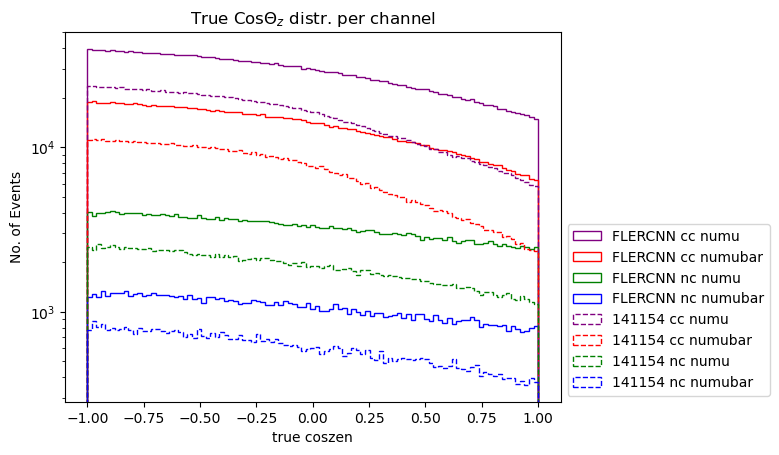

In [32]:
binning = np.linspace(-1.,1.,100)
plt.hist(numu_cc_test_true_cozen,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
plt.hist(numubar_cc_test_true_cozen,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
plt.hist(numu_nc_test_true_cozen,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
plt.hist(numubar_nc_test_true_cozen,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
plt.hist(true_coszen[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='141154 cc numu',bins=binning)
plt.hist(true_coszen[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='141154 cc numubar',bins=binning)
plt.hist(true_coszen[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='141154 nc numu',bins=binning)
plt.hist(true_coszen[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='141154 nc numubar',bins=binning)

plt.xlabel('true coszen')
plt.ylabel('No. of Events')
plt.yscale('log')
plt.title(r'True Cos$\Theta_z$ distr. per channel')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("Inelast_Plots/FLERCNN_plots/truecosz_cnn2dvsflercnn.png",bbox_inches='tight')

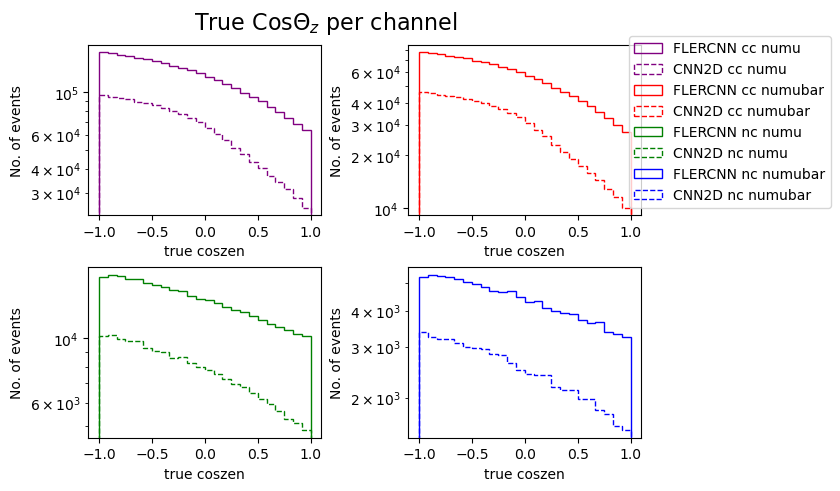

In [33]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

array=hdf_inel_mu['true_coszen'][1:]
binning=np.linspace(-1,1,25)

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

_,bins,_=axes[0,0].hist(numu_cc_test_true_cozen,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('true coszen')
axes[0,0].set_yscale('log')


_,bins,_=axes[0,1].hist(numubar_cc_test_true_cozen,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('true coszen')
axes[0,1].set_yscale('log')

_,bins,_=ax3=axes[1,0].hist(numu_nc_test_true_cozen,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('true coszen')
ax3=axes[1,0].set_yscale('log')


_,bins,_=axes[1,1].hist(numubar_nc_test_true_cozen,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('true coszen')
axes[1,1].set_yscale('log')

fig.suptitle(r'True Cos$\Theta_z$ per channel', fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))

plt.savefig("Inelast_Plots/FLERCNN_plots/truecosz_quadplot.png",bbox_inches='tight')
plt.show()

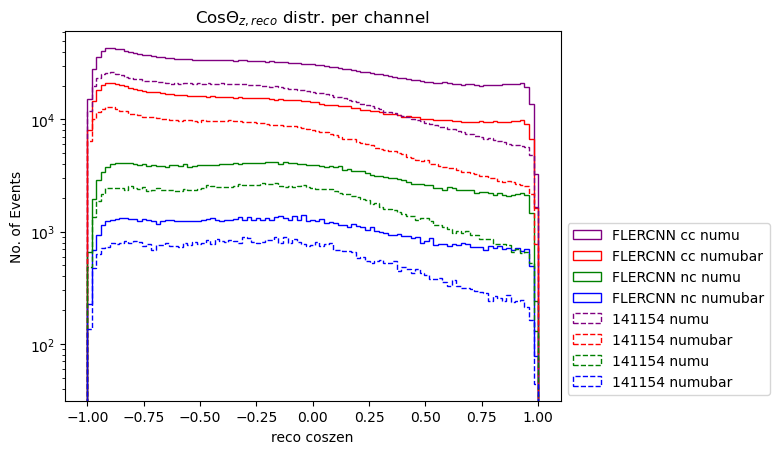

In [34]:
binning = np.linspace(-1.,1.,100)
plt.hist(numu_cc_test_coszen_E,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
plt.hist(numubar_cc_test_coszen_E,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
plt.hist(numu_nc_test_coszen_E,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
plt.hist(numubar_nc_test_coszen_E,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
plt.hist(reco_coszen[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='141154 numu',bins=binning)
plt.hist(reco_coszen[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='141154 numubar',bins=binning)
plt.hist(reco_coszen[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='141154 numu',bins=binning)
plt.hist(reco_coszen[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='141154 numubar',bins=binning)

plt.xlabel('reco coszen')
plt.ylabel('No. of Events')
plt.yscale('log')
plt.title(r'Cos$\Theta_{z,reco}$ distr. per channel')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("Inelast_Plots/FLERCNN_plots/recocosz_cnn2dvsflercnn.png",bbox_inches='tight')

## nue, nutau channel reco_coszen check

In [35]:
hdf_inel_e=hdf.File(folder+inelast_filenames['e'],'r')
hdf_inel_tau=hdf.File(folder+inelast_filenames['tau'],'r')

In [36]:
e_pdg=hdf_inel_e['pdg_code'][1:]
tau_pdg=hdf_inel_tau['pdg_code'][1:]
e_int=hdf_inel_e['interaction'][1:]
tau_int=hdf_inel_tau['interaction'][1:]

cnn2d_nue_cc = (e_pdg>0)*(e_int==1)
cnn2d_nue_nc = (e_pdg>0)*(e_int==2)
cnn2d_nuebar_cc = (e_pdg<0)*(e_int==1)
cnn2d_nuebar_nc = (e_pdg<0)*(e_int==2)
cnn2d_nutau_cc = (tau_pdg>0)*(tau_int==1)
cnn2d_nutau_nc = (tau_pdg>0)*(tau_int==2)
cnn2d_nutaubar_cc = (tau_pdg<0)*(tau_int==1)
cnn2d_nutaubar_nc = (tau_pdg<0)*(tau_int==2)

In [37]:
nue_cc=neuhdf['nue_cc']
nue_nc=neuhdf['nue_nc']
nutau_cc=neuhdf['nutau_cc']
nutau_nc=neuhdf['nutau_nc']
nuebar_cc=neuhdf['nuebar_cc']
nuebar_nc=neuhdf['nuebar_nc']
nutaubar_cc=neuhdf['nutaubar_cc']
nutaubar_nc=neuhdf['nutaubar_nc']

In [38]:
e_recoszen = hdf_inel_e['reco_coszen'][1:]
tau_recoszen = hdf_inel_tau['reco_coszen'][1:]

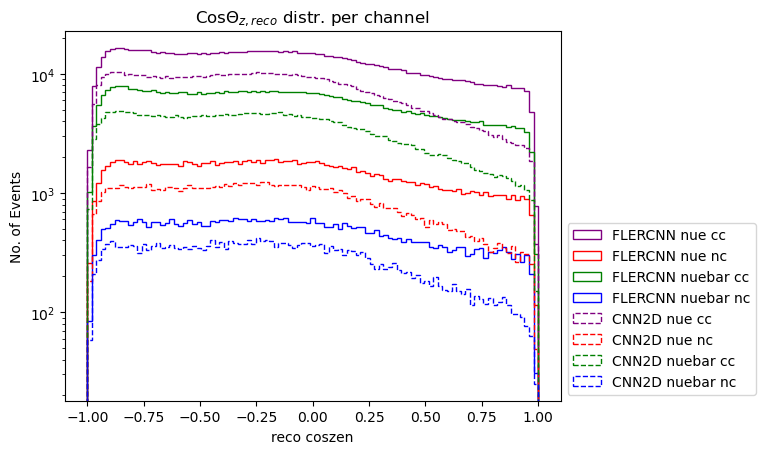

In [39]:
binning = np.linspace(-1.,1.,100)
plt.hist(nue_cc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='purple',label='FLERCNN nue cc',bins=binning)
plt.hist(nue_nc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='red',label='FLERCNN nue nc',bins=binning)
plt.hist(nuebar_cc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='green',label='FLERCNN nuebar cc',bins=binning)
plt.hist(nuebar_nc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='blue',label='FLERCNN nuebar nc',bins=binning)
plt.hist(e_recoszen[cnn2d_nue_cc],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D nue cc',bins=binning)
plt.hist(e_recoszen[cnn2d_nue_nc],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D nue nc',bins=binning)
plt.hist(e_recoszen[cnn2d_nuebar_cc],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nuebar cc',bins=binning)
plt.hist(e_recoszen[cnn2d_nuebar_nc],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nuebar nc',bins=binning)

plt.xlabel('reco coszen')
plt.ylabel('No. of Events')
plt.yscale('log')
plt.title(r'Cos$\Theta_{z,reco}$ distr. per channel')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("Inelast_Plots/FLERCNN_plots/recocosz_cnn2dvsflercnn_nue.png",bbox_inches='tight')

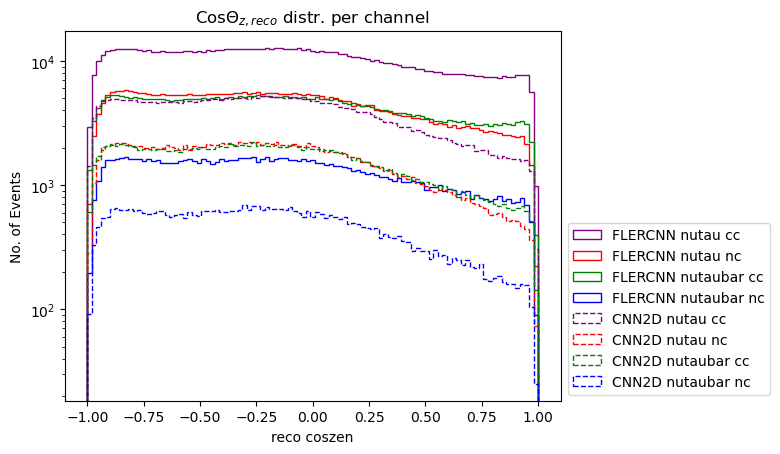

In [40]:
binning = np.linspace(-1.,1.,100)
plt.hist(nutau_cc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='purple',label='FLERCNN nutau cc',bins=binning)
plt.hist(nutau_nc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='red',label='FLERCNN nutau nc',bins=binning)
plt.hist(nutaubar_cc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='green',label='FLERCNN nutaubar cc',bins=binning)
plt.hist(nutaubar_nc['FLERCNN_coszen'][:],histtype='step',lw=1.0,color='blue',label='FLERCNN nutaubar nc',bins=binning)
plt.hist(tau_recoszen[cnn2d_nutau_cc],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D nutau cc',bins=binning)
plt.hist(tau_recoszen[cnn2d_nutau_nc],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D nutau nc',bins=binning)
plt.hist(tau_recoszen[cnn2d_nutaubar_cc],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nutaubar cc',bins=binning)
plt.hist(tau_recoszen[cnn2d_nutaubar_nc],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nutaubar nc',bins=binning)

plt.xlabel('reco coszen')
plt.ylabel('No. of Events')
plt.yscale('log')
plt.title(r'Cos$\Theta_{z,reco}$ distr. per channel')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("Inelast_Plots/FLERCNN_plots/recocosz_cnn2dvsflercnn_nutau.png",bbox_inches='tight')

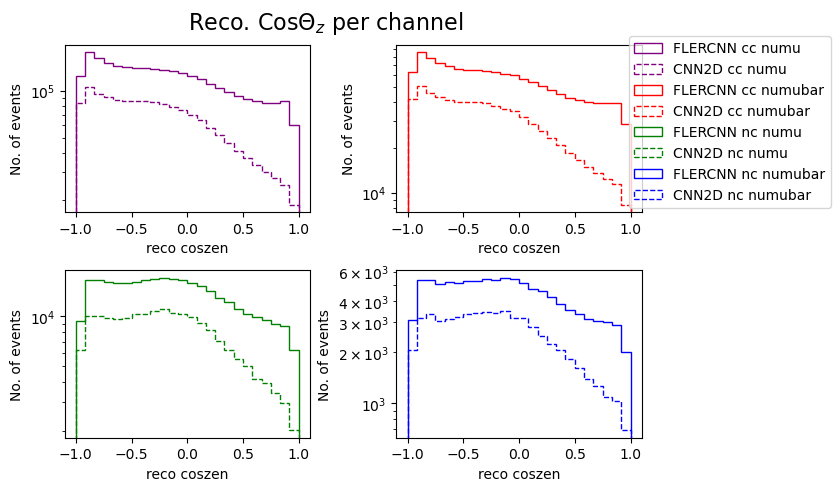

In [41]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

array=hdf_inel_mu['reco_coszen'][1:]
binning=np.linspace(-1,1,25)

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

_,bins,_=axes[0,0].hist(numu_cc_test_coszen_E,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('reco coszen')
axes[0,0].set_yscale('log')


_,bins,_=axes[0,1].hist(numubar_cc_test_coszen_E,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('reco coszen')
axes[0,1].set_yscale('log')

_,bins,_=ax3=axes[1,0].hist(numu_nc_test_coszen_E,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('reco coszen')
ax3=axes[1,0].set_yscale('log')


_,bins,_=axes[1,1].hist(numubar_nc_test_coszen_E,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('reco coszen')
axes[1,1].set_yscale('log')

fig.suptitle(r'Reco. Cos$\Theta_z$ per channel', fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))

plt.savefig("Inelast_Plots/FLERCNN_plots/recocosz_quadplot.png",bbox_inches='tight')
plt.show()

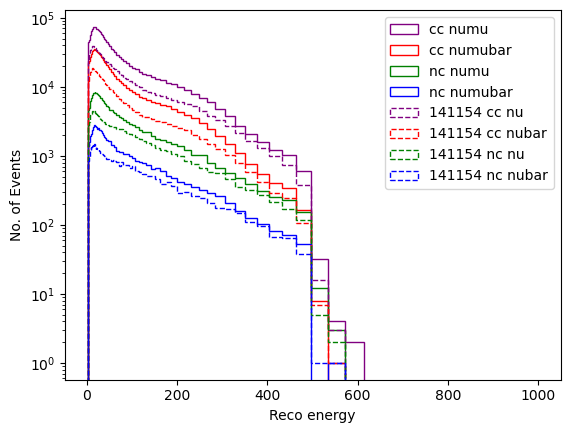

In [42]:
recoE_cc_numu = numu_cc_test_reco_E
recoE_cc_numubar = numubar_cc_test_reco_E
recoE_nc_numu = numu_nc_test_reco_E
recoE_nc_numubar = numubar_nc_test_reco_E

binning = np.geomspace(1,1e3,100)

plt.hist(recoE_cc_numu,histtype='step',lw=1.0,color='purple',label='cc numu',bins=binning)
plt.hist(recoE_cc_numubar,histtype='step',lw=1.0,color='red',label='cc numubar',bins=binning)
plt.hist(recoE_nc_numu,histtype='step',lw=1.0,color='green',label='nc numu',bins=binning)
plt.hist(recoE_nc_numubar,histtype='step',lw=1.0,color='blue',label='nc numubar',bins=binning)
plt.hist(hdf_inel_mu['reco_energy'][1:][int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='141154 cc nu',bins=binning)
plt.hist(hdf_inel_mu['reco_energy'][1:][int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='141154 cc nubar',bins=binning)
plt.hist(hdf_inel_mu['reco_energy'][1:][int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='141154 nc nu',bins=binning)
plt.hist(hdf_inel_mu['reco_energy'][1:][int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='141154 nc nubar',bins=binning)
plt.xlabel('Reco energy')
plt.ylabel('No. of Events')
plt.yscale('log')
plt.legend()
plt.savefig("Inelast_Plots/FLERCNN_plots/recoE_cnn2dvsflercnn.png",bbox_inches='tight')

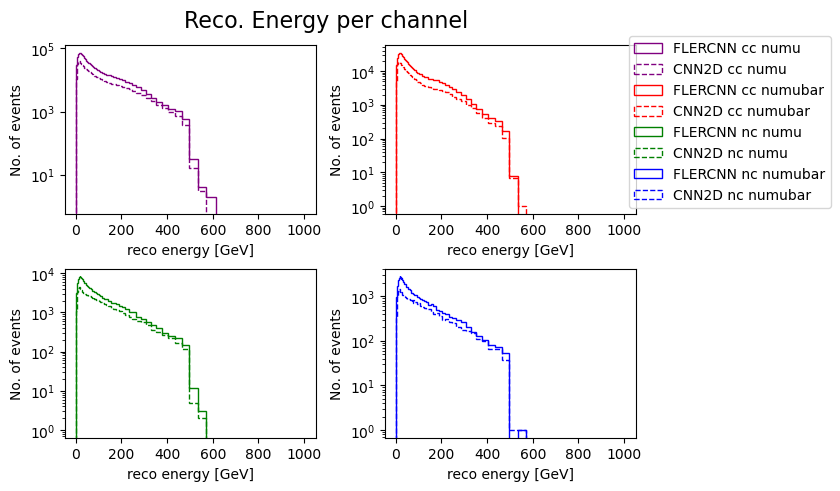

In [43]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

array=hdf_inel_mu['reco_energy'][1:]
binning = np.geomspace(1,1e3,100)

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

_,bins,_=axes[0,0].hist(recoE_cc_numu,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('reco energy [GeV]')
axes[0,0].set_yscale('log')


_,bins,_=axes[0,1].hist(recoE_cc_numubar,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('reco energy [GeV]')
axes[0,1].set_yscale('log')

_,bins,_=ax3=axes[1,0].hist(recoE_nc_numu,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('reco energy [GeV]')
ax3=axes[1,0].set_yscale('log')


_,bins,_=axes[1,1].hist(recoE_nc_numubar,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('reco energy [GeV]')
axes[1,1].set_yscale('log')

fig.suptitle(r'Reco. Energy per channel', fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))

plt.savefig("Inelast_Plots/FLERCNN_plots/recoE_quadplot.png",bbox_inches='tight')
plt.show()

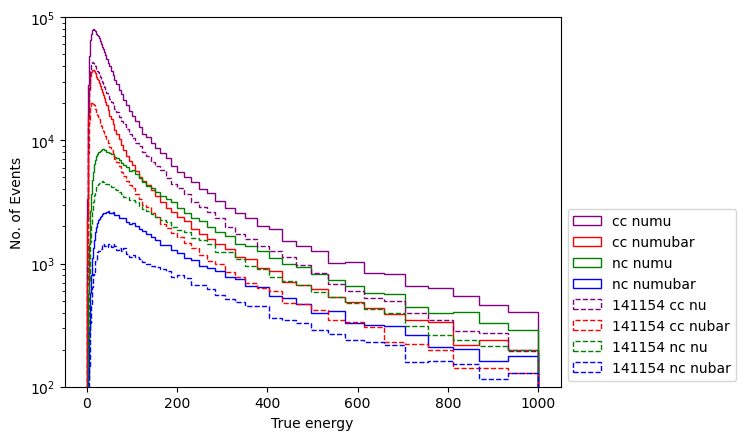

In [44]:
recoE_cc_numu = numu_cc_test_reco_E
recoE_cc_numubar = numubar_cc_test_reco_E
recoE_nc_numu = numu_nc_test_reco_E
recoE_nc_numubar = numubar_nc_test_reco_E

binning = np.geomspace(1,1e3,100)

plt.hist(numu_cc_true_energy,histtype='step',lw=1.0,color='purple',label='cc numu',bins=binning)
plt.hist(numubar_cc_true_energy,histtype='step',lw=1.0,color='red',label='cc numubar',bins=binning)
plt.hist(numu_nc_true_energy,histtype='step',lw=1.0,color='green',label='nc numu',bins=binning)
plt.hist(numubar_nc_true_energy,histtype='step',lw=1.0,color='blue',label='nc numubar',bins=binning)
plt.hist(hdf_inel_mu['true_energy'][1:][int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='141154 cc nu',bins=binning)
plt.hist(hdf_inel_mu['true_energy'][1:][int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='141154 cc nubar',bins=binning)
plt.hist(hdf_inel_mu['true_energy'][1:][int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='141154 nc nu',bins=binning)
plt.hist(hdf_inel_mu['true_energy'][1:][int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='141154 nc nubar',bins=binning)
plt.xlabel('True energy')
plt.ylabel('No. of Events')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.ylim(1e2,1e5)
plt.savefig("Inelast_Plots/FLERCNN_plots/trueE_cnn2dvsflercnn.png",bbox_inches='tight')

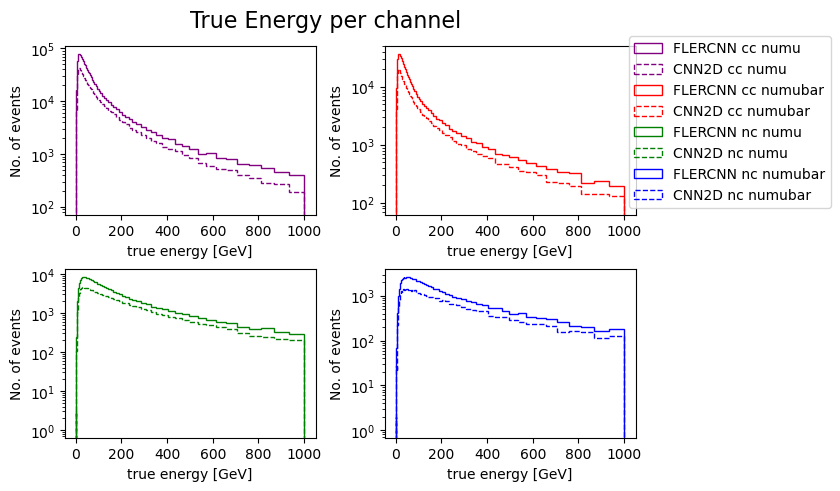

In [45]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

array=hdf_inel_mu['true_energy'][1:]
binning = np.geomspace(1,1e3,100)

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

_,bins,_=axes[0,0].hist(numu_cc_true_energy,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('true energy [GeV]')
axes[0,0].set_yscale('log')


_,bins,_=axes[0,1].hist(numubar_cc_true_energy,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('true energy [GeV]')
axes[0,1].set_yscale('log')

_,bins,_=ax3=axes[1,0].hist(numu_nc_true_energy,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('true energy [GeV]')
ax3=axes[1,0].set_yscale('log')


_,bins,_=axes[1,1].hist(numubar_nc_true_energy,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('true energy [GeV]')
axes[1,1].set_yscale('log')

fig.suptitle(r'True Energy per channel', fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))

plt.savefig("Inelast_Plots/FLERCNN_plots/trueE_quadplot.png",bbox_inches='tight')
plt.show()

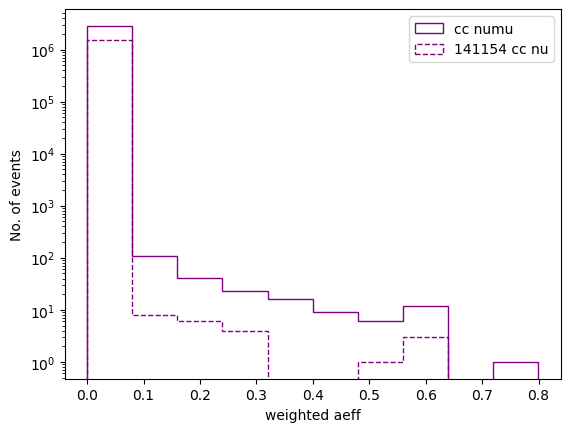

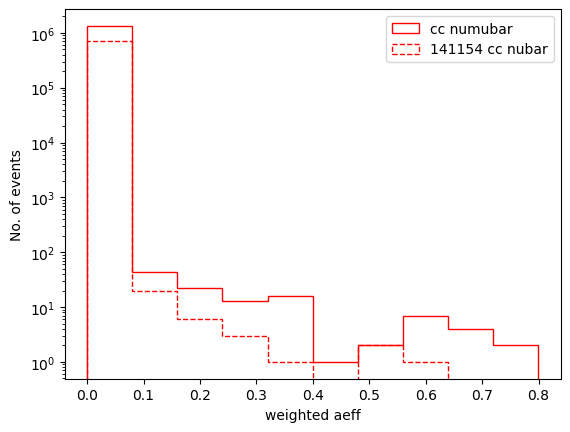

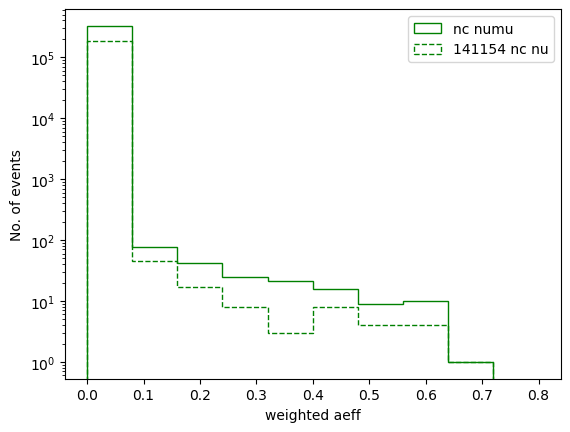

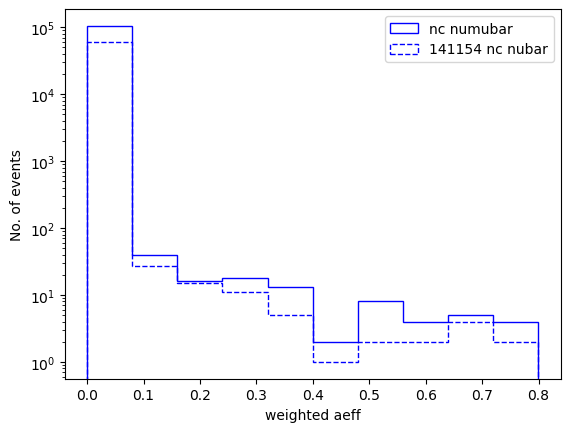

In [46]:
aeff_cc_numu = numu_cc_weighted_aeff
aeff_cc_numubar = numubar_cc_weighted_aeff
aeff_nc_numu = numu_nc_weighted_aeff
aeff_nc_numubar = numubar_nc_weighted_aeff

array=hdf_inel_mu['weighted_aeff'][1:]

_,bins,_=plt.hist(aeff_cc_numu,histtype='step',lw=1.0,color='purple',label='cc numu')
plt.hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='141154 cc nu',bins=bins)
plt.ylabel('No. of events')
plt.xlabel('weighted aeff')
plt.yscale('log')
plt.legend()
plt.savefig("Inelast_Plots/FLERCNN_plots/weighted_comp_numucc_cnn2dvsflercnn.png",bbox_inches='tight')
plt.show()

_,bins,_=plt.hist(aeff_cc_numubar,histtype='step',lw=1.0,color='red',label='cc numubar',bins=bins)
plt.hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='141154 cc nubar',bins=bins)
plt.ylabel('No. of events')
plt.xlabel('weighted aeff')
plt.yscale('log')
plt.legend()
plt.savefig("Inelast_Plots/FLERCNN_plots/weighted_comp_numubarcc_cnn2dvsflercnn.png",bbox_inches='tight')
plt.show()

_,bins,_=plt.hist(aeff_nc_numu,histtype='step',lw=1.0,color='green',label='nc numu',bins=bins)
plt.hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='141154 nc nu',bins=bins)
plt.ylabel('No. of events')
plt.xlabel('weighted aeff')
plt.yscale('log')
plt.legend()
plt.savefig("Inelast_Plots/FLERCNN_plots/weighted_comp_numunc_cnn2dvsflercnn.png",bbox_inches='tight')
plt.show()

_,bins,_=plt.hist(aeff_nc_numubar,histtype='step',lw=1.0,color='blue',label='nc numubar',bins=bins)
plt.hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='141154 nc nubar',bins=bins)
plt.ylabel('No. of events')
plt.xlabel('weighted aeff')
plt.yscale('log')
plt.legend()
plt.savefig("Inelast_Plots/FLERCNN_plots/weighted_comp_numubarnc_cnn2dvsflercnn.png",bbox_inches='tight')
plt.show()

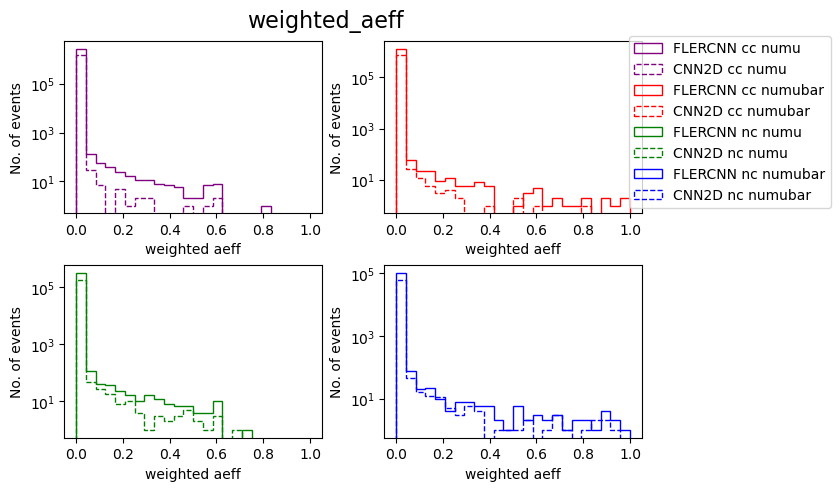

In [47]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

binning=np.linspace(0,1,25)
array=hdf_inel_mu['weighted_aeff'][1:]

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

_,bins,_=axes[0,0].hist(aeff_cc_numu,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('weighted aeff')
axes[0,0].set_yscale('log')


_,bins,_=axes[0,1].hist(aeff_cc_numubar,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('weighted aeff')
axes[0,1].set_yscale('log')

_,bins,_=ax3=axes[1,0].hist(aeff_nc_numu,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('weighted aeff')
ax3=axes[1,0].set_yscale('log')


_,bins,_=axes[1,1].hist(aeff_nc_numubar,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('weighted aeff')
axes[1,1].set_yscale('log')

fig.suptitle(r'weighted_aeff',fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))

plt.savefig("Inelast_Plots/FLERCNN_plots/weighted_aeff_quadplot.png",bbox_inches='tight')
plt.show()

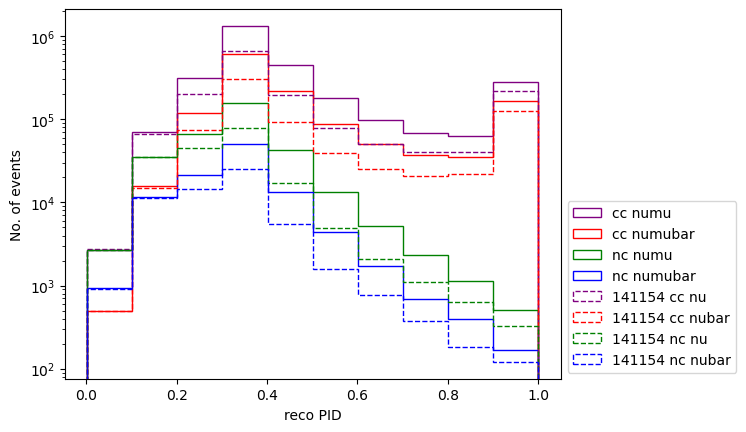

In [48]:
PID_cc_numu = numu_cc_PID
PID_cc_numubar = numubar_cc_PID
PID_nc_numu = numu_nc_PID
PID_nc_numubar = numubar_nc_PID

array=hdf_inel_mu['reco_PID'][1:]

_,bins,_=plt.hist(PID_cc_numu,histtype='step',lw=1.0,color='purple',label='cc numu')
plt.hist(PID_cc_numubar,histtype='step',lw=1.0,color='red',label='cc numubar',bins=bins)
plt.hist(PID_nc_numu,histtype='step',lw=1.0,color='green',label='nc numu',bins=bins)
plt.hist(PID_nc_numubar,histtype='step',lw=1.0,color='blue',label='nc numubar',bins=bins)
plt.hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='141154 cc nu',bins=bins)
plt.hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='141154 cc nubar',bins=bins)
plt.hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='141154 nc nu',bins=bins)
plt.hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='141154 nc nubar',bins=bins)

plt.ylabel('No. of events')
plt.xlabel('reco PID')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("Inelast_Plots/FLERCNN_plots/recoPID_cnn2dvsflercnn.png",bbox_inches='tight')

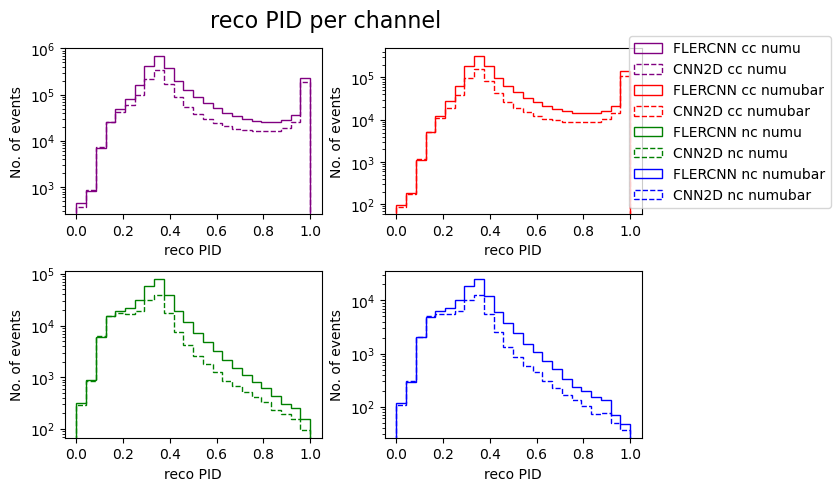

In [49]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

binning=np.linspace(0,1,25)
array=hdf_inel_mu['reco_PID'][1:]

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

_,bins,_=axes[0,0].hist(PID_cc_numu,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('reco PID')
axes[0,0].set_yscale('log')


_,bins,_=axes[0,1].hist(PID_cc_numubar,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('reco PID')
axes[0,1].set_yscale('log')

_,bins,_=ax3=axes[1,0].hist(PID_nc_numu,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('reco PID')
ax3=axes[1,0].set_yscale('log')


_,bins,_=axes[1,1].hist(PID_nc_numubar,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('reco PID')
axes[1,1].set_yscale('log')

fig.suptitle(r'reco PID per channel',fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))

plt.savefig("Inelast_Plots/FLERCNN_plots/recoPID_quadplot.png",bbox_inches='tight')
plt.show()

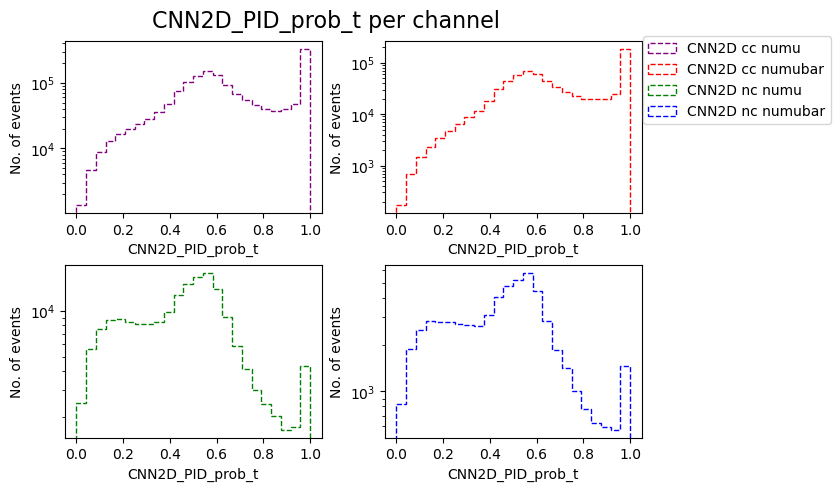

In [50]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

binning=np.linspace(0,1,25)
array=hdf_inel_mu['CNN2D_PID_prob_t'][1:]

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('CNN2D_PID_prob_t')
axes[0,0].set_yscale('log')


axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('CNN2D_PID_prob_t')
axes[0,1].set_yscale('log')

ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('CNN2D_PID_prob_t')
ax3=axes[1,0].set_yscale('log')


axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('CNN2D_PID_prob_t')
axes[1,1].set_yscale('log')

fig.suptitle(r'CNN2D_PID_prob_t per channel',fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))
plt.show()

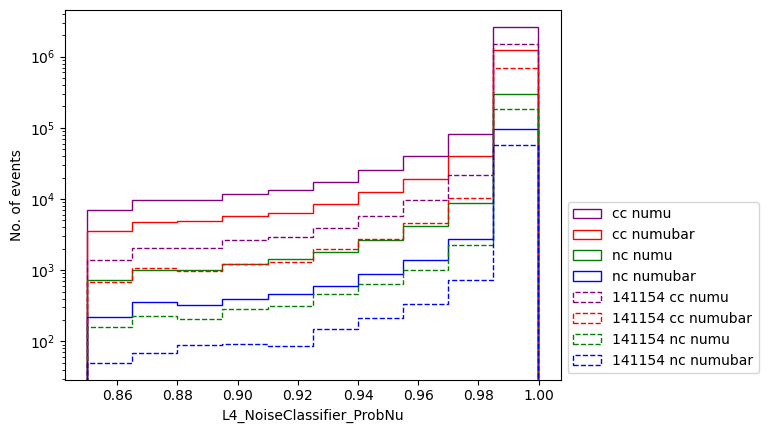

In [51]:
array=hdf_inel_mu['L4_NoiseClassifier_ProbNu'][1:]

_,bins,_=plt.hist(numu_cc_noisestuff,histtype='step',lw=1.0,color='purple',label='cc numu')
plt.hist(numubar_cc_noisestuff,histtype='step',lw=1.0,color='red',label='cc numubar',bins=bins)
plt.hist(numu_nc_noisestuff,histtype='step',lw=1.0,color='green',label='nc numu',bins=bins)
plt.hist(numubar_nc_noisestuff,histtype='step',lw=1.0,color='blue',label='nc numubar',bins=bins)
plt.hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='141154 cc numu',bins=bins)
plt.hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='141154 cc numubar',bins=bins)
plt.hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='141154 nc numu',bins=bins)
plt.hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='141154 nc numubar',bins=bins)

plt.ylabel('No. of events')
plt.xlabel('L4_NoiseClassifier_ProbNu')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("Inelast_Plots/FLERCNN_plots/L4probNu_cnn2dvsflercnn.png",bbox_inches='tight')

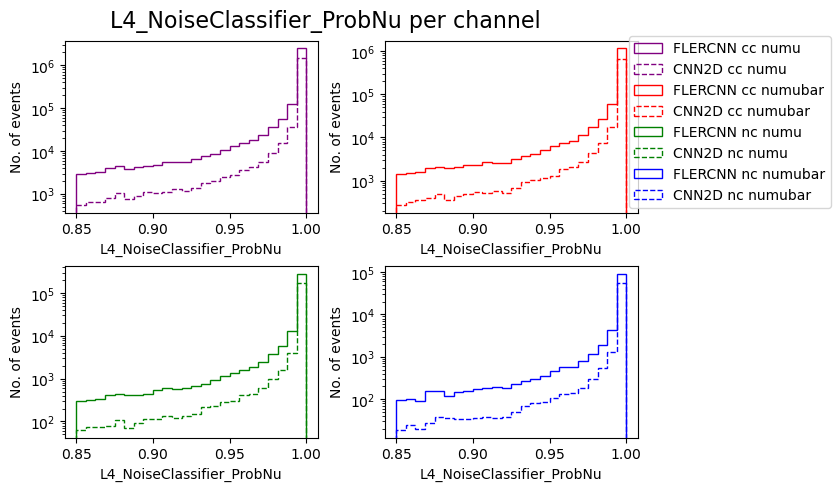

In [52]:
fig, (axes) = plt.subplots(2,2,layout='constrained')

binning=np.linspace(0.85,1,25)
array=hdf_inel_mu['L4_NoiseClassifier_ProbNu'][1:]

ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

_,bins,_=axes[0,0].hist(numu_cc_noisestuff,histtype='step',lw=1.0,color='purple',label='FLERCNN cc numu',bins=binning)
axes[0,0].hist(array[int1nu],histtype='step',lw=1.0,color='purple',ls='dashed',label='CNN2D cc numu',bins=binning)
axes[0,0].set_ylabel('No. of events')
axes[0,0].set_xlabel('L4_NoiseClassifier_ProbNu')
axes[0,0].set_yscale('log')


_,bins,_=axes[0,1].hist(numubar_cc_noisestuff,histtype='step',lw=1.0,color='red',label='FLERCNN cc numubar',bins=binning)
axes[0,1].hist(array[int1nubar],histtype='step',lw=1.0,color='red',ls='dashed',label='CNN2D cc numubar',bins=binning)
axes[0,1].set_ylabel('No. of events')
axes[0,1].set_xlabel('L4_NoiseClassifier_ProbNu')
axes[0,1].set_yscale('log')

_,bins,_=ax3=axes[1,0].hist(numu_nc_noisestuff,histtype='step',lw=1.0,color='green',label='FLERCNN nc numu',bins=binning)
ax3=axes[1,0].hist(array[int2nu],histtype='step',lw=1.0,color='green',ls='dashed',label='CNN2D nc numu',bins=binning)
ax3=axes[1,0].set_ylabel('No. of events')
ax3=axes[1,0].set_xlabel('L4_NoiseClassifier_ProbNu')
ax3=axes[1,0].set_yscale('log')


_,bins,_=axes[1,1].hist(numubar_nc_noisestuff,histtype='step',lw=1.0,color='blue',label='FLERCNN nc numubar',bins=binning)
axes[1,1].hist(array[int2nubar],histtype='step',lw=1.0,color='blue',ls='dashed',label='CNN2D nc numubar',bins=binning)
axes[1,1].set_ylabel('No. of events')
axes[1,1].set_xlabel('L4_NoiseClassifier_ProbNu')
axes[1,1].set_yscale('log')

fig.suptitle(r'L4_NoiseClassifier_ProbNu per channel',fontsize=16)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,bbox_to_anchor=(1.3, 0.95))

plt.savefig("Inelast_Plots/FLERCNN_plots/L4Noise_quadplot.png",bbox_inches='tight')
plt.show()

In [53]:
lvl3_30gev_100rho36=hdf_inel_mu['CNN2D_y_lvl3_30gev_100rho36'][1:]
lvl3_5gev_100rho36=hdf_inel_mu['CNN2D_y_lvl3_5gev_100rho36'][1:]
lvl6_30gev_200rho36=hdf_inel_mu['CNN2D_y_lvl6_30gev_200rho36'][1:]
lvl6_5gev_200rho36=hdf_inel_mu['CNN2D_y_lvl6_5gev_200rho36'][1:]

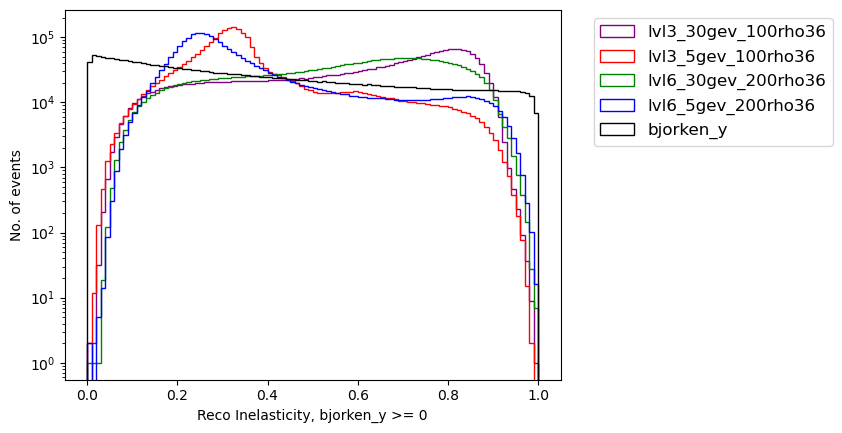

In [54]:
binning = np.linspace(0,1,101)

plt.hist(lvl3_30gev_100rho36[False == yisnegative],histtype='step',lw=1.0,color='purple',label='lvl3_30gev_100rho36',bins=binning)
plt.hist(lvl3_5gev_100rho36[False == yisnegative],histtype='step',lw=1.0,color='red',label='lvl3_5gev_100rho36',bins=binning)
plt.hist(lvl6_30gev_200rho36[False == yisnegative],histtype='step',lw=1.0,color='green',label='lvl6_30gev_200rho36',bins=binning)
plt.hist(lvl6_5gev_200rho36[False == yisnegative],histtype='step',lw=1.0,color='blue',label='lvl6_5gev_200rho36',bins=binning)
plt.hist(y_inel[False == yisnegative],histtype='step',lw=1.0,color='black',label='bjorken_y',bins=binning)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, fontsize = 12, fancybox =True)
plt.ylabel('No. of events')
plt.xlabel('Reco Inelasticity, bjorken_y >= 0')
plt.yscale('log')
plt.savefig("Inelast_Plots/FLERCNN_plots/y_comp.png",bbox_inches='tight')

In [55]:
values1,_,_=np.histogram2d(bjorken_y[False == yisnegative],lvl3_30gev_100rho36[False == yisnegative],bins = 20);
values2,_,_=np.histogram2d(bjorken_y[False == yisnegative],lvl3_5gev_100rho36[False == yisnegative],bins = 20);
values3,_,_=np.histogram2d(bjorken_y[False == yisnegative],lvl6_30gev_200rho36[False == yisnegative],bins = 20);
values4,_,_=np.histogram2d(bjorken_y[False == yisnegative],lvl6_5gev_200rho36[False == yisnegative],bins = 20);

In [56]:
numu_cc_ytruemc=numu_cc_test_true_casc_E/(numu_cc_test_true_trk_E+numu_cc_test_true_casc_E)
numu_nc_ytruemc=numu_nc_test_true_casc_E/(numu_nc_test_true_trk_E+numu_nc_test_true_casc_E)
numubar_cc_ytruemc=numubar_cc_test_true_casc_E/(numubar_cc_test_true_trk_E+numubar_cc_test_true_casc_E)
numubar_nc_ytruemc=numubar_nc_test_true_casc_E/(numubar_nc_test_true_trk_E+numubar_nc_test_true_casc_E)

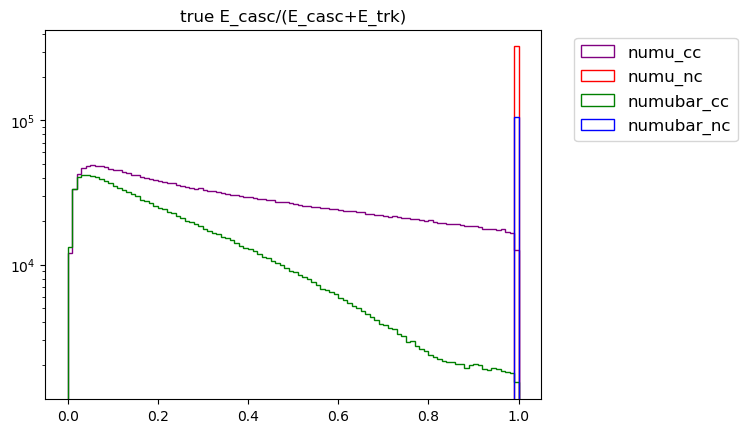

In [57]:
binning = np.linspace(0,1,101)

plt.hist(numu_cc_ytruemc,histtype='step',lw=1.0,color='purple',label='numu_cc',bins=binning)
plt.hist(numu_nc_ytruemc,histtype='step',lw=1.0,color='red',label='numu_nc',bins=binning)
plt.hist(numubar_cc_ytruemc,histtype='step',lw=1.0,color='green',label='numubar_cc',bins=binning)
plt.hist(numubar_nc_ytruemc,histtype='step',lw=1.0,color='blue',label='numubar_nc',bins=binning)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, fontsize = 12, fancybox =True)
plt.title('true E_casc/(E_casc+E_trk)')
plt.yscale('log')


In [58]:
Ebins=np.geomspace(5,100,13)
cosbins=np.linspace(-1.0,0.3,11)
pidbins=[0.,0.25,0.55,1.]

names = {0:'Cascades',1:'Mixed',2:'Tracks'}

In [59]:
cascades = (pidbins[0]<=reco_PID)*(reco_PID<pidbins[1])
mixed = (pidbins[1]<=reco_PID)*(reco_PID<pidbins[2])
tracks = (pidbins[2]<=reco_PID)*(reco_PID<=pidbins[3])

reco_E = hdf_inel_mu['reco_energy'][1:]
reco_coszen = hdf_inel_mu['reco_coszen'][1:]
reco_PID = hdf_inel_mu['reco_PID'][1:]

In [60]:
events = np.zeros((3,len(cosbins)-1,len(Ebins)-1))
#works, but dependent on binning to cover the full range of the event values
for i in range(len(pidbins)-1):
    for j in range(len(cosbins)-1):
        for k in range(len(Ebins)-1):
            pidbool = (pidbins[i]<=reco_PID)*(reco_PID<pidbins[i+1])
            cosbool = (cosbins[j]<=reco_coszen)*(reco_coszen<cosbins[j+1])
            Ebool = (Ebins[k]<=reco_E)*(reco_E<Ebins[k+1])
            
            if i==np.max(range(len(pidbins)-1)):
                pidbool = (pidbins[i]<=reco_PID)*(reco_PID<=pidbins[i+1])
            if j==np.max(range(len(cosbins)-1)):
                cosbool = (cosbins[j]<=reco_coszen)*(reco_coszen<=cosbins[j+1])
            if k==np.max(range(len(pidbins)-1)):
                Ebool = (Ebins[k]<=reco_E)*(reco_E<=Ebins[k+1])
                
            value = pidbool*cosbool*Ebool
            events[i,j,k]=np.sum(value)

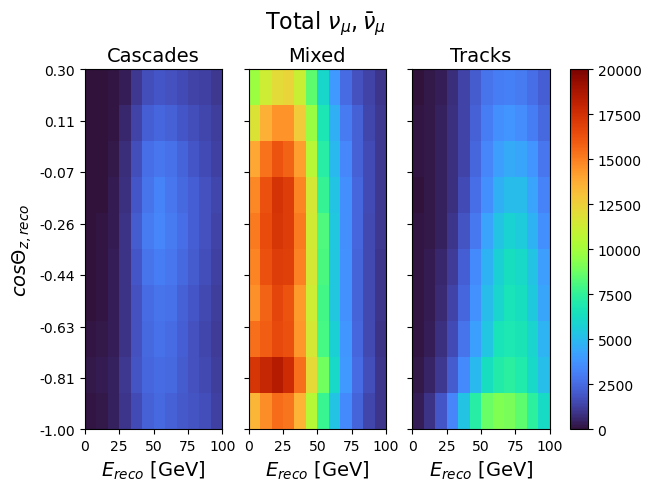

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained')

ticklabels=[]
for n in np.linspace(0,len(Ebins),5):
    ticklabels.append("{0:.0f}".format(n*np.max(Ebins)/len(Ebins)))
ticklabels2=[]
for n in np.linspace(-1.0,np.max(cosbins),8):
    ticklabels2.append("{0:.2f}".format(n))

im = ax1.pcolormesh(events[0], vmin=0, vmax=20000,cmap='turbo')
ax1.set_title(names[0],fontsize=14)
ax1.set_xlabel(r'$E_{reco}$ [GeV]',fontsize=14)
ax1.set_ylabel(r'$cos\Theta_{z,reco}$',fontsize=14)
ax1.set_xticks(np.linspace(0,len(Ebins)-1,5))
ax1.set_xticklabels(ticklabels)
ax1.set_yticks(np.linspace(0,len(cosbins)-1,8))
ax1.set_yticklabels(ticklabels2)

im = ax2.pcolormesh(events[1], vmin=0, vmax=20000,cmap='turbo')
ax2.set_title(names[1],fontsize=14)
ax2.set_xlabel(r'$E_{reco}$ [GeV]',fontsize=14)
ax1.set_ylabel(r'$cos\Theta_{z,reco}$',fontsize=14)
ax2.set_xticks(np.linspace(0,len(Ebins)-1,5))
ax2.set_xticklabels(ticklabels)
ax2.set_yticks(np.linspace(0,len(cosbins)-1,8))
ax2.set_yticklabels(ticklabels2)
                       
im = ax3.pcolormesh(events[2], vmin=0, vmax=20000,cmap='turbo')
ax3.set_title(names[2],fontsize=14)
ax3.set_xlabel(r'$E_{reco}$ [GeV]',fontsize=14)
ax1.set_ylabel(r'$cos\Theta_{z,reco}$',fontsize=14)
ax3.set_xticks(np.linspace(0,len(Ebins)-1,5))
ax3.set_xticklabels(ticklabels)
ax3.set_yticks(np.linspace(0,len(cosbins)-1,8))
ax3.set_yticklabels(ticklabels2)

fig.colorbar(im,ax=None)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
fig.suptitle(r'Total $\nu_\mu,\bar{\nu}_\mu$',fontsize=16)
plt.savefig("Inelast_Plots/FLERCNN_plots/Josh_Manual.png")
plt.show()

In [63]:
np.sum((reco_coszen<-0.90)*(reco_E<5)*mixed)

16097

## Inelasticity nu vs nubar

In [64]:
y0_numu=bjorken_y[isnu]
y0_numubar=bjorken_y[isnubar]
y1_numu=lvl3_30gev_100rho36[isnu]
y1_numubar=lvl3_30gev_100rho36[isnubar]
y2_numu=lvl3_5gev_100rho36[isnu]
y2_numubar=lvl3_5gev_100rho36[isnubar]
y3_numu=lvl6_30gev_200rho36[isnu]
y3_numubar=lvl6_30gev_200rho36[isnubar]
y4_numu=lvl6_5gev_200rho36[isnu]
y4_numubar=lvl6_5gev_200rho36[isnubar]

In [65]:
true_E_numu=true_E[isnu]
true_E_numubar=true_E[isnubar]
reco_E_numu=reco_E[isnu]
reco_E_numubar=reco_E[isnubar]

In [66]:
Erange=np.geomspace(1,1e4,21)
yrange=np.linspace(0,1,21)
Erange*yrange

array([0.00000000e+00, 7.92446596e-02, 2.51188643e-01, 5.97160756e-01,
       1.26191469e+00, 2.50000000e+00, 4.75467958e+00, 8.79160251e+00,
       1.59242868e+01, 2.83930805e+01, 5.00000000e+01, 8.71691256e+01,
       1.50713186e+02, 2.58769661e+02, 4.41670141e+02, 7.50000000e+02,
       1.26791455e+03, 2.13510347e+03, 3.58296453e+03, 5.99409477e+03,
       1.00000000e+04])

## Comparing inelasticity reconstructions

In [473]:
def median1dfrom2dbins(array1):
    '''
    calculates approximated median 1d array (i.e. median 'index') along x axis from 2d histogram using square grid bins
    '''
    array=np.array(array1)
    median = np.zeros(array.shape[1])
    for i in range(array.shape[1]):
        sliced = array[i]
        total = np.sum(sliced)
        cumul = np.cumsum(sliced)
        smaller = cumul < total/2
        index = np.argmin(smaller) #finds first False in smaller
        
        if sliced[index]==0:
            median[i]=0
            continue
        
        smallersum = np.sum(sliced[:index])
        biggersum = np.sum(sliced[index:])-sliced[index]
        median[i]=(biggersum-smallersum)/(2*sliced[index])+1/2+index
        
    return median

In [474]:
def quantile1dfrom2dbins(array1,q):
    '''
    calculates approximated median 1d array (i.e. median 'index') along x axis from 2d histogram using square grid bins
    '''
    array=np.array(array1)
    qu = np.zeros(array.shape[1])
    for i in range(array.shape[1]):
        sliced = array[i]
        total = np.sum(sliced)
        cumul = np.cumsum(sliced)
        smaller = cumul < total*q
        index = np.argmin(smaller) #finds first False in smaller
        
        if sliced[index]==0:
            qu[i]=0
            continue
        
        smallersum = np.sum(sliced[:index])
        biggersum = np.sum(sliced[index:])-sliced[index]
        qu[i]=(smallersum-1-biggersum)/(2*sliced[index])+1/2+index
        
    return qu

In [74]:
ypresentation = lvl3_30gev_100rho36
y_3_lowcut=lvl3_5gev_100rho36
y_6_highcut=lvl6_30gev_200rho36
y_6_lowcut=lvl6_5gev_200rho36

ys={'3_low':lvl3_5gev_100rho36,'3_high':lvl3_30gev_100rho36,'6_low':lvl6_5gev_200rho36,'6_high':lvl6_30gev_200rho36}
yname=['lvl3_5gev_100rho36','lvl3_30gev_100rho36','lvl6_5gev_200rho36','lvl6_30gev_200rho36']
nutype={'numu':isnu,'numubar':isnubar,'bothnumu':isnu + isnubar}
nulabel=[r'$\nu_\mu$',r'$\bar{\nu}_\mu$',r'$\nu_\mu$, $\bar{\nu}_\mu$']

In [75]:
maxE=300
true_Eranges = {'low':np.linspace(3,30,21),'medium':np.linspace(30,100,21),'high':np.linspace(100,maxE,21)}
is_cc = int1
weights_mu=hdf_inel_mu['weighted_aeff'][1:]

In [76]:
true_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= true_E) 
                & (true_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
true_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= true_E) 
                & (true_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
true_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= true_E) 
                & (true_E <= true_Eranges['high'][-1]*np.ones(true_E.shape)))

In [77]:
from neutrino_weighter_new_PISA import GENIENeutrinoWeighter

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [78]:
fluxweights = GENIENeutrinoWeighter()

In [79]:
def getfluxnumus(trueenergy,truecoszen,weightedaeff):
    #numu
    weightsnumu=fluxweights(trueenergy,truecoszen,1,weightedaeff)[1]
    #numubar
    weightsnumubar=fluxweights(trueenergy,truecoszen,-1,weightedaeff)[1]
    return np.array([weightsnumu,weightsnumubar])

In [80]:
makefluxweights = False

if makefluxweights == True:
    import time as t
    test=getfluxnumus(true_E,true_coszen,weights_mu)
    print(t.time()-t0,'s')
    np.save('Fluxweights',test)

In [81]:
fluxweights=np.load('Fluxweights.npy')
fluxweights_numu=np.array(fluxweights[0])
fluxweights_numubar=np.array(fluxweights[1])
fluxweights_both = np.where(pdg_code > 0, fluxweights_numu,fluxweights_numubar)

In [82]:
def fluxs(E):
    return 1e2*E**-2
alterfluxtest=fluxs(true_E)

In [212]:
plotflag = False
reco = False

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (true_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (true_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (true_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

    
if plotflag == True:    
    for i,y in enumerate(ys.values()):
        for j,nu in enumerate(nutype.values()):
            if reco==True:
                true_y_low_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                true_y_medium_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                true_y_high_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                
                reco_y_low_cc=y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                reco_y_medium_cc=y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                reco_y_high_cc=y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                
                weights_low_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_islow*nu]
                weights_medium_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                weights_high_cc=fluxweights_both[is_cc*(yisnegative==False)*reco_E_ishigh*nu]                
            else:
                true_y_low_cc=bjorken_y[is_cc*(yisnegative==False)*true_E_islow*nu]
                true_y_medium_cc=bjorken_y[is_cc*(yisnegative==False)*true_E_ismedium*nu]
                true_y_high_cc=bjorken_y[is_cc*(yisnegative==False)*true_E_ishigh*nu]
                
                reco_y_low_cc=y[is_cc*(yisnegative==False)*true_E_islow*nu]
                reco_y_medium_cc=y[is_cc*(yisnegative==False)*true_E_ismedium*nu]
                reco_y_high_cc=y[is_cc*(yisnegative==False)*true_E_ishigh*nu]
                
                weights_low_cc=fluxweights_both[is_cc*(yisnegative==False)*true_E_islow*nu]
                weights_medium_cc=fluxweights_both[is_cc*(yisnegative==False)*true_E_ismedium*nu]
                weights_high_cc=fluxweights_both[is_cc*(yisnegative==False)*true_E_ishigh*nu]

            #plotsection unweighted
            
            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet,norm=mpl.colors.Normalize())
            ax1.set_xlabel(r'$y_{true}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco ==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            else:
                ax1.set_title(r'$E_{{true}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.)
            ax1.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',ls='dashed',lw=4.)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet,norm=mpl.colors.Normalize())
            ax2.set_xlabel(r'$y_{true}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax2.set_title(r'$E_{{true}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)            
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.)
            ax2.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',ls='dashed',lw=4.)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet,norm=mpl.colors.Normalize())
            ax3.set_xlabel(r'$y_{true}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax3.set_title(r'$E_{{true}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)            
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.)
            ax3.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',ls='dashed',lw=4.)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            
            fig.suptitle(r'unweighted cc {nu} $y_{{reco}}$ vs  $y_{{true}}$'.format(nu=nulabel[j]),fontsize=28)     
            name = 'unweighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/Inelast/recoE_"+name,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/Inelast/"+name,bbox_inches='tight')
            plt.show()
            
            #plotsection weighted
            
            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet,norm=mpl.colors.Normalize(),weights=weights_low_cc)
            ax1.set_xlabel(r'$y_{true}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax1.set_title(r'$E_{{true}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)            
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.)
            ax1.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',ls='dashed',lw=4.)
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet,norm=mpl.colors.Normalize(),weights=weights_medium_cc)
            ax2.set_xlabel(r'$y_{true}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax2.set_title(r'$E_{{true}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)            
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.)
            ax2.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',ls='dashed',lw=4.)
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet,norm=mpl.colors.Normalize(),weights=weights_high_cc)
            ax3.set_xlabel(r'$y_{true}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax3.set_title(r'$E_{{true}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)            
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=2.)
            ax3.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',ls='dashed',lw=4.)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'weighted cc {nu} $y_{{reco}}$ vs  $y_{{true}}$'.format(nu=nulabel[j]),fontsize=28)
            weightname = 'weighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
            
            if reco==True:
                plt.savefig("Inelast_Plots/Inelast/recoE_"+weightname,bbox_inches='tight')
            else:
                plt.savefig("Inelast_Plots/Inelast/"+weightname,bbox_inches='tight')
            plt.show()

In [437]:
def quantile_array(array,weights,q):
    '''
    returns quantile of array along
    '''
    assert q<=1
    
    lowbound=(1-q)/2
    highbound=(1+q)/2
    
    inds = array.argsort()
    sortarr=array[inds]
    sortweights=weights[inds]
    cumul=np.cumsum(sortweights)
    total=np.sum(sortweights)
    
    smaller = lowbound*total < cumul
    i = np.argmax(smaller)
    if i==0:
        lower = (sortarr[0]+sortarr[1])/2
    else:
        lower = (sortarr[i]+sortarr[i+1])/2
    
    smaller = highbound*total < cumul
    i = np.argmax(smaller)
    if i==len(array):
        higher = sortarr[i]
    else:
        higher = (sortarr[i]+sortarr[i-1])/2  
        
    return lower,higher

def bordercalc(yarray,weights,ybins,sigma):
    qs={1:0.68,2:0.955,3:0.997}
    assert sigma in [1,2,3]
    
    q=qs[sigma]
    lower=np.zeros(np.array(ybins[:-1]).shape[0])
    higher=np.zeros(np.array(ybins[:-1]).shape[0])
    for i in range(np.array(ybins[:-1]).shape[0]):
        iny=(ybins[i]<yarray)*(yarray<ybins[i+1])
        arrayslice=yarray[iny]
        weightslice=weights[iny]
        lower[i],higher[i]=quantile_array(arrayslice,weightslice,q)
    return lower,higher

def reweight_truey(weights,truey,ybins):
    '''
    recalculates weights such that they add up to 1 within each ybins
    '''
    storage = np.zeros(len(weights))
    for i,j in enumerate(ybins[:-1]):
        below = truey < ybins[i+1]
        above = j < truey
        storage[below*above]=weights[below*above]/np.sum(weights[below*above])
    return storage

In [448]:
bordercalc(true_y_low_cc,weights_low_cc,yrange,1)

(array([0.00978046, 0.05757354, 0.10755514, 0.15753689, 0.20752889,
        0.25762356, 0.3076129 , 0.35762051, 0.40760226, 0.45763295,
        0.5076491 , 0.55779302, 0.60769712, 0.65778698, 0.70766284,
        0.75773978, 0.80783356, 0.85789944, 0.90756932, 0.95596656]),
 array([0.04193671, 0.09157938, 0.1414245 , 0.19151666, 0.24153648,
        0.29164343, 0.34155425, 0.39172899, 0.44169006, 0.49166939,
        0.54170007, 0.59158707, 0.64159443, 0.69184956, 0.74156224,
        0.7915386 , 0.84160492, 0.89197569, 0.94165502, 0.98332088]))

In [ ]:
bordercalc(true_y_low_cc,weights_low_cc,yrange,1)

(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

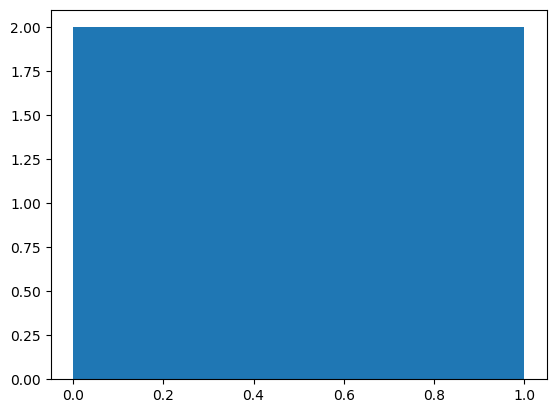

In [465]:
a,b,c=plt.hist(true_y_medium_cc,weights=weights_medium_cc,bins=np.linspace(0,1,11));
a,b,c

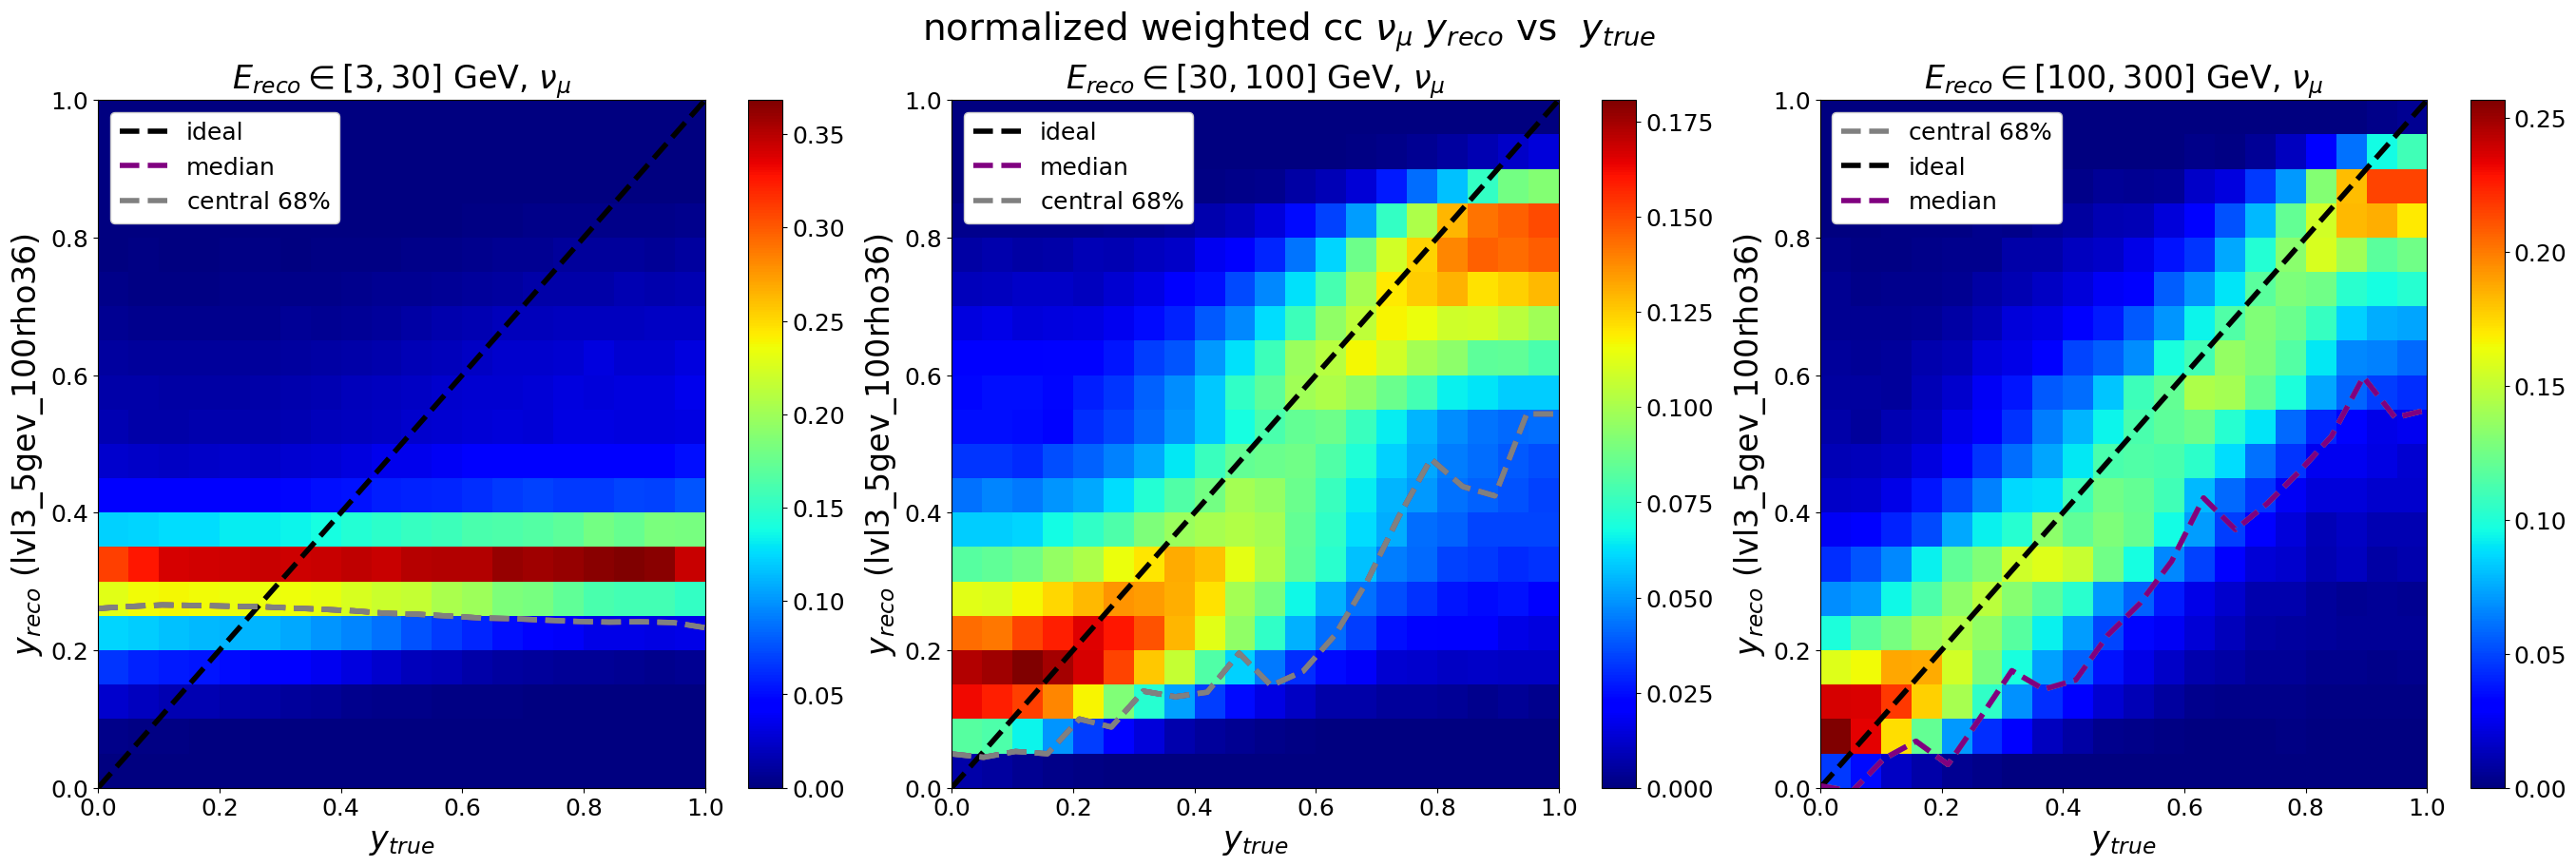

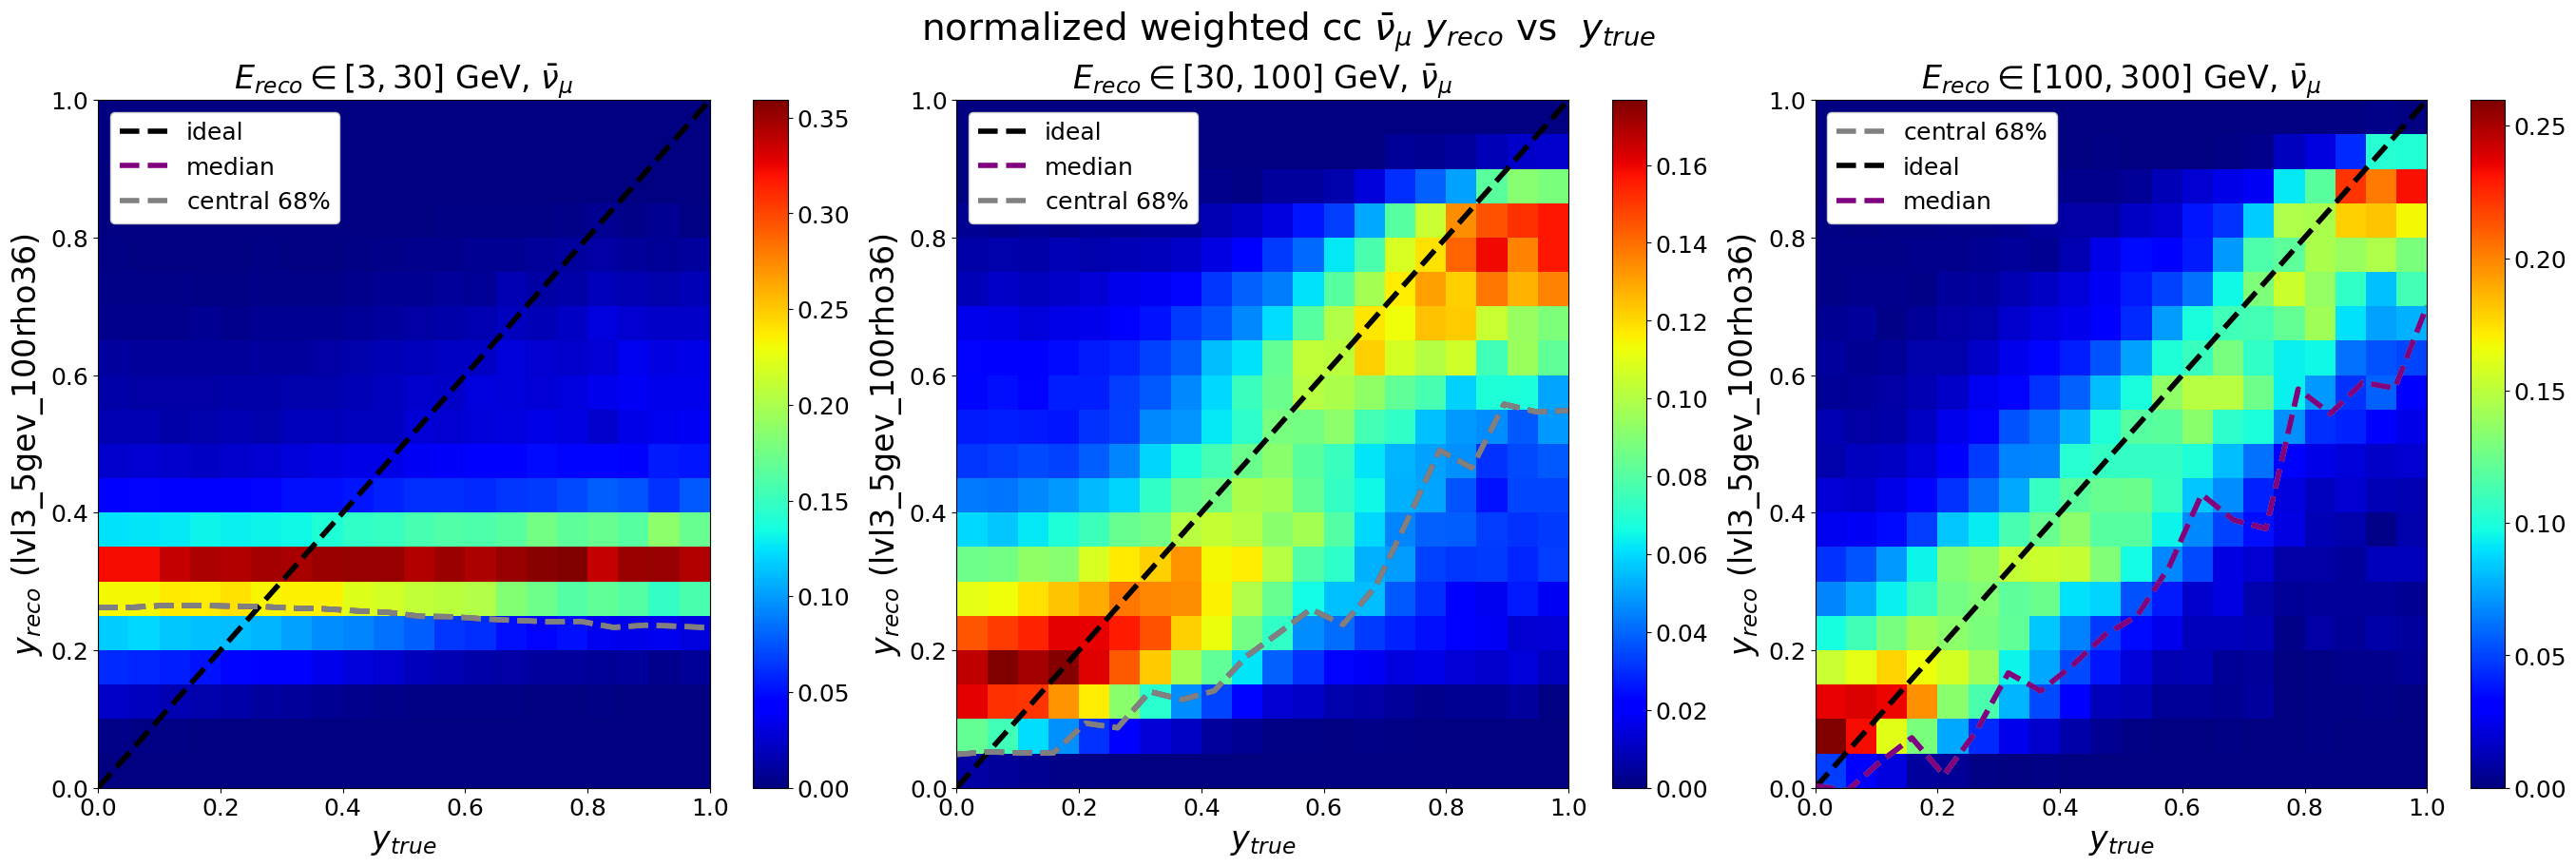

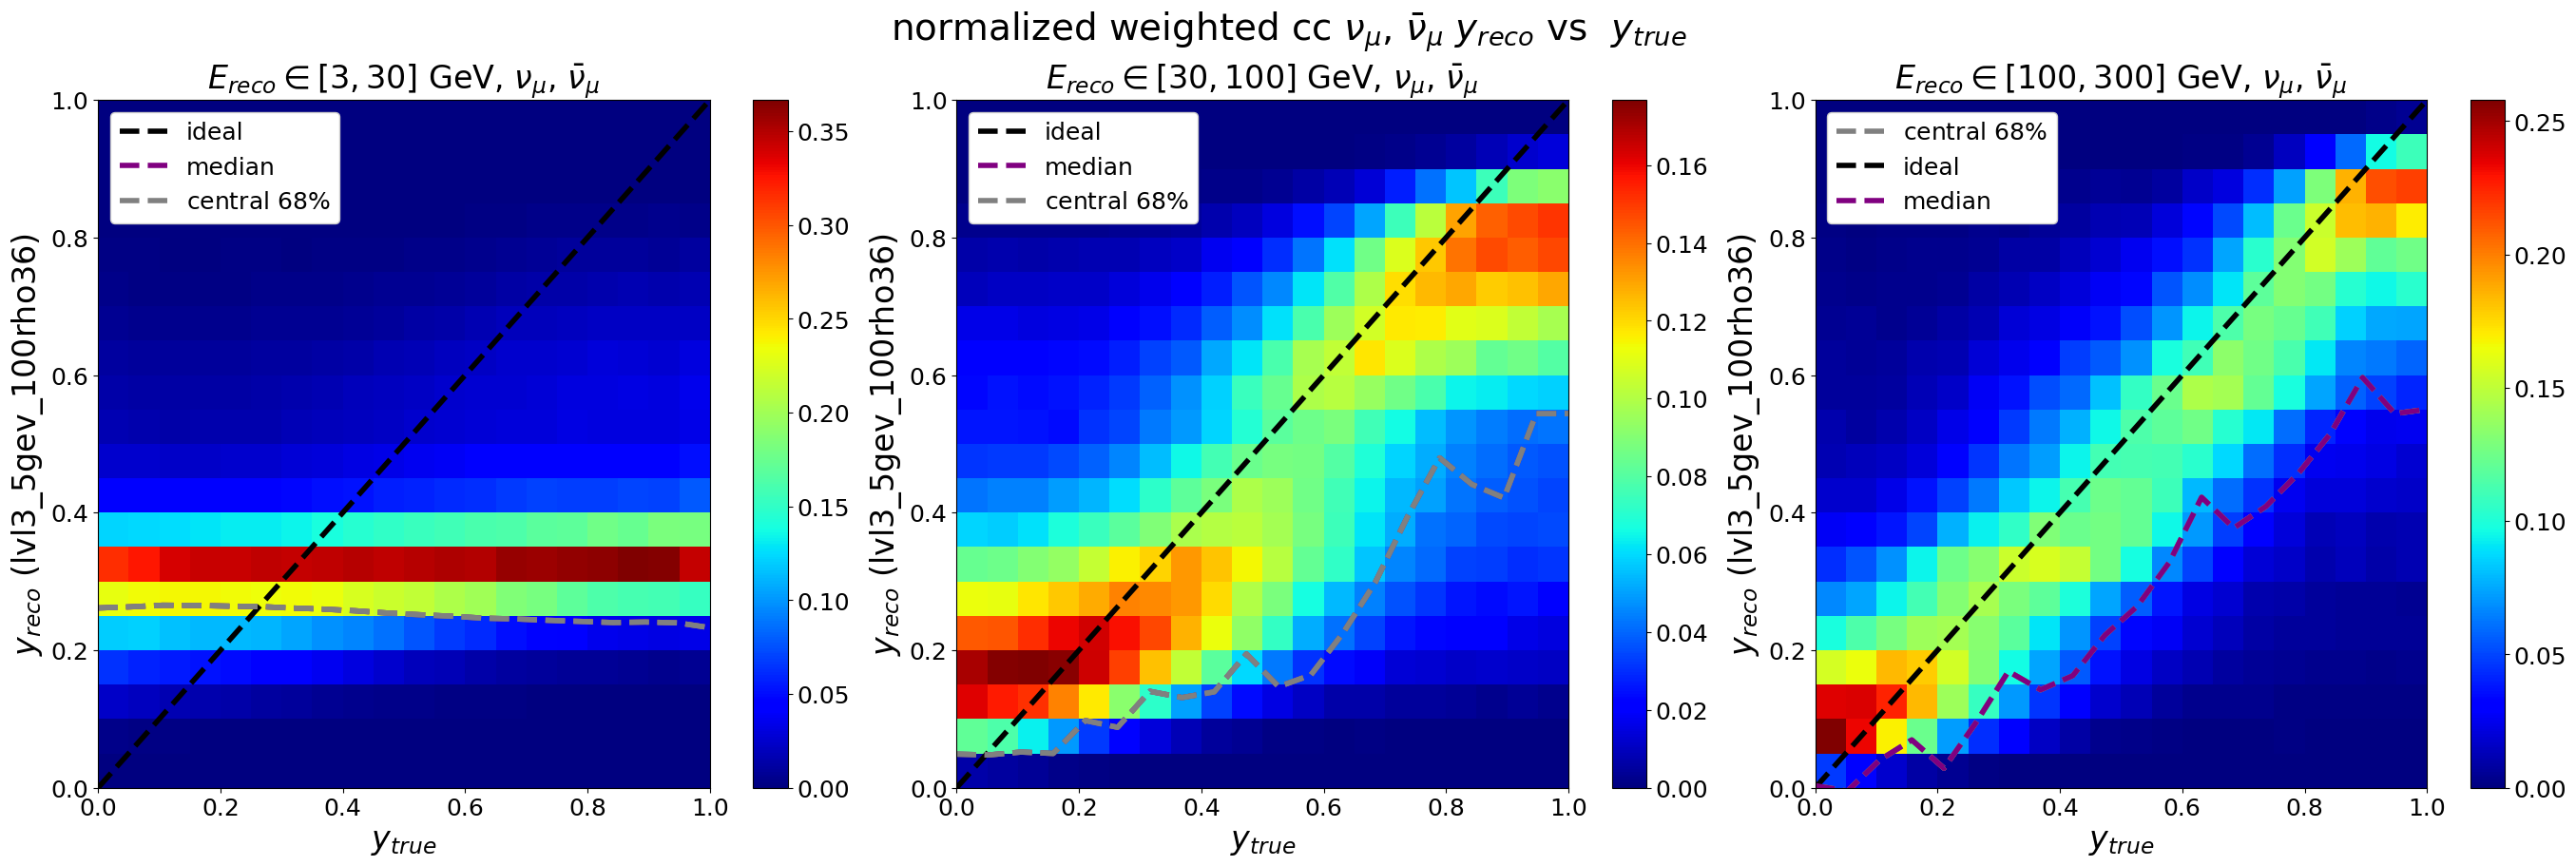

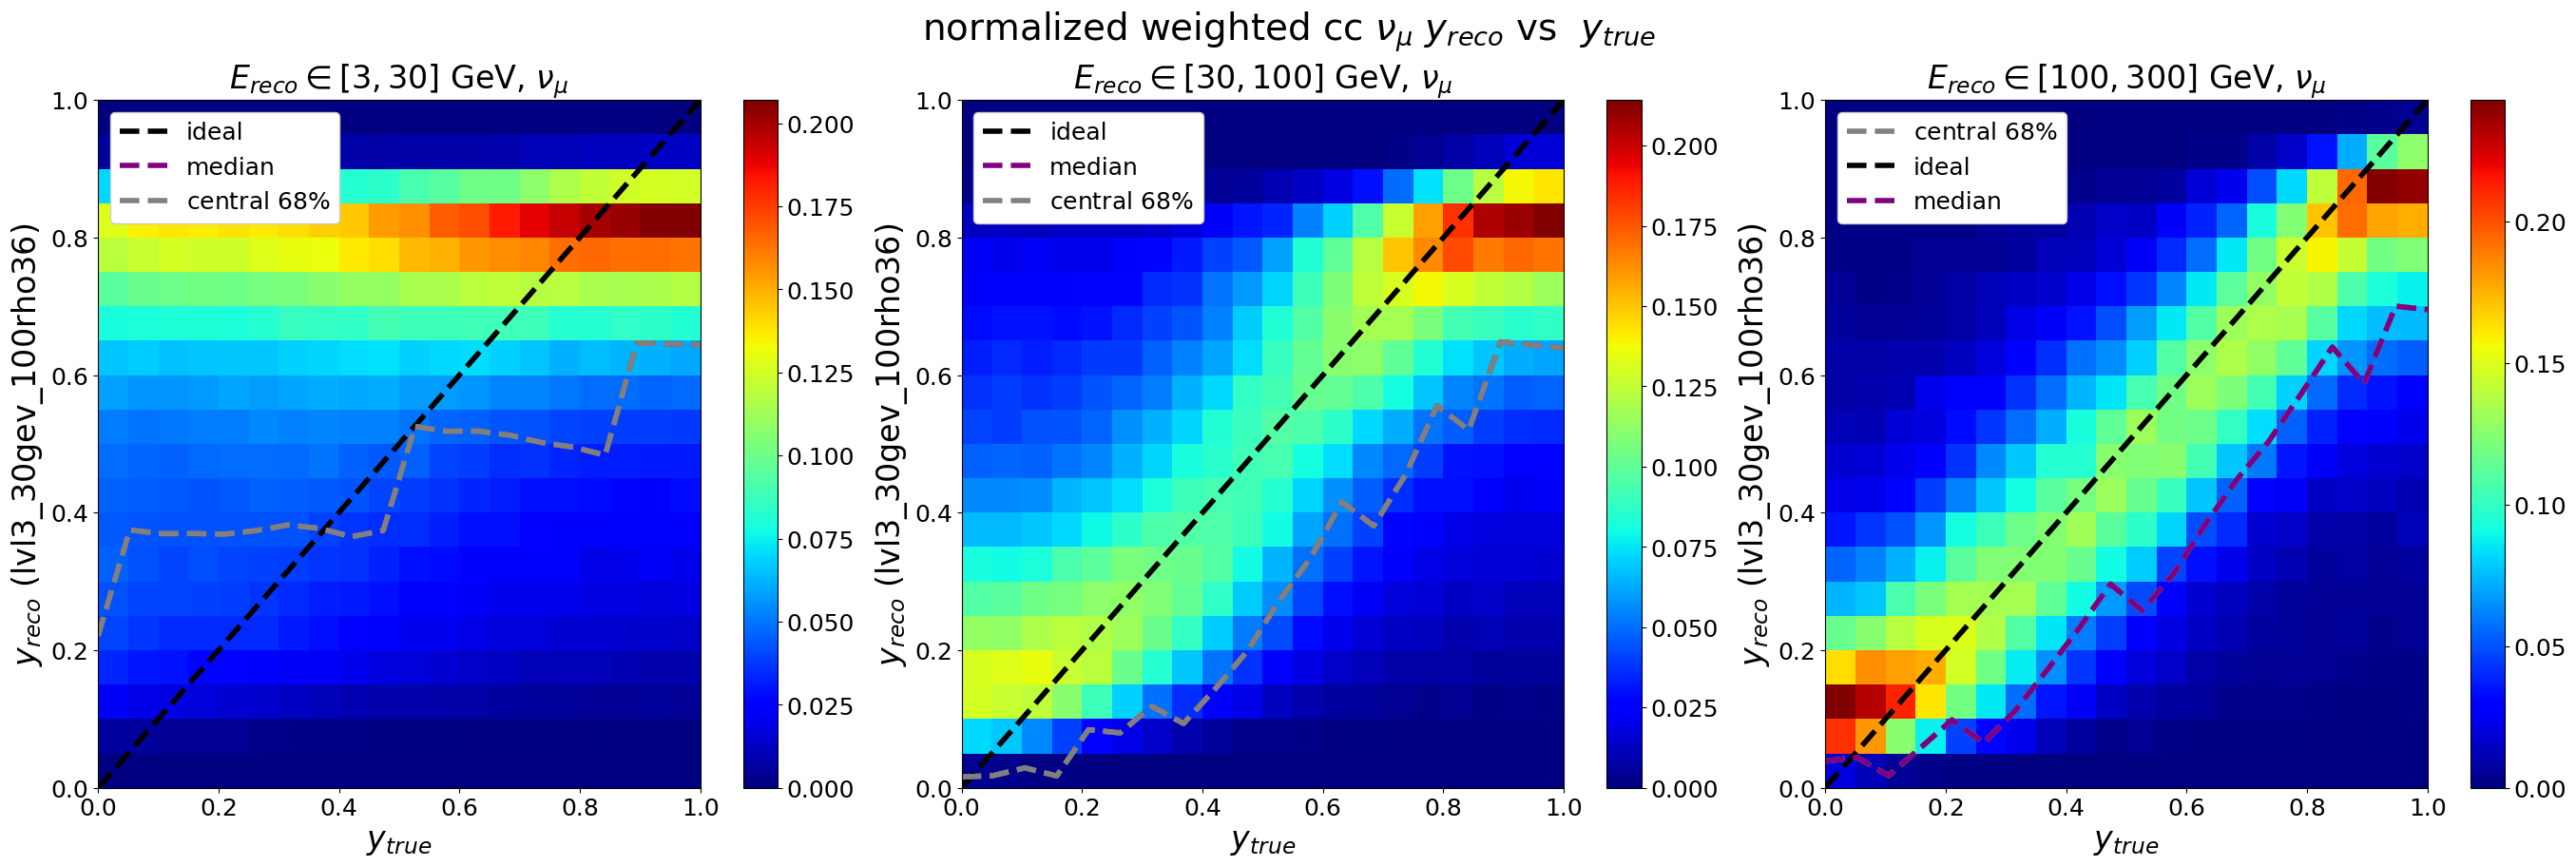

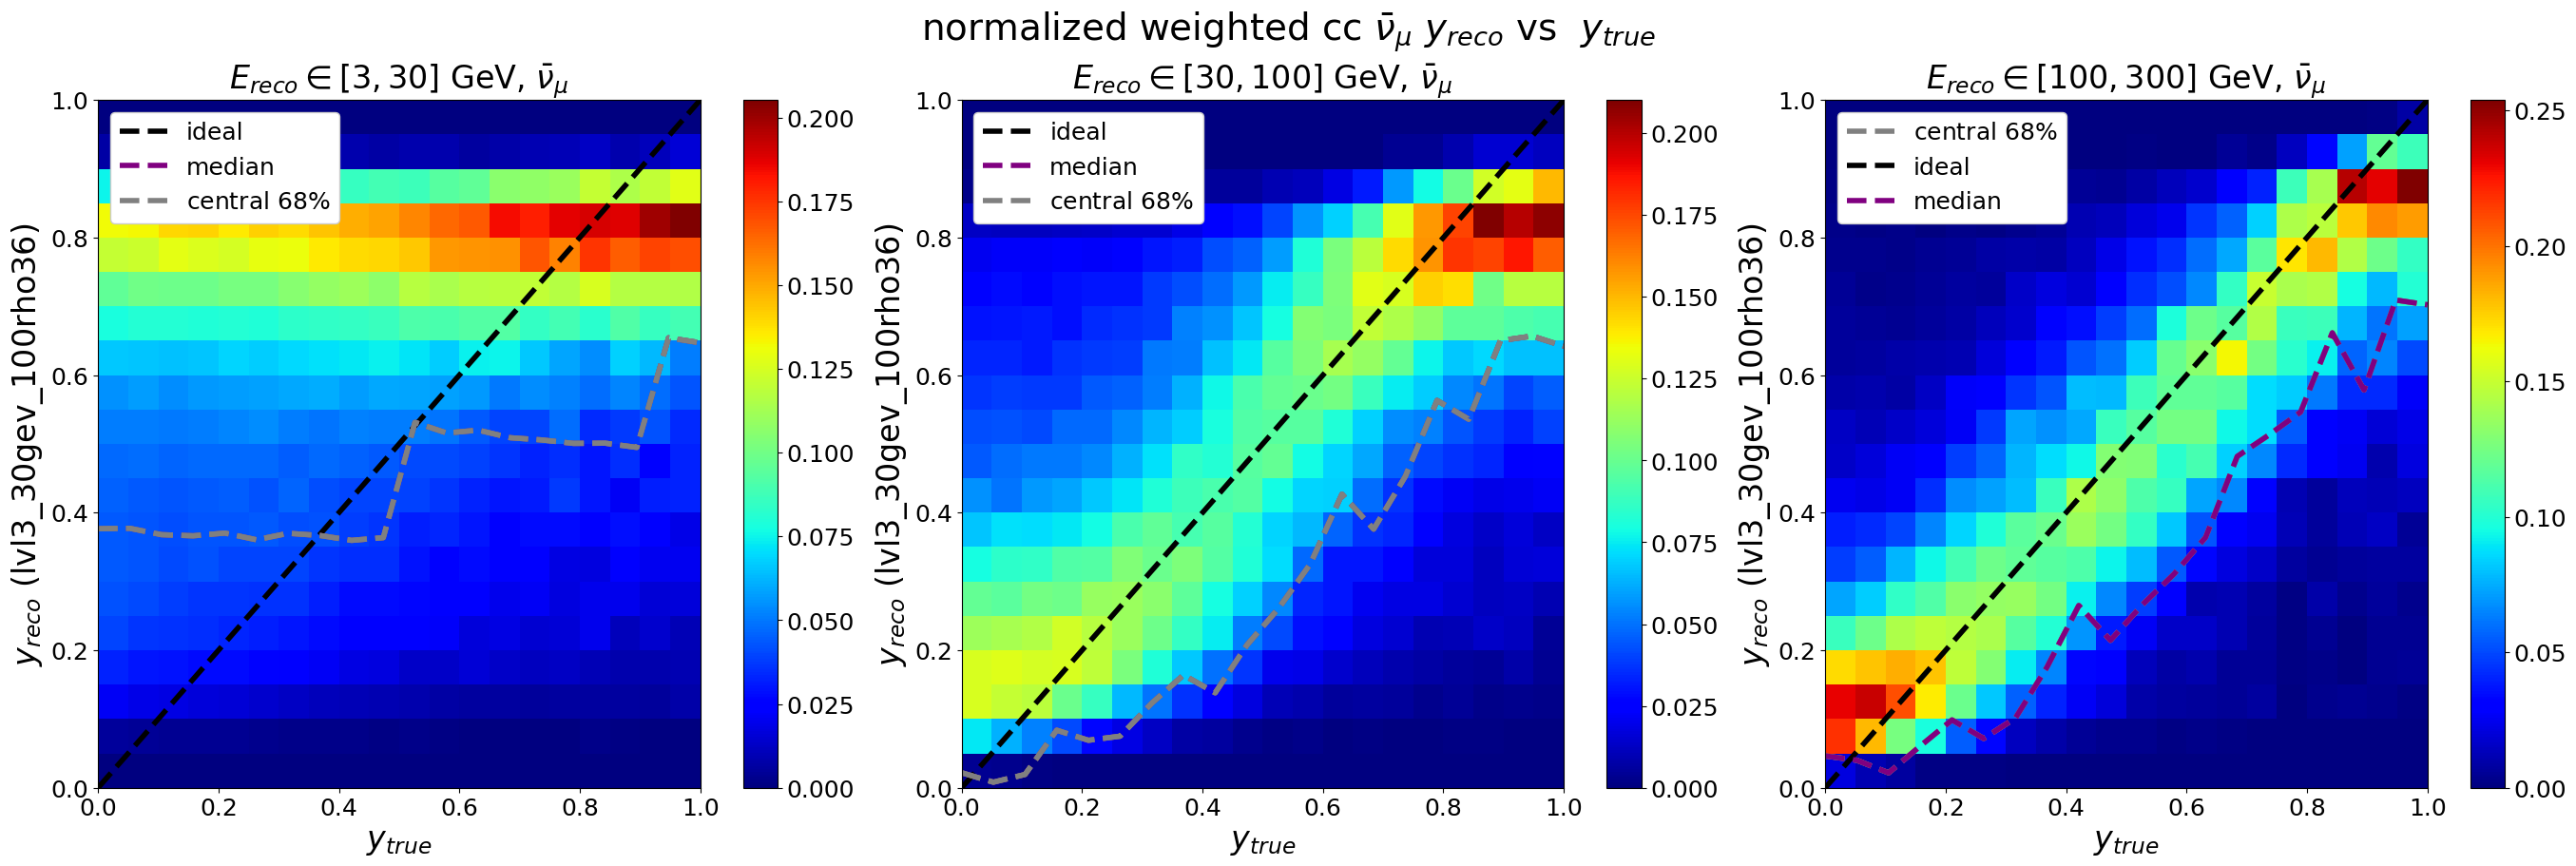

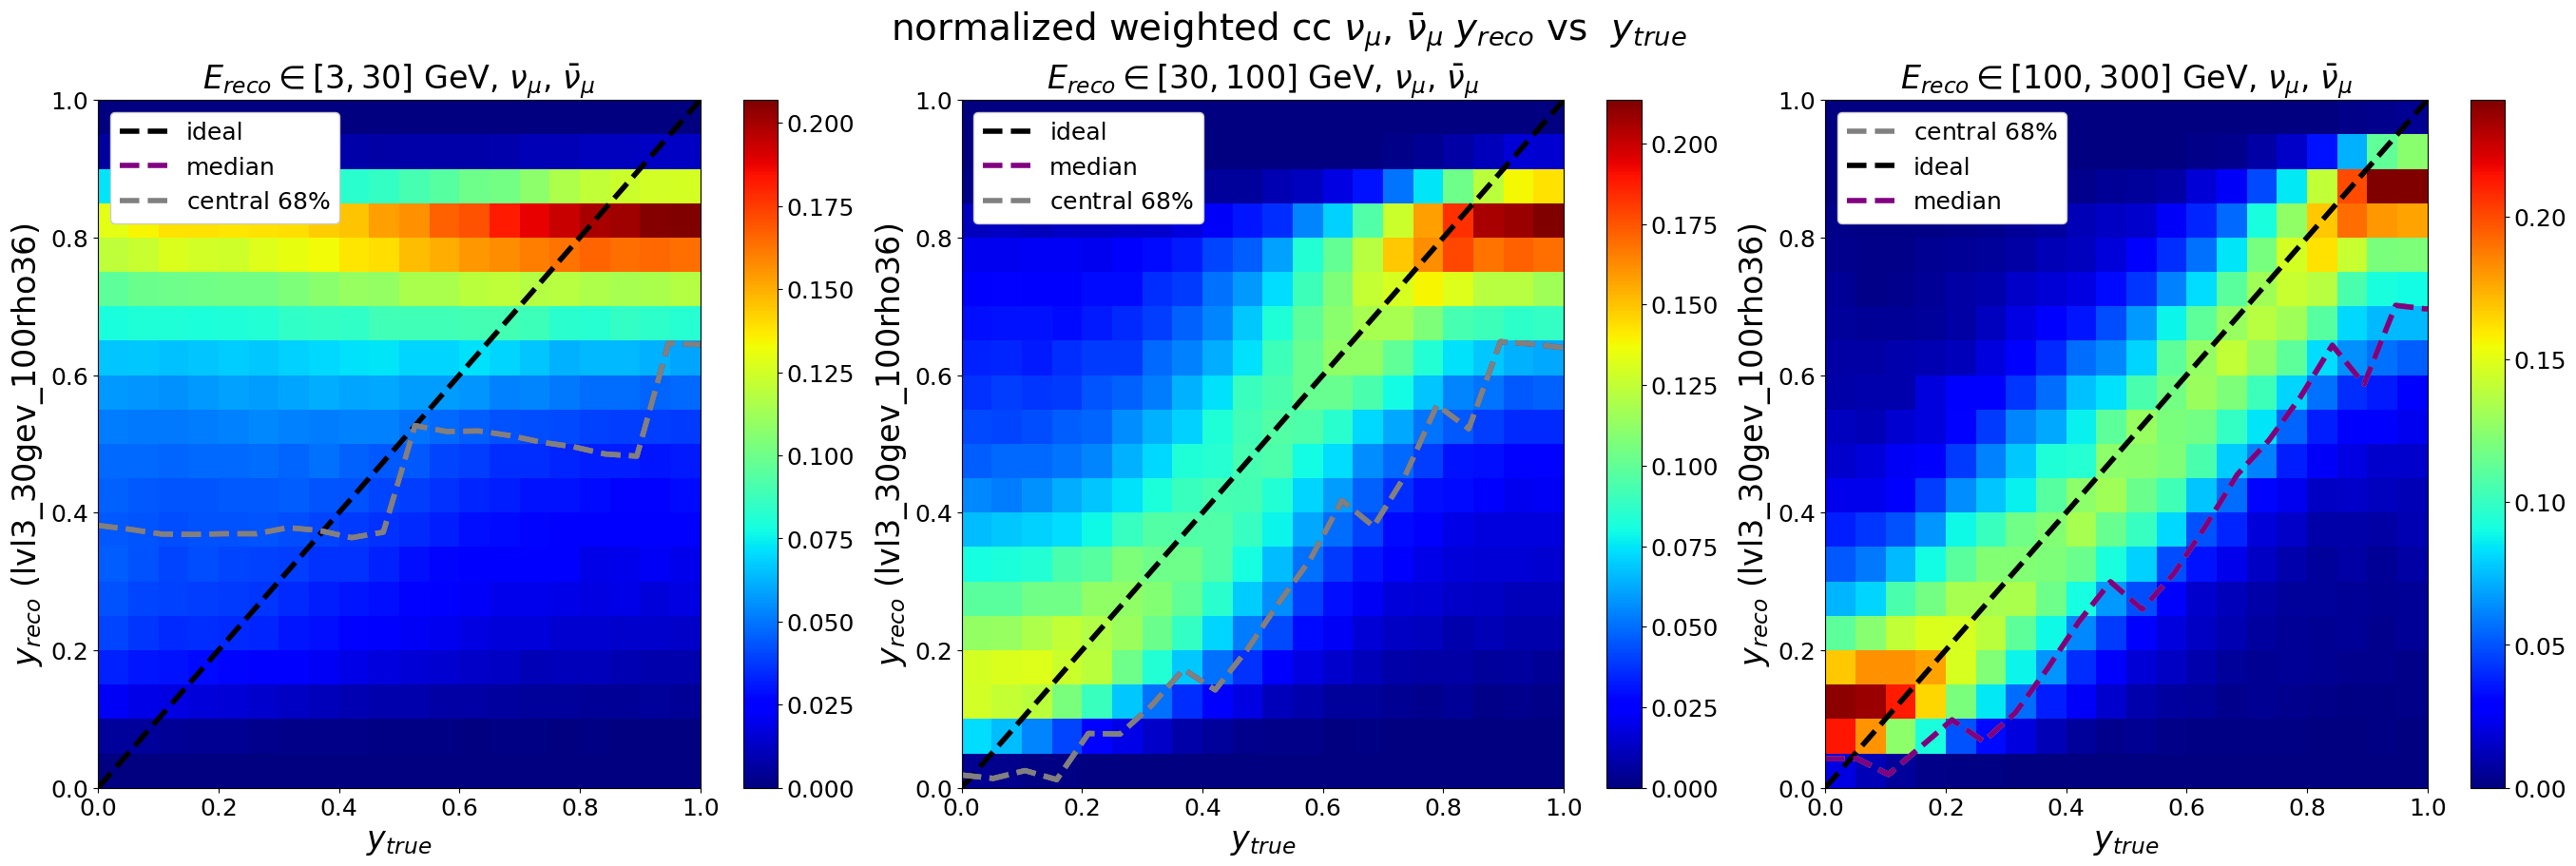

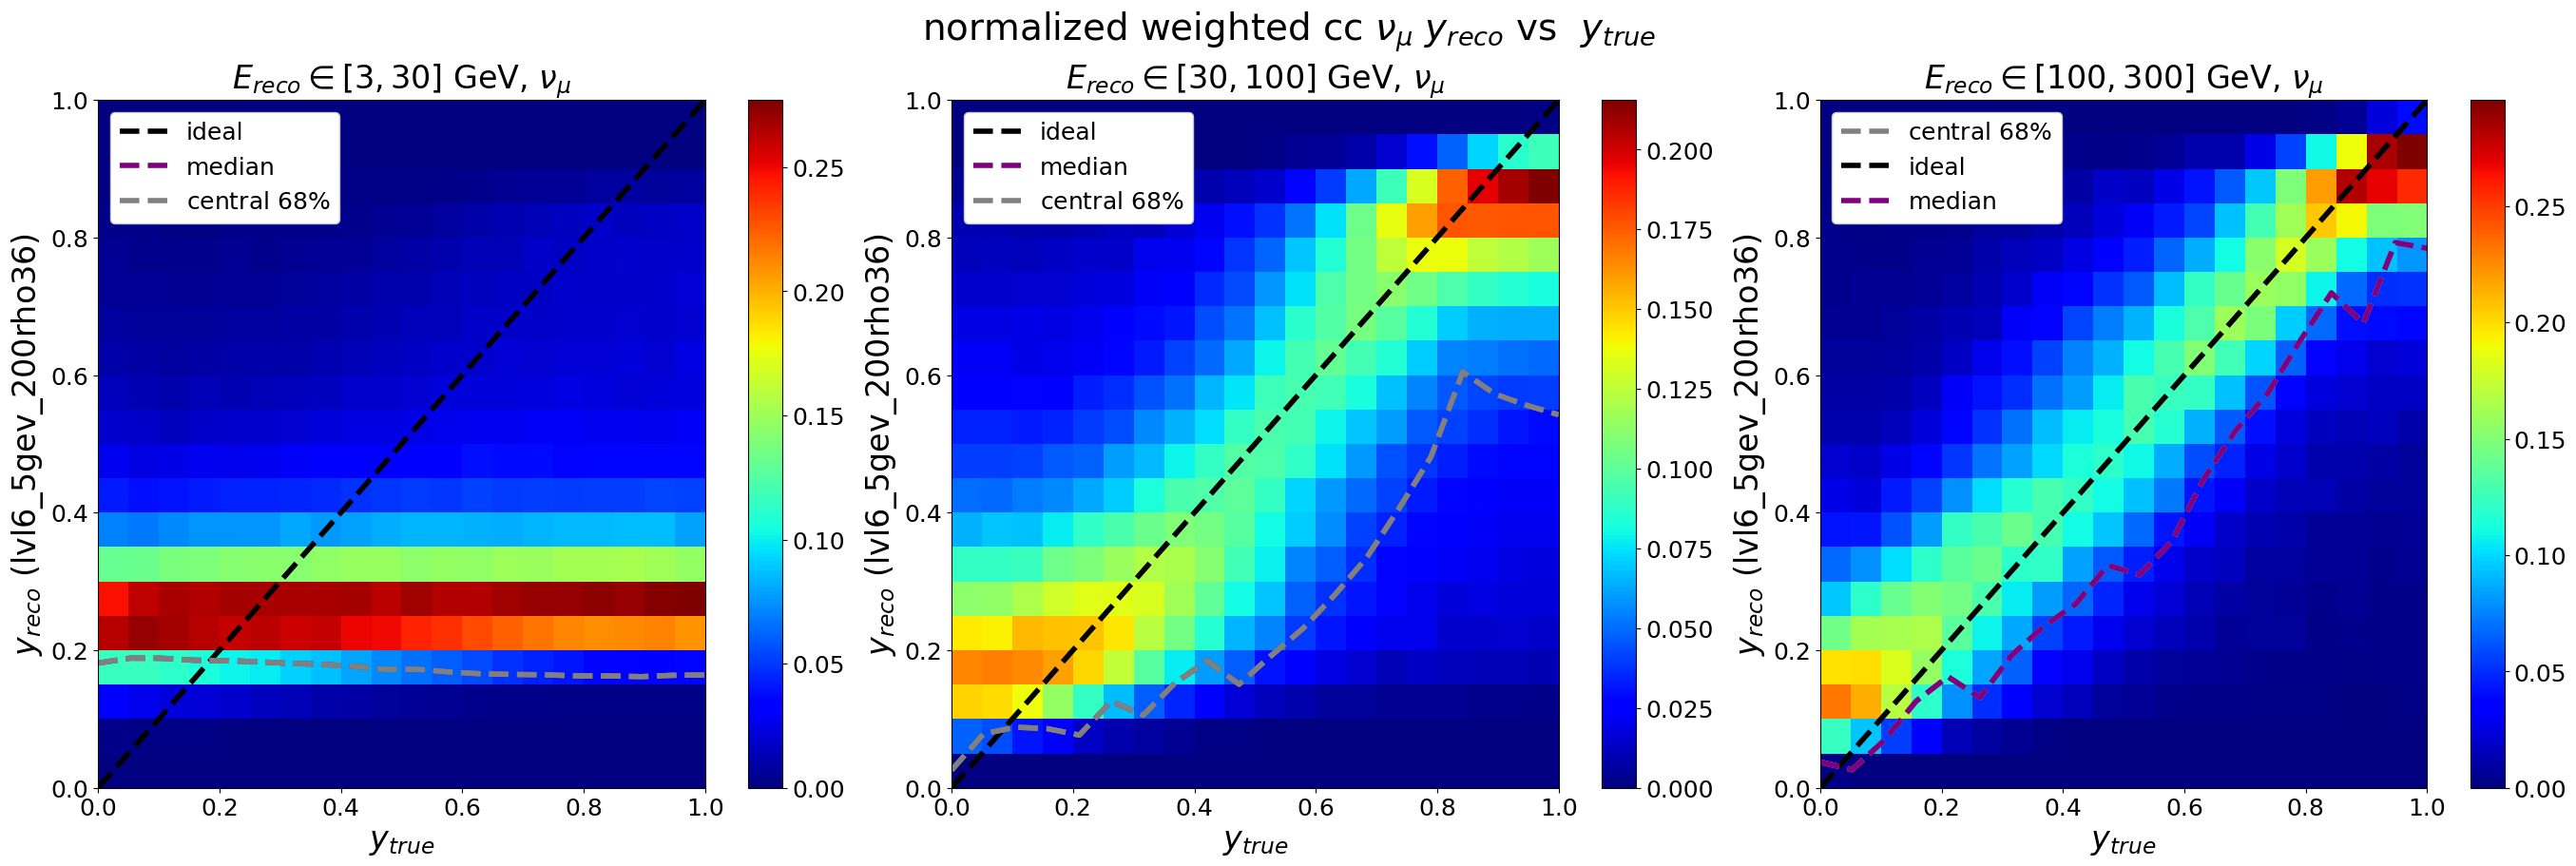

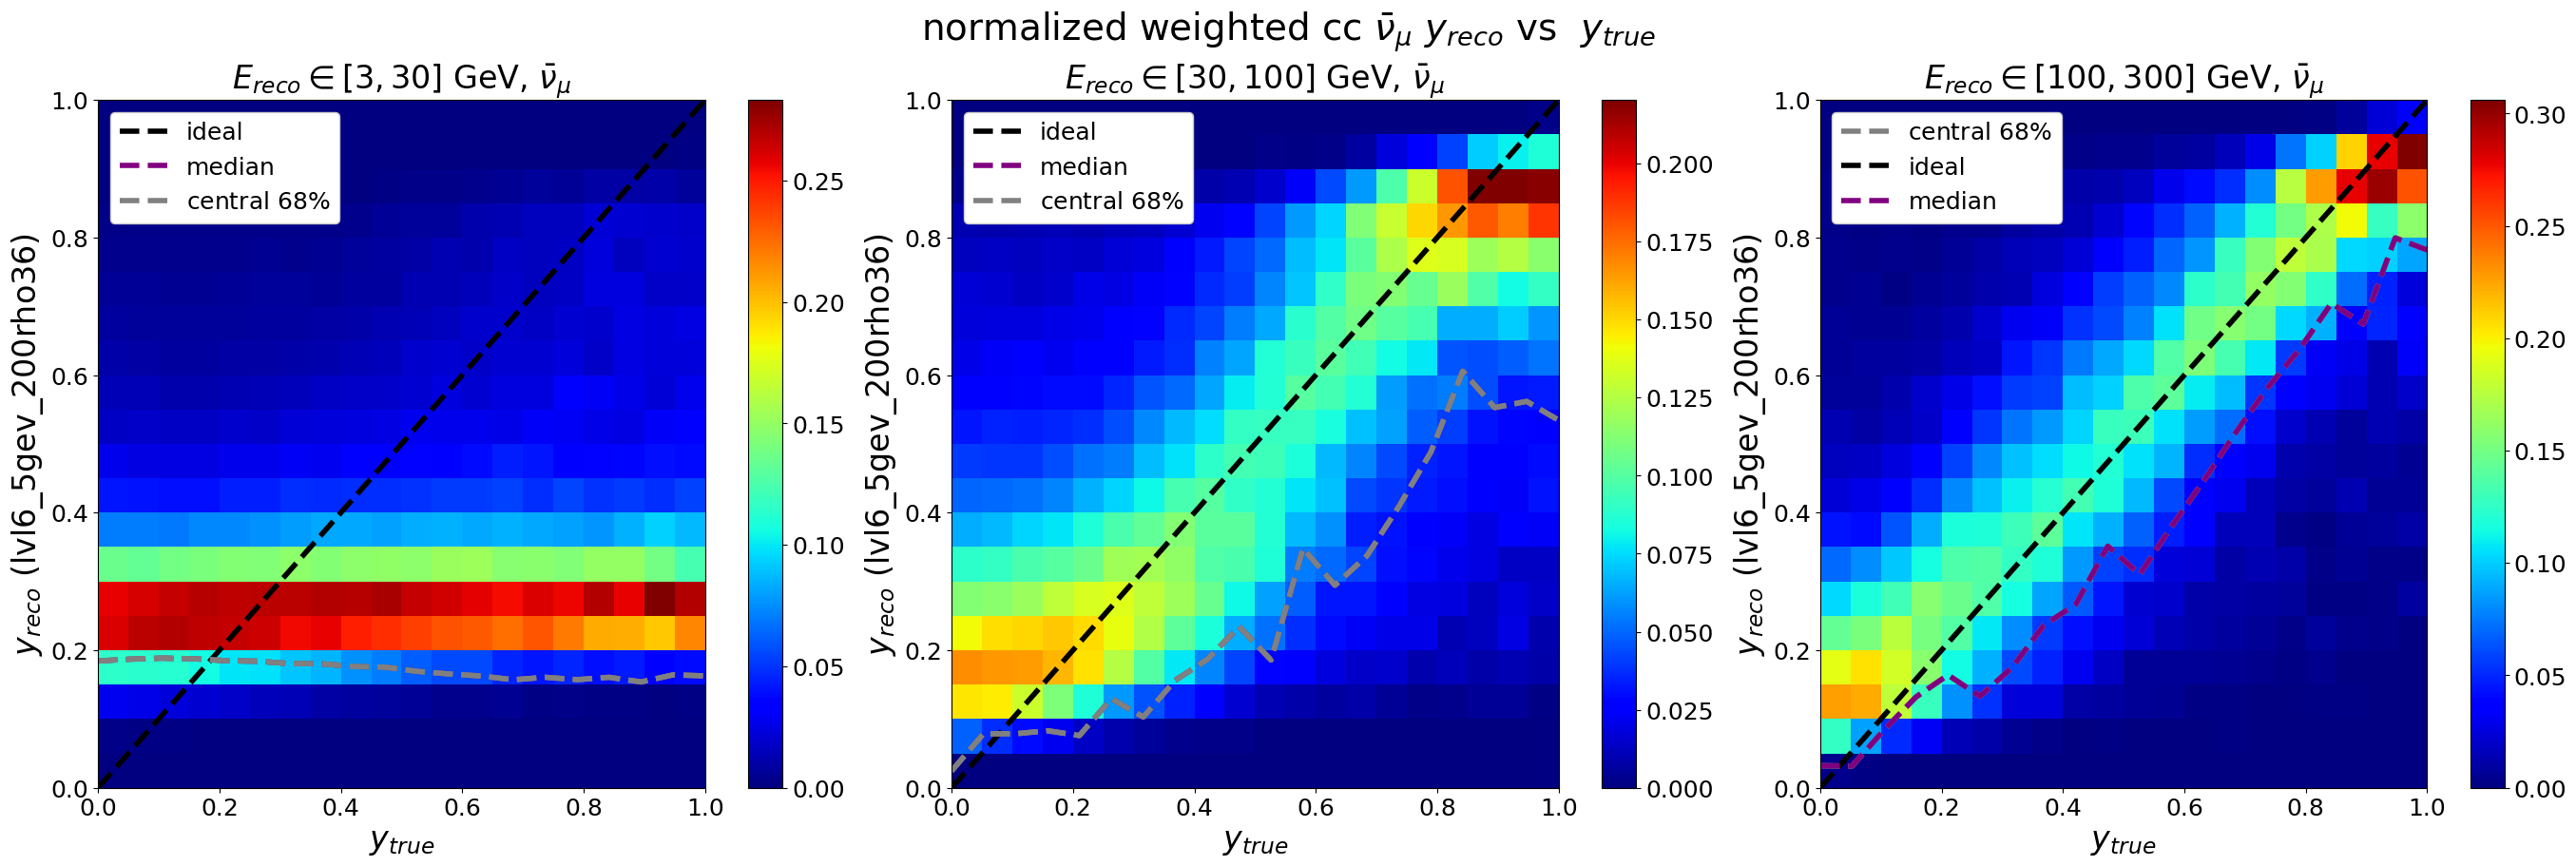

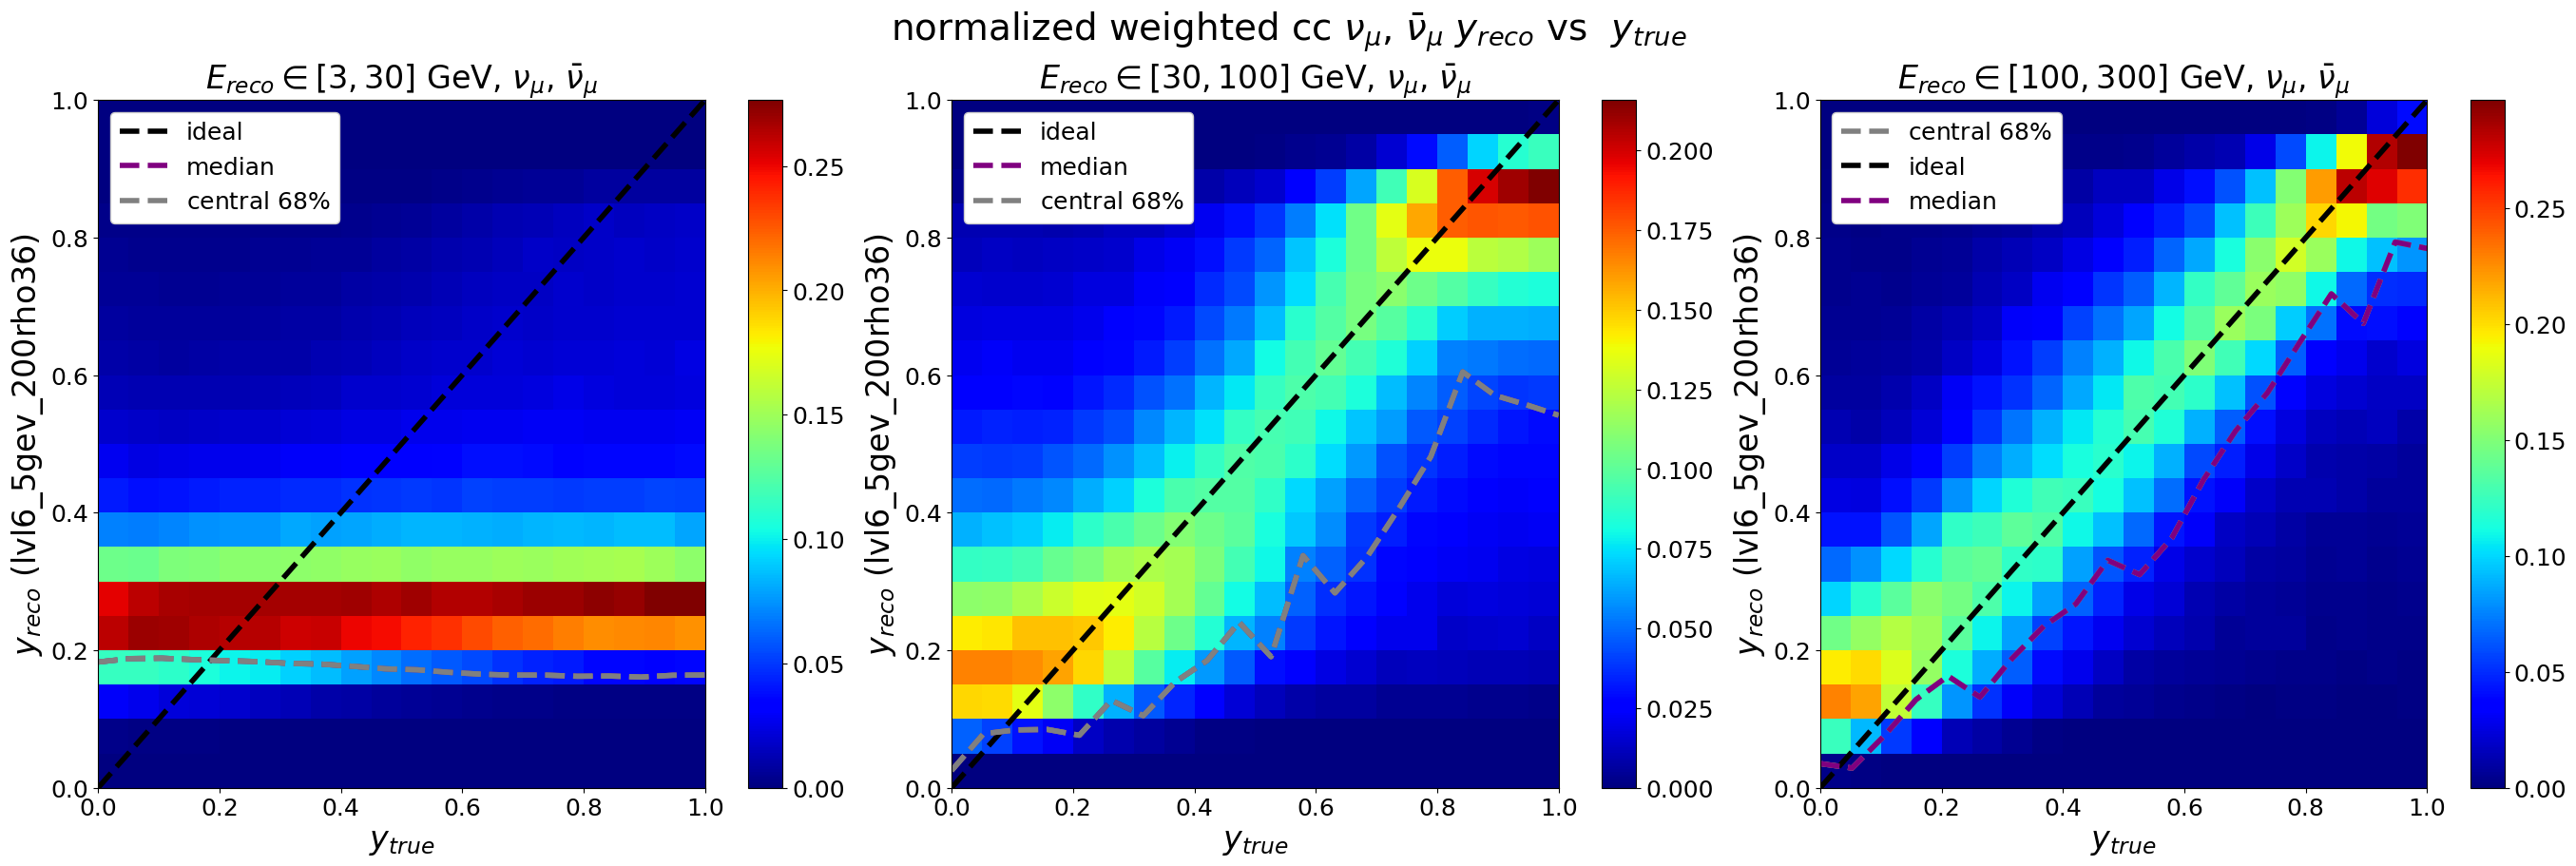

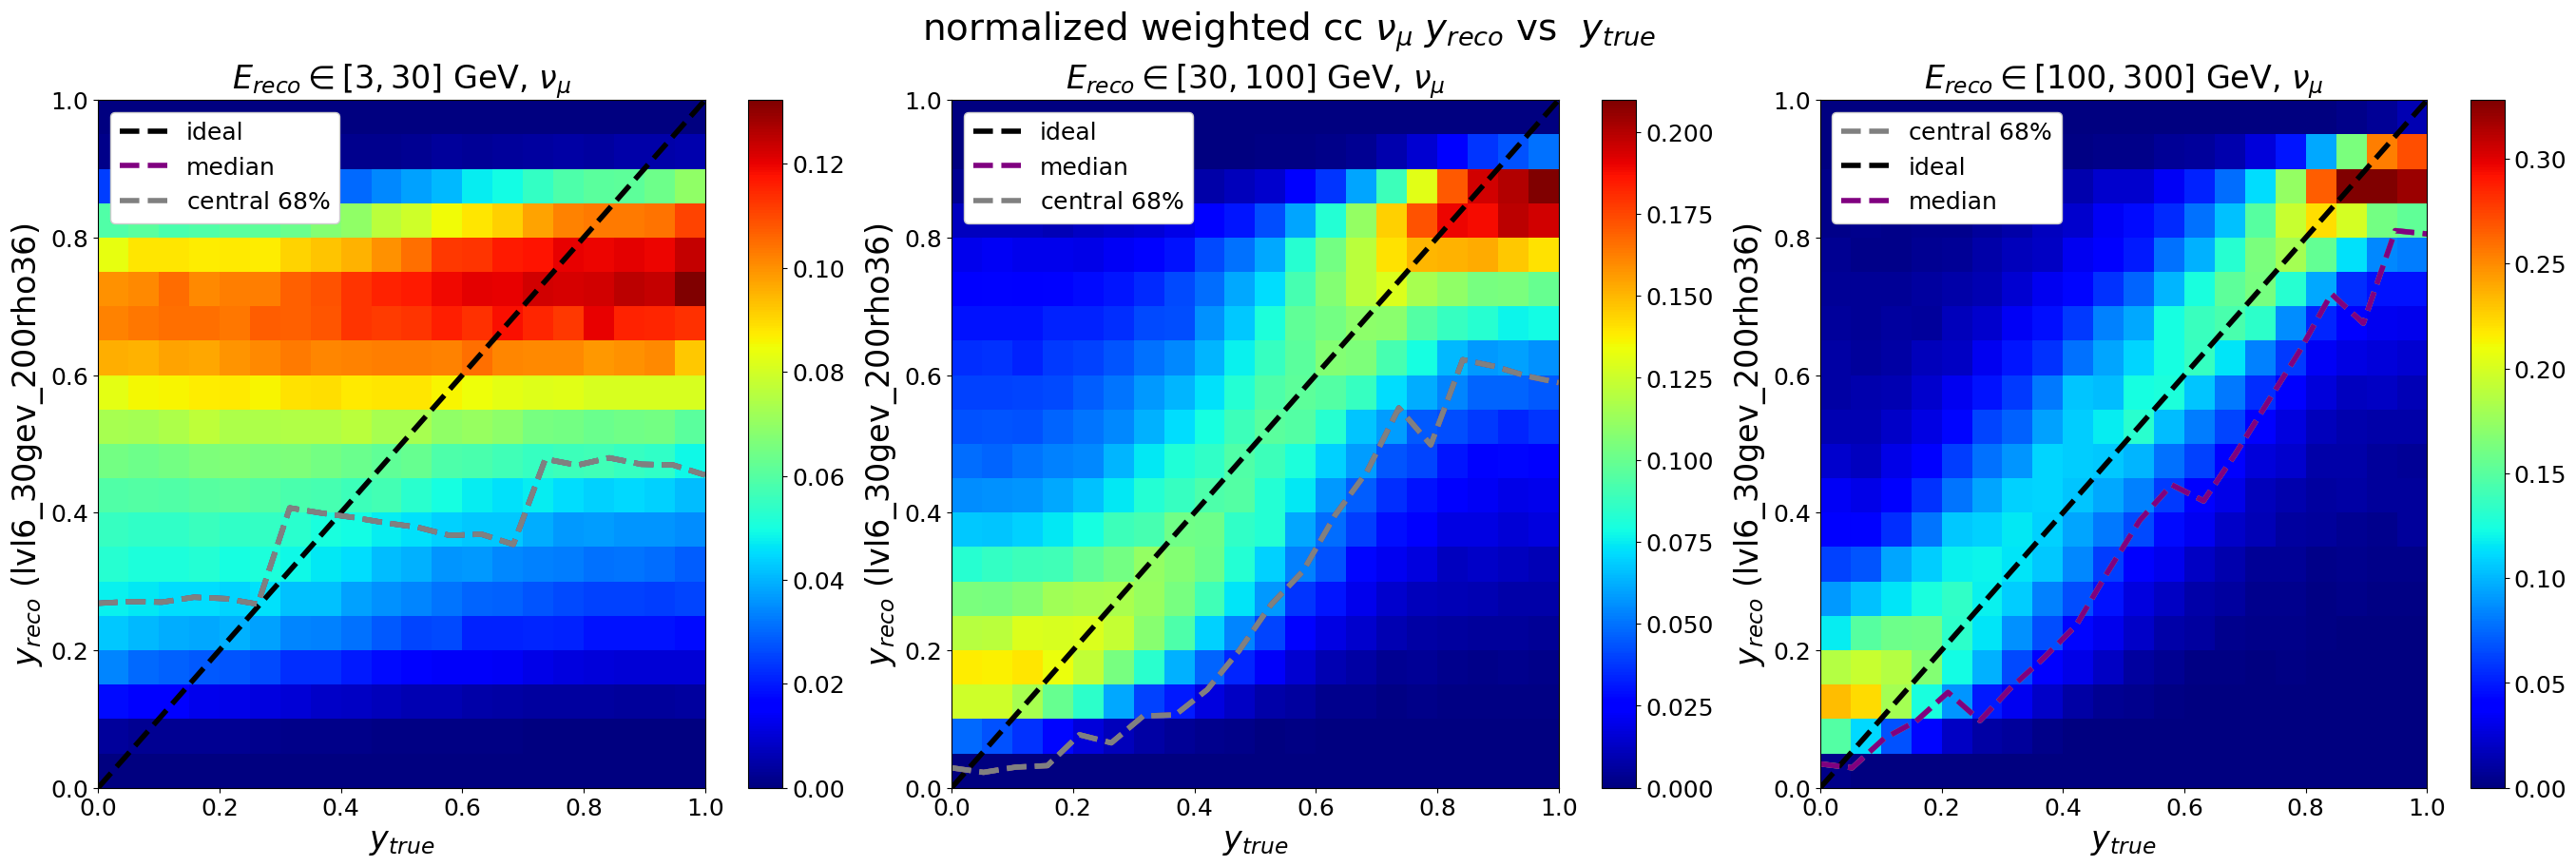

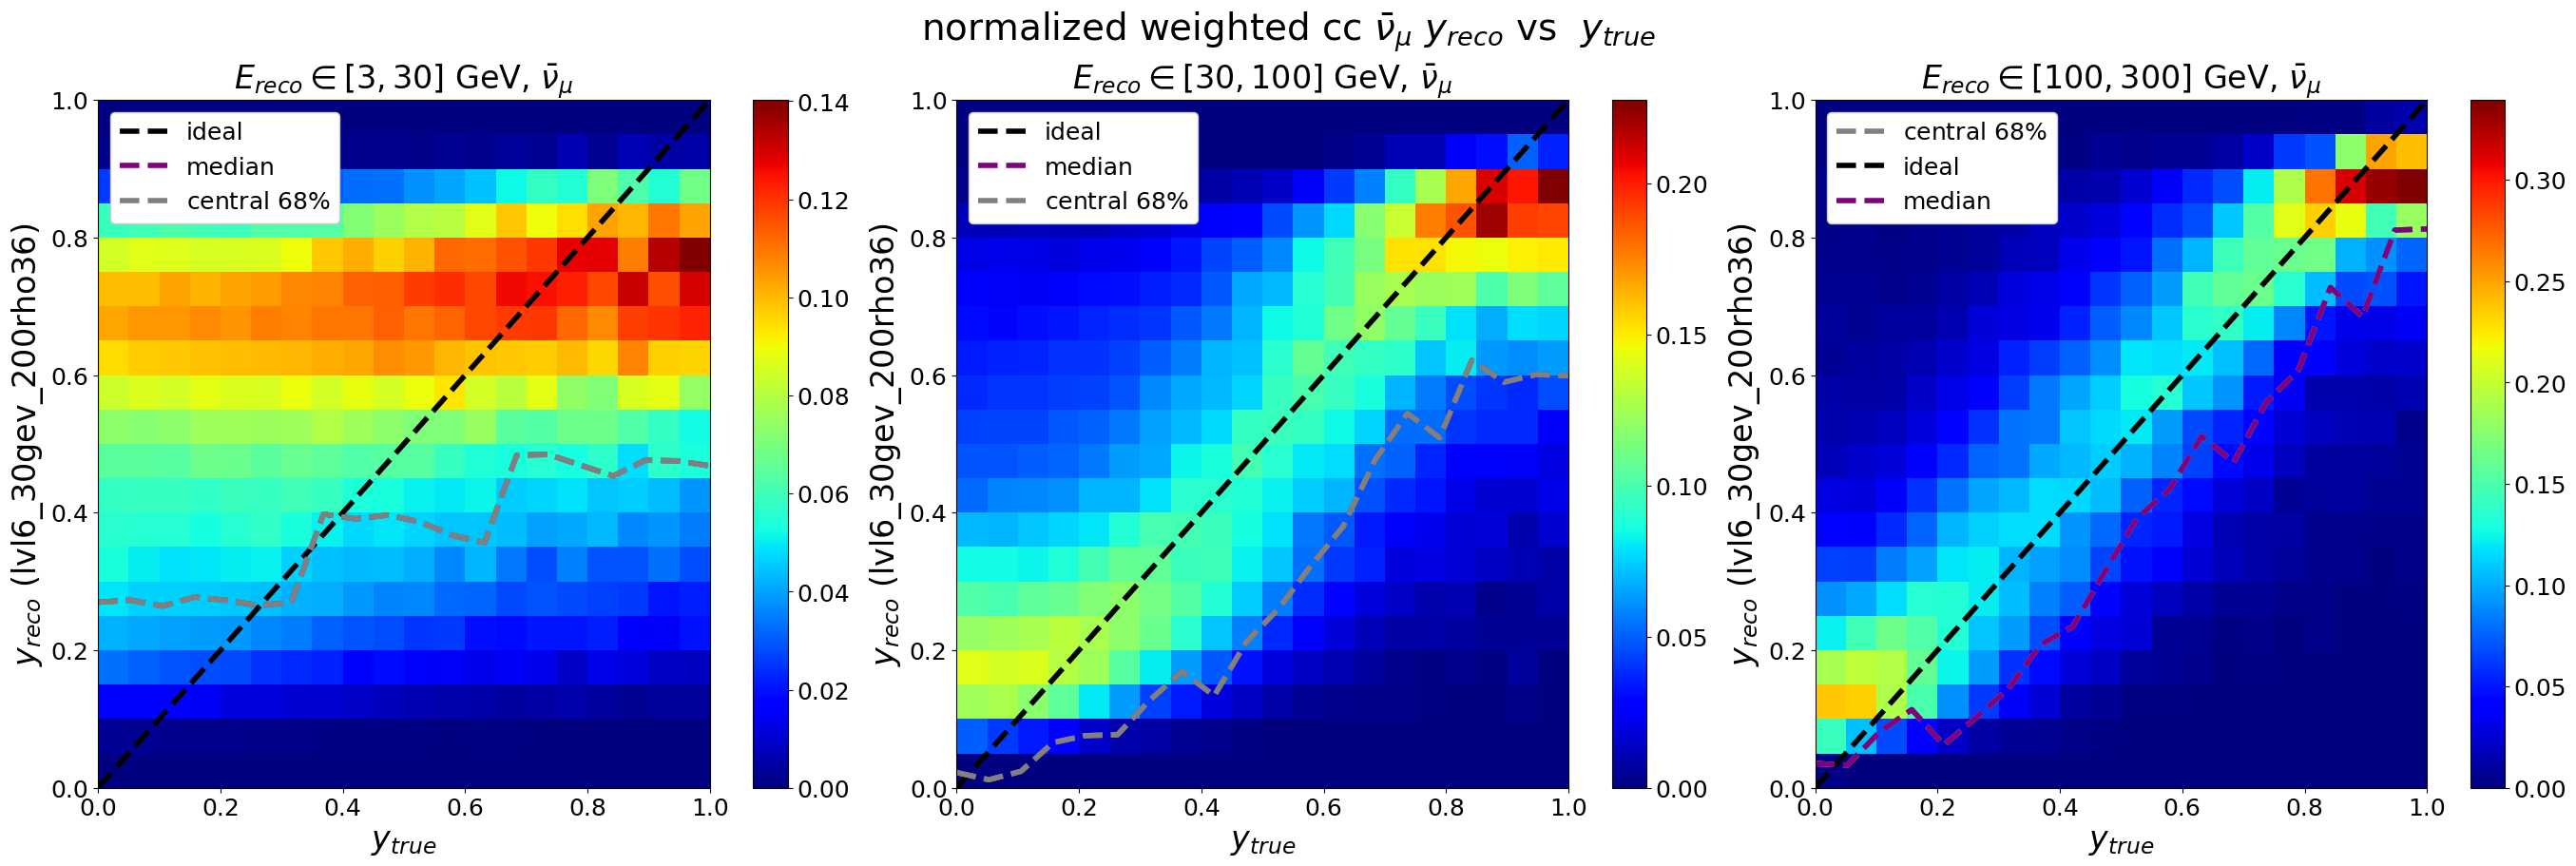

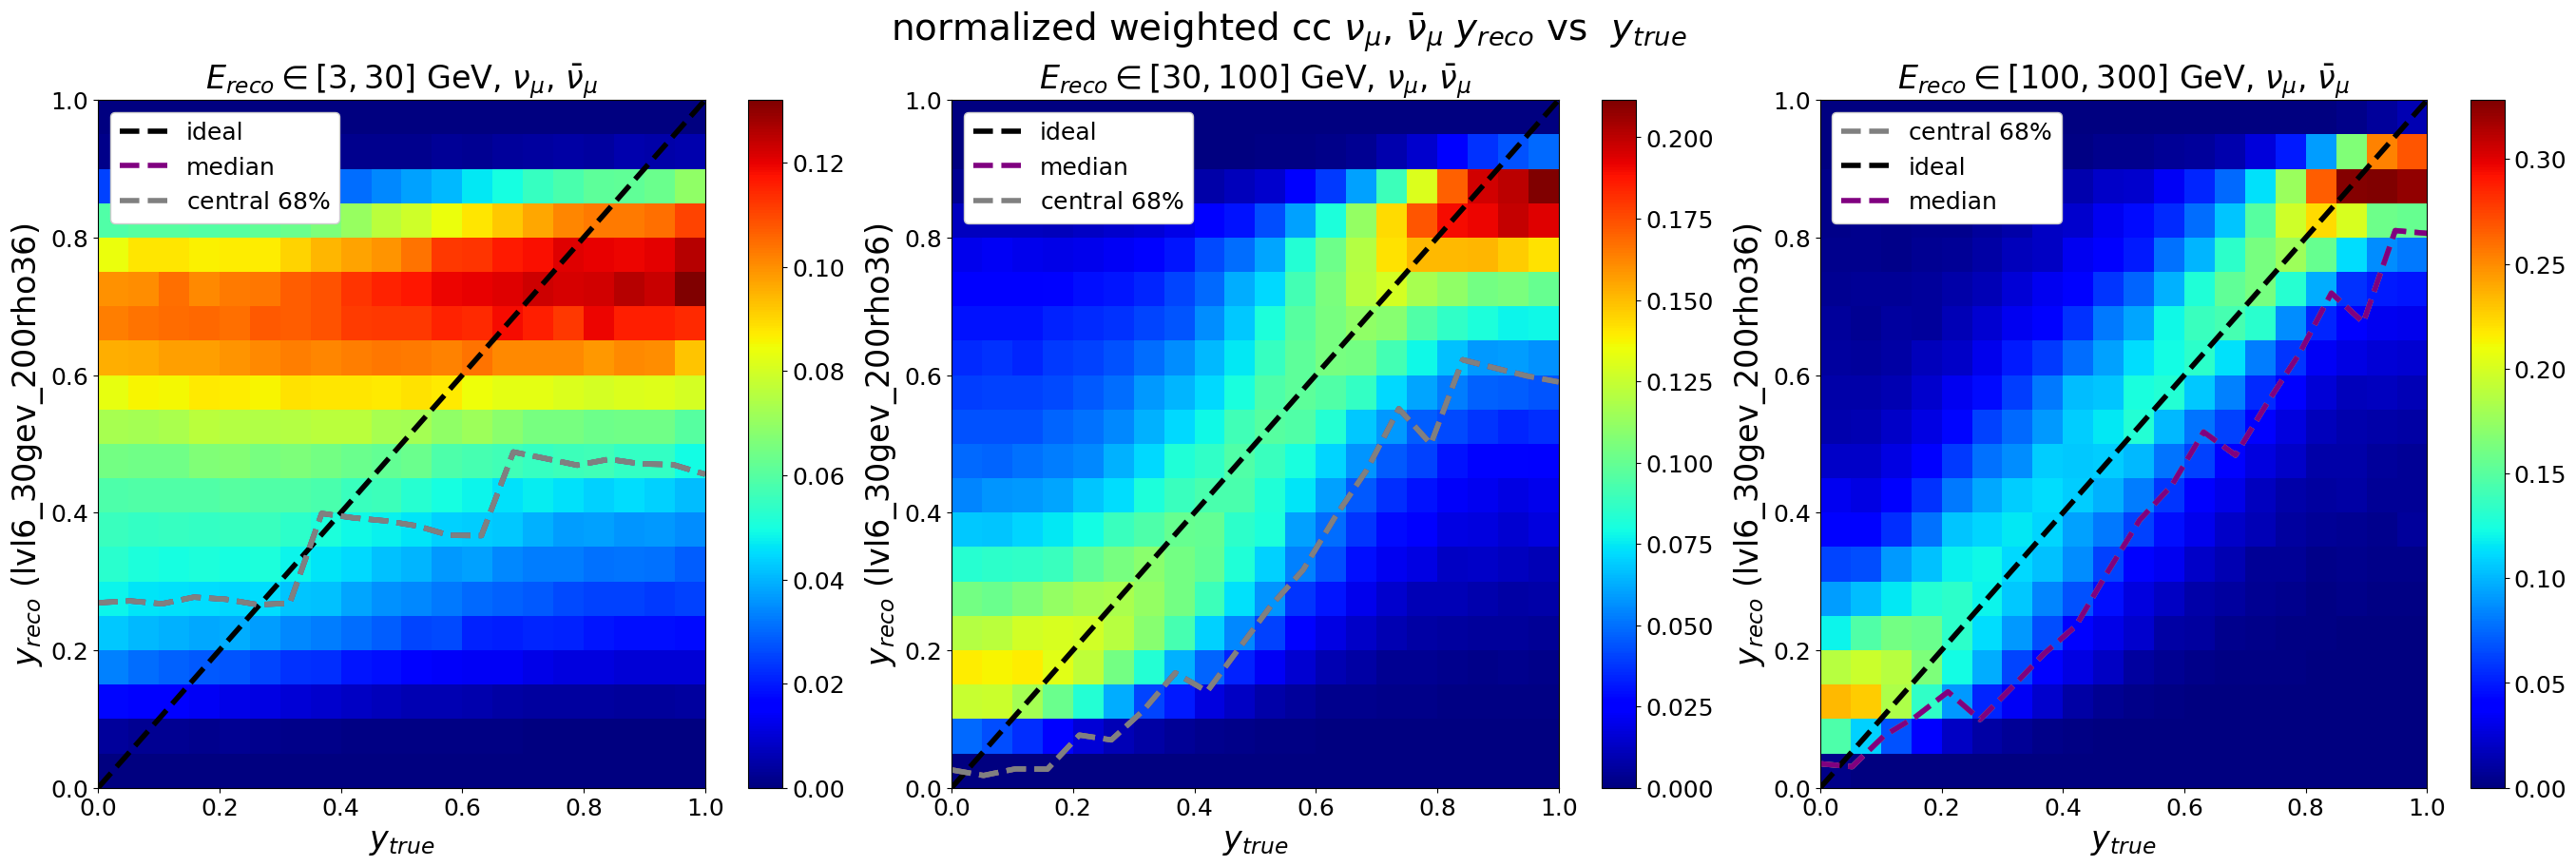

In [477]:
plotflag = True
reco = True

if reco==True:
    reco_E_islow = ((true_Eranges['low'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (true_E <= true_Eranges['low'][-1]*np.ones(true_E.shape)))
    reco_E_ismedium = ((true_Eranges['medium'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (true_E <= true_Eranges['medium'][-1]*np.ones(true_E.shape)))
    reco_E_ishigh = ((true_Eranges['high'][0]*np.ones(true_E.shape)<= reco_E) 
                    & (true_E <= true_Eranges['high'][-1]*np.ones(true_E.shape))) 

    
if plotflag == True:    
    for i,y in enumerate(ys.values()):
        for j,nu in enumerate(nutype.values()):
            if reco==True:
                true_y_low_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                true_y_medium_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                true_y_high_cc=bjorken_y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                
                reco_y_low_cc=y[is_cc*(yisnegative==False)*reco_E_islow*nu]
                reco_y_medium_cc=y[is_cc*(yisnegative==False)*reco_E_ismedium*nu]
                reco_y_high_cc=y[is_cc*(yisnegative==False)*reco_E_ishigh*nu]
                
                weights_low_cc=reweight_truey(fluxweights_both[is_cc*(yisnegative==False)*reco_E_islow*nu],
                                              bjorken_y[is_cc*(yisnegative==False)*reco_E_islow*nu],yrange)
                weights_medium_cc=reweight_truey(fluxweights_both[is_cc*(yisnegative==False)*reco_E_ismedium*nu],
                                              bjorken_y[is_cc*(yisnegative==False)*reco_E_ismedium*nu],yrange)
                weights_high_cc=reweight_truey(fluxweights_both[is_cc*(yisnegative==False)*reco_E_ishigh*nu],
                                              bjorken_y[is_cc*(yisnegative==False)*reco_E_ishigh*nu],yrange)                
            else:
                true_y_low_cc=bjorken_y[is_cc*(yisnegative==False)*true_E_islow*nu]
                true_y_medium_cc=bjorken_y[is_cc*(yisnegative==False)*true_E_ismedium*nu]
                true_y_high_cc=bjorken_y[is_cc*(yisnegative==False)*true_E_ishigh*nu]
                
                reco_y_low_cc=y[is_cc*(yisnegative==False)*true_E_islow*nu]
                reco_y_medium_cc=y[is_cc*(yisnegative==False)*true_E_ismedium*nu]
                reco_y_high_cc=y[is_cc*(yisnegative==False)*true_E_ishigh*nu]
                
                weights_low_cc=reweight_truey(fluxweights_both[is_cc*(yisnegative==False)*true_E_islow*nu],
                                              bjorken_y[is_cc*(yisnegative==False)*true_E_islow*nu],yrange)
                weights_medium_cc=reweight_truey(fluxweights_both[is_cc*(yisnegative==False)*true_E_ismedium*nu],
                                              bjorken_y[is_cc*(yisnegative==False)*true_E_ismedium*nu],yrange)
                weights_high_cc=reweight_truey(fluxweights_both[is_cc*(yisnegative==False)*true_E_ishigh*nu],
                                              bjorken_y[is_cc*(yisnegative==False)*true_E_ishigh*nu],yrange)  
            
            #plotsection weighted
            
            fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

            h,_,_,im=ax1.hist2d(true_y_low_cc,reco_y_low_cc,bins=[yrange,yrange],
                       cmap=plt.cm.jet,norm=mpl.colors.Normalize(),weights=weights_low_cc)
            ax1.set_xlabel(r'$y_{true}$',fontsize=24)
            ax1.set_ylabel(r'$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax1.set_title(r'$E_{{reco}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax1.set_title(r'$E_{{true}} \in [3,30]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)            
            ax1.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=4.,label='ideal')
            ax1.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',label='median',ls='dashed',lw=4.)
            #lower,higher=bordercalc(true_y_low_cc,weights_low_cc,yrange,1)
            lower=quantile1dfrom2dbins(h,0.5)
            higher=quantile1dfrom2dbins(h,0.5)
            ax1.plot(np.linspace(0,1,len(yrange)-1),lower/(len(yrange)-1),lw=4.,ls='dashed',color='grey',label=r'central 68$\%$')
            ax1.plot(np.linspace(0,1,len(yrange)-1),higher/(len(yrange)-1),lw=4.,ls='dashed',color='grey')
            ax1.tick_params(axis='both', which='major', labelsize=18)
            ax1.tick_params(axis='both', which='minor', labelsize=18)
            ax1.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax2.hist2d(true_y_medium_cc,reco_y_medium_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet,norm=mpl.colors.Normalize(),weights=weights_medium_cc)
            ax2.set_xlabel(r'$y_{true}$',fontsize=24)
            ax2.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax2.set_title(r'$E_{{reco}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax2.set_title(r'$E_{{true}} \in [30,100]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)            
            ax2.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=4.,label='ideal')
            ax2.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',label='median',ls='dashed',lw=4.)
            #lower,higher=bordercalc(true_y_medium_cc,weights_medium_cc,yrange,1)
            lower=quantile1dfrom2dbins(h,0.5)
            higher=quantile1dfrom2dbins(h,0.5)
            ax2.plot(np.linspace(0,1,len(yrange)-1),lower/(len(yrange)-1),lw=4.,ls='dashed',color='grey',label=r'central 68$\%$')
            ax2.plot(np.linspace(0,1,len(yrange)-1),higher/(len(yrange)-1),lw=4.,ls='dashed',color='grey')
            ax2.tick_params(axis='both', which='major', labelsize=18)
            ax2.tick_params(axis='both', which='minor', labelsize=18)
            ax2.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            h,_,_,im=ax3.hist2d(true_y_high_cc,reco_y_high_cc,bins=[yrange,yrange],
                                cmap=plt.cm.jet,norm=mpl.colors.Normalize(),weights=weights_high_cc)
            ax3.set_xlabel(r'$y_{true}$',fontsize=24)
            ax3.set_ylabel('$y_{{reco}}$ ({y})'.format(y=yname[i]),fontsize=24)
            if reco==True:
                ax3.set_title(r'$E_{{reco}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)
            if reco==False:
                ax3.set_title(r'$E_{{true}} \in [100,300]$ GeV, {nu}'.format(nu=nulabel[j]),fontsize=24)  
            #lower,higher=bordercalc(true_y_high_cc,weights_high_cc,yrange,1)
            lower=quantile1dfrom2dbins(h,0.5)
            higher=quantile1dfrom2dbins(h,0.5)
            ax3.plot(np.linspace(0,1,len(yrange)-1),lower/(len(yrange)-1),lw=4.,ls='dashed',color='grey',label=r'central 68$\%$')
            ax3.plot(np.linspace(0,1,len(yrange)-1),higher/(len(yrange)-1),lw=4.,ls='dashed',color='grey')
            ax3.plot(np.linspace(0,1,101),np.linspace(0,1,101),color='black',ls='dashed',lw=4.,label='ideal')
            ax3.plot(np.linspace(0,1,len(yrange)-1),median1dfrom2dbins(h)/(len(yrange)-1),
                     color='purple',label='median',ls='dashed',lw=4.)
            ax3.tick_params(axis='both', which='major', labelsize=18)
            ax3.tick_params(axis='both', which='minor', labelsize=18)
            ax3.legend(loc=2,fontsize=18,framealpha=1.)
            cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
            cb.ax.tick_params(labelsize=18)
            cb.ax.yaxis.get_offset_text().set_fontsize(18)
            
            fig.suptitle(r'normalized weighted cc {nu} $y_{{reco}}$ vs  $y_{{true}}$'.format(nu=nulabel[j]),fontsize=28)
            weightname = 'weighted_cc_ytruevsyreco'+'_'+yname[i]+'_'+list(nutype.keys())[j]+'.png'
 
            plt.show()

In [86]:
binning=np.linspace(0,1,21)

recoy=lvl3_30gev_100rho36

numu_cc_low_2d=np.zeros((20,20))
numubar_cc_low_2d=np.zeros((20,20))
weighted_numu_cc_low_2d=np.zeros((20,20))
weighted_numubar_cc_low_2d=np.zeros((20,20))

for i in range(len(yrange)-1):
    inytrue=((yrange[i]*np.ones(bjorken_y.shape)<= bjorken_y) 
                & (bjorken_y <= yrange[i+1]*np.ones(bjorken_y.shape)))
    for j in range(len(yrange)-1):
        inyreco=((yrange[j]*np.ones(recoy.shape)<= recoy) 
                & (recoy <= yrange[j+1]*np.ones(recoy.shape)))
        inErange=true_E_islow
        cc=is_cc
        nu=isnu
        nubar=isnubar
        yispos=(yisnegative==False)
        numu_cc_low_2d[i][j]=np.sum(inytrue*inyreco*inErange*cc*nu*yispos)
        numubar_cc_low_2d[i][j]=np.sum(inytrue*inyreco*inErange*cc*nubar*yispos)
        weighted_numu_cc_low_2d[i][j]=np.sum(fluxweights_both[inytrue*inyreco*inErange*cc*isnu*yispos])
        weighted_numubar_cc_low_2d[i][j]=np.sum(fluxweights_both[inytrue*inyreco*inErange*cc*isnubar*yispos]) 

numu_cc_medium_2d=np.zeros((20,20))
numubar_cc_medium_2d=np.zeros((20,20))
weighted_numu_cc_medium_2d=np.zeros((20,20))
weighted_numubar_cc_medium_2d=np.zeros((20,20))        
        
for i in range(len(yrange)-1):
    inytrue=((yrange[i]*np.ones(bjorken_y.shape)<= bjorken_y) 
                & (bjorken_y <= yrange[i+1]*np.ones(bjorken_y.shape)))
    for j in range(len(yrange)-1):
        inyreco=((yrange[j]*np.ones(recoy.shape)<= recoy) 
                & (recoy <= yrange[j+1]*np.ones(recoy.shape)))
        inErange=true_E_ismedium
        cc=is_cc
        nu=isnu
        nubar=isnubar
        yispos=(yisnegative==False)
        numu_cc_medium_2d[i][j]=np.sum(inytrue*inyreco*inErange*cc*nu*yispos)
        numubar_cc_medium_2d[i][j]=np.sum(inytrue*inyreco*inErange*cc*nubar*yispos)
        weighted_numu_cc_medium_2d[i][j]=np.sum(fluxweights_both[inytrue*inyreco*inErange*cc*isnu*yispos])
        weighted_numubar_cc_medium_2d[i][j]=np.sum(fluxweights_both[inytrue*inyreco*inErange*cc*isnubar*yispos])   

numu_cc_high_2d=np.zeros((20,20))
numubar_cc_high_2d=np.zeros((20,20))
weighted_numu_cc_high_2d=np.zeros((20,20))
weighted_numubar_cc_high_2d=np.zeros((20,20))        
        
for i in range(len(yrange)-1):
    inytrue=((yrange[i]*np.ones(bjorken_y.shape)<= bjorken_y) 
                & (bjorken_y <= yrange[i+1]*np.ones(bjorken_y.shape)))
    for j in range(len(yrange)-1):
        inyreco=((yrange[j]*np.ones(recoy.shape)<= recoy) 
                & (recoy <= yrange[j+1]*np.ones(recoy.shape)))
        inErange=true_E_ishigh
        cc=is_cc
        nu=isnu
        nubar=isnubar
        yispos=(yisnegative==False)
        numu_cc_high_2d[i][j]=np.sum(inytrue*inyreco*inErange*cc*nu*yispos)
        numubar_cc_high_2d[i][j]=np.sum(inytrue*inyreco*inErange*cc*nubar*yispos)
        weighted_numu_cc_high_2d[i][j]=np.sum(fluxweights_both[inytrue*inyreco*inErange*cc*isnu*yispos])
        weighted_numubar_cc_high_2d[i][j]=np.sum(fluxweights_both[inytrue*inyreco*inErange*cc*isnubar*yispos])   

In [87]:
def weird_division(n, d):
    temp=np.zeros((len(n),len(d)))
    for i in range(n.shape[0]):
        for j in range(n.shape[-1]):
            if d[i,j]==0:
                temp[i,j]=0
            else:
                temp[i,j]=n[i,j]/d[i,j]
    return temp    

numunumubar_ratio_cc_low_2d= weird_division(numu_cc_low_2d,numubar_cc_low_2d)
weighted_numunumubar_ratio_cc_low_2d= weird_division(weighted_numu_cc_low_2d,weighted_numubar_cc_low_2d)

numunumubar_ratio_cc_medium_2d= weird_division(numu_cc_medium_2d,numubar_cc_medium_2d)
weighted_numunumubar_ratio_cc_medium_2d= weird_division(weighted_numu_cc_medium_2d,weighted_numubar_cc_medium_2d)

numunumubar_ratio_cc_high_2d= weird_division(numu_cc_high_2d,numubar_cc_high_2d)
weighted_numunumubar_ratio_cc_high_2d= weird_division(weighted_numu_cc_high_2d,weighted_numubar_cc_high_2d)

In [88]:
np.mean(lvl3_5gev_100rho36[is_cc*true_E_islow]),np.mean(lvl3_5gev_100rho36[is_cc*true_E_ismedium]),np.mean(lvl3_5gev_100rho36[is_cc*true_E_ishigh])

(0.32996818989098264, 0.39878092168794715, 0.4528621255060025)

In [89]:
np.mean(lvl3_30gev_100rho36[is_cc*true_E_islow]),np.mean(lvl3_30gev_100rho36[is_cc*true_E_ismedium]),np.mean(lvl3_30gev_100rho36[is_cc*true_E_ishigh])

(0.6262690983352988, 0.468146952541878, 0.47352139495490836)

In [90]:
np.mean(lvl6_5gev_200rho36[is_cc*true_E_islow]),np.mean(lvl6_5gev_200rho36[is_cc*true_E_ismedium]),np.mean(lvl6_5gev_200rho36[is_cc*true_E_ishigh])

(0.30752353424805795, 0.43955473429197284, 0.5235123732578655)

In [91]:
np.mean(lvl6_30gev_200rho36[is_cc*true_E_islow]),np.mean(lvl6_30gev_200rho36[is_cc*true_E_ismedium]),np.mean(lvl6_30gev_200rho36[is_cc*true_E_ishigh])

(0.5757799453862493, 0.4800738650062533, 0.5345424298531164)

## ytrue vs y reco nu/nubar ratio binning

In [92]:
'''
plt.pcolormesh(numunumubar_ratio_cc_low_2d,vmin=0,vmax=10)
plt.colorbar()
plt.xlabel(r'$y_{true}$')
plt.ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)')
plt.title(r'$\nu_\mu$/$\bar{\nu}_\mu$-ratio, $E_{true} \in [3,30]$ GeV',fontsize=14)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
plt.xticks(np.linspace(0,20,11),labels=ticklabels);
plt.yticks(np.linspace(0,20,11),labels=ticklabels);
plt.savefig("Inelast_Plots/Inelast/numunumubar_ratio_yrecovsytrue_low_cc.png")
plt.show()

plt.pcolormesh(numunumubar_ratio_cc_medium_2d,vmin=0,vmax=10)
plt.colorbar()
plt.xlabel(r'$y_{true}$')
plt.ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)')
plt.title(r'$\nu_\mu$/$\bar{\nu}_\mu$-ratio, $E_{true} \in [30,100]$ GeV',fontsize=14)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
plt.xticks(np.linspace(0,20,11),labels=ticklabels);
plt.yticks(np.linspace(0,20,11),labels=ticklabels);
plt.savefig("Inelast_Plots/Inelast/numunumubar_ratio_yrecovsytrue_medium_cc.png")
plt.show()

plt.pcolormesh(numunumubar_ratio_cc_high_2d,vmin=0,vmax=10)
plt.colorbar()
plt.xlabel(r'$y_{true}$')
plt.ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)')
plt.title(r'$\nu_\mu$/$\bar{\nu}_\mu$-ratio, $E_{true} \in [100,300]$ GeV',fontsize=14)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
plt.xticks(np.linspace(0,20,11),labels=ticklabels);
plt.yticks(np.linspace(0,20,11),labels=ticklabels);
plt.savefig("Inelast_Plots/Inelast/numunumubar_ratio_yrecovsytrue_high_cc.png")
plt.show()
'''

'\nplt.pcolormesh(numunumubar_ratio_cc_low_2d,vmin=0,vmax=10)\nplt.colorbar()\nplt.xlabel(r\'$y_{true}$\')\nplt.ylabel(r\'$y_{reco}$ (lvl3_30gev_100rho36)\')\nplt.title(r\'$\nu_\\mu$/$\x08ar{\nu}_\\mu$-ratio, $E_{true} \\in [3,30]$ GeV\',fontsize=14)\n\nticklabels=[]\nfor n in np.linspace(0,20,11):\n    ticklabels.append("{0:.1f}".format(n/2.1/10))\nplt.xticks(np.linspace(0,20,11),labels=ticklabels);\nplt.yticks(np.linspace(0,20,11),labels=ticklabels);\nplt.savefig("Inelast_Plots/Inelast/numunumubar_ratio_yrecovsytrue_low_cc.png")\nplt.show()\n\nplt.pcolormesh(numunumubar_ratio_cc_medium_2d,vmin=0,vmax=10)\nplt.colorbar()\nplt.xlabel(r\'$y_{true}$\')\nplt.ylabel(r\'$y_{reco}$ (lvl3_30gev_100rho36)\')\nplt.title(r\'$\nu_\\mu$/$\x08ar{\nu}_\\mu$-ratio, $E_{true} \\in [30,100]$ GeV\',fontsize=14)\n\nticklabels=[]\nfor n in np.linspace(0,20,11):\n    ticklabels.append("{0:.1f}".format(n/2.1/10))\nplt.xticks(np.linspace(0,20,11),labels=ticklabels);\nplt.yticks(np.linspace(0,20,11),labels=ti

In [93]:
print('Average nu/nubar at low energy=',np.sum(is_cc*true_E_islow*(yisnegative==False)*isnu)/np.sum(is_cc*true_E_islow*(yisnegative==False)*isnubar))
print('Average nu/nubar at medium energy=',np.sum(is_cc*true_E_ismedium*(yisnegative==False)*isnu)/np.sum(is_cc*true_E_ismedium*(yisnegative==False)*isnubar))
print('Average nu/nubar at high energy=',np.sum(is_cc*true_E_ishigh*(yisnegative==False)*isnu)/np.sum(is_cc*true_E_ishigh*(yisnegative==False)*isnubar))

Average nu/nubar at low energy= 2.0672754770357553
Average nu/nubar at medium energy= 2.4584998326468437
Average nu/nubar at high energy= 2.578834618680377


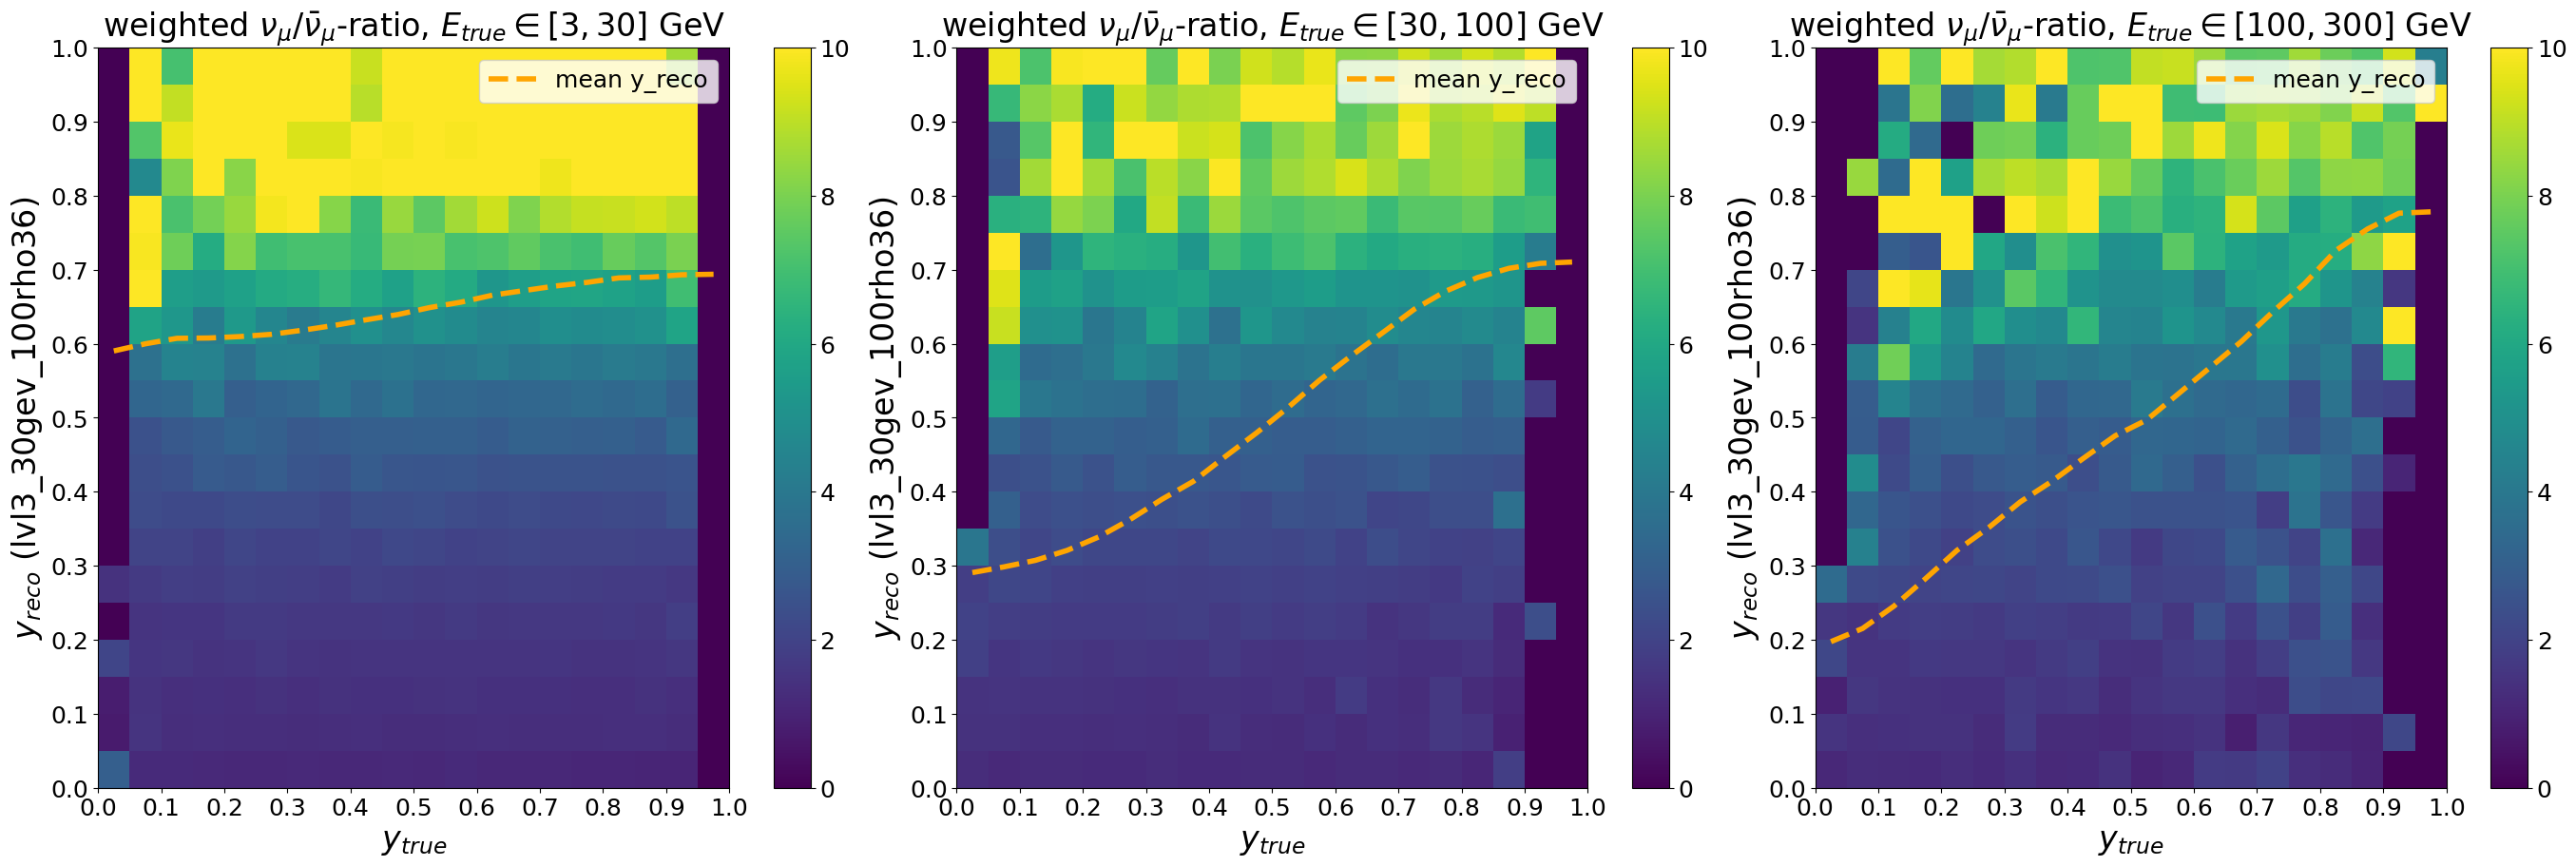

In [94]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

recoymean=np.zeros(len(yrange)-1)
for i,y in enumerate(yrange[:-1]):
    iny = (y<=bjorken_y)*(bjorken_y<=yrange[i+1])
    value = (yisnegative==False)*is_cc*true_E_islow*iny
    recoymean[i]=np.mean(recoy[value])

ax1.plot(20*(yrange+0.025)[:-1],20*recoymean,ls='dashed',lw=4.,color='orange',label='mean y_reco')
ax1.legend(fontsize=18)        
im=ax1.pcolormesh(weighted_numunumubar_ratio_cc_low_2d,vmin=0,vmax=10)
ax1.set_xlabel(r'$y_{true}$',fontsize=24)
ax1.set_ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)',fontsize=24)
ax1.set_title(r'weighted $\nu_\mu$/$\bar{\nu}_\mu$-ratio, $E_{true} \in [3,30]$ GeV',fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)
cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
cb.ax.tick_params(labelsize=18)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
ax1.set_xticks(np.linspace(0,20,11),labels=ticklabels);
ax1.set_yticks(np.linspace(0,20,11),labels=ticklabels);
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

recoymean=np.zeros(len(yrange)-1)
for i,y in enumerate(yrange[:-1]):
    iny = (y<=bjorken_y)*(bjorken_y<=yrange[i+1])
    value = (yisnegative==False)*is_cc*true_E_ismedium*iny
    recoymean[i]=np.mean(recoy[value])
    
ax2.plot(20*(yrange+0.025)[:-1],20*recoymean,ls='dashed',lw=4.,color='orange',label='mean y_reco')
ax2.legend(fontsize=18)
im=ax2.pcolormesh(weighted_numunumubar_ratio_cc_medium_2d,vmin=0,vmax=10)
ax2.set_xlabel(r'$y_{true}$',fontsize=24)
ax2.set_ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)',fontsize=24)
ax2.set_title(r'weighted $\nu_\mu$/$\bar{\nu}_\mu$-ratio, $E_{true} \in [30,100]$ GeV',fontsize=24)
cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
cb.ax.tick_params(labelsize=18)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
ax2.set_xticks(np.linspace(0,20,11),labels=ticklabels);
ax2.set_yticks(np.linspace(0,20,11),labels=ticklabels);
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

recoymean=np.zeros(len(yrange)-1)
for i,y in enumerate(yrange[:-1]):
    iny = (y<=bjorken_y)*(bjorken_y<=yrange[i+1])
    value = (yisnegative==False)*is_cc*true_E_ishigh*iny
    recoymean[i]=np.mean(recoy[value])

ax3.plot(20*(yrange+0.025)[:-1],20*recoymean,ls='dashed',lw=4.,color='orange',label='mean y_reco')
ax3.legend(fontsize=18)    
im=plt.pcolormesh(weighted_numunumubar_ratio_cc_high_2d,vmin=0,vmax=10)
ax3.set_xlabel(r'$y_{true}$',fontsize=24)
ax3.set_ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)',fontsize=24)
ax3.set_title(r'weighted $\nu_\mu$/$\bar{\nu}_\mu$-ratio, $E_{true} \in [100,300]$ GeV',fontsize=24)
cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
cb.ax.tick_params(labelsize=18)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
ax3.set_xticks(np.linspace(0,20,11),labels=ticklabels);
ax3.set_yticks(np.linspace(0,20,11),labels=ticklabels);
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='minor', labelsize=18)
        
plt.savefig("Inelast_Plots/Inelast/weighted_numunumubar_ratio_yrecovsytrue_cc.png")
plt.show()

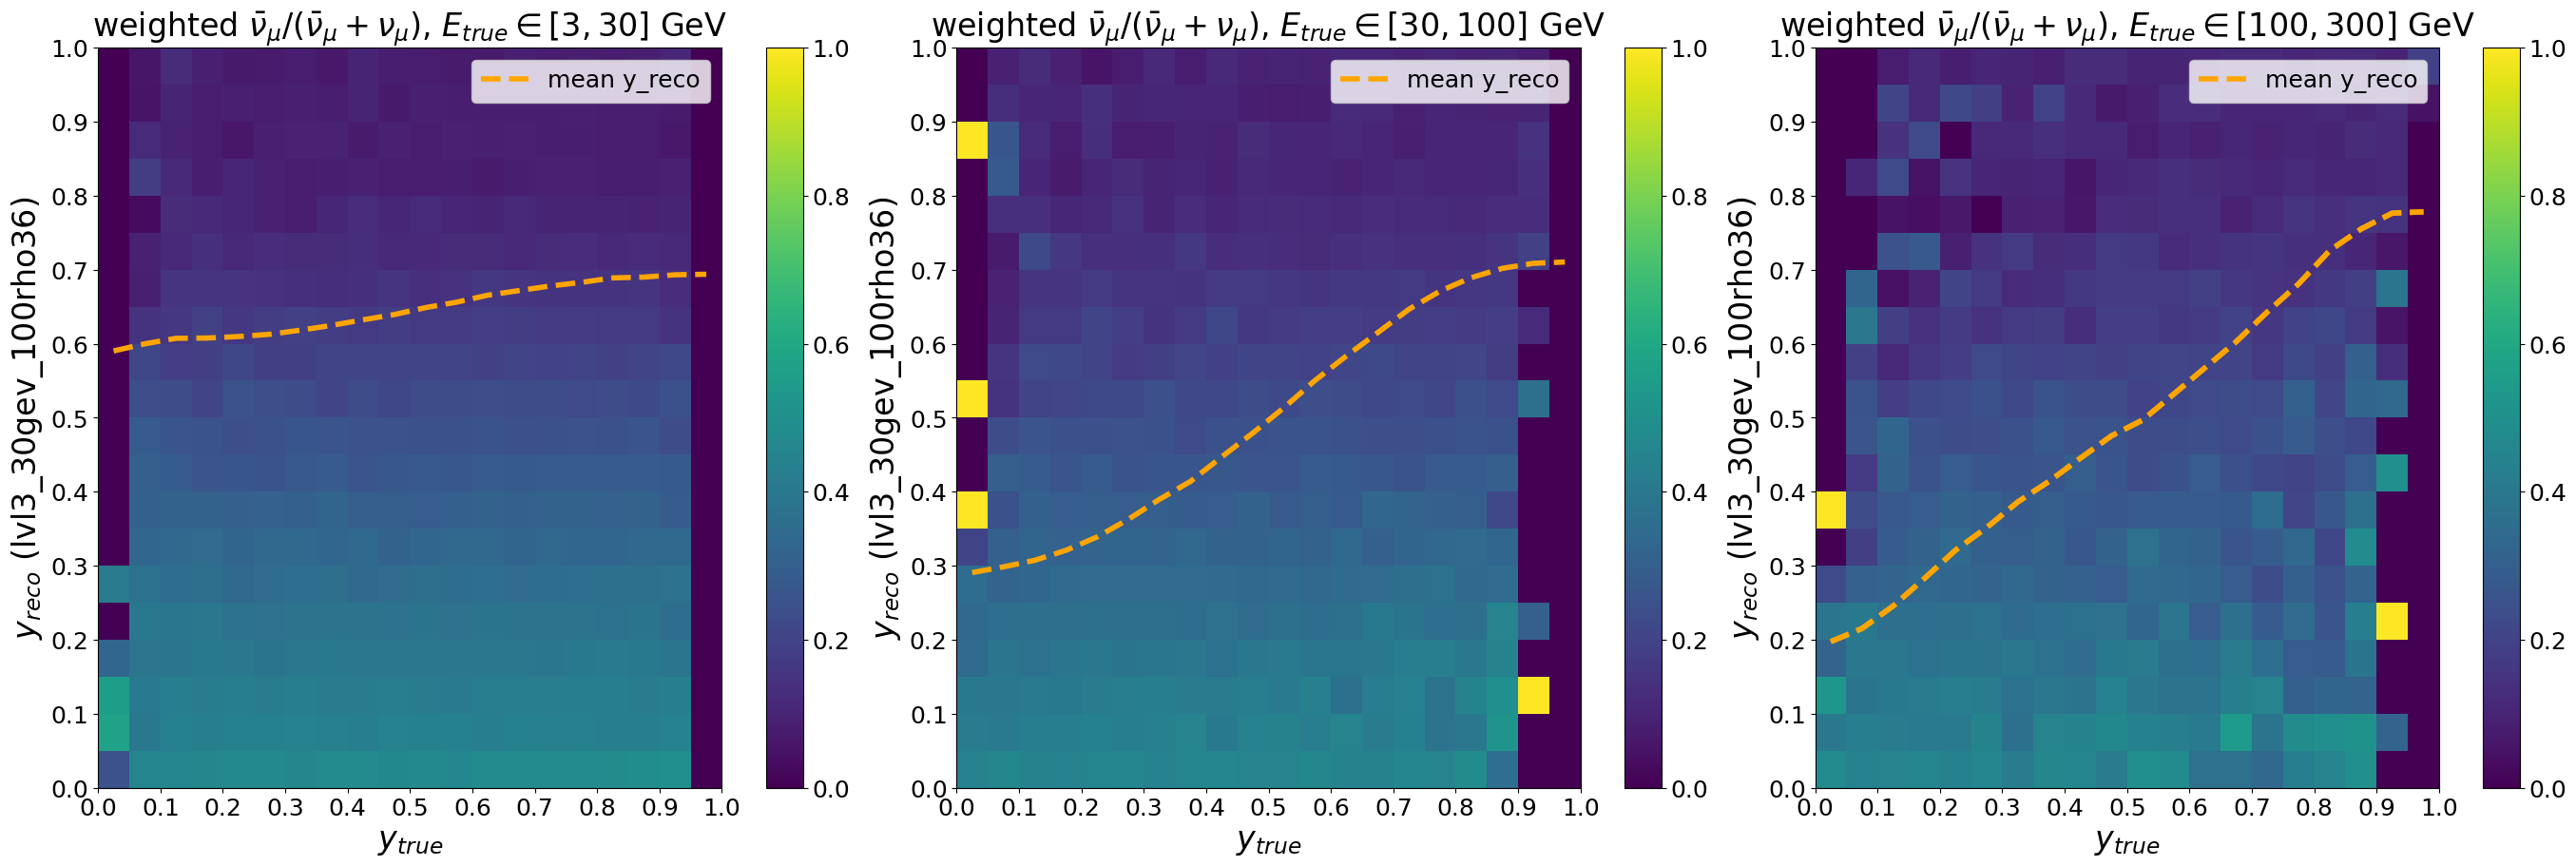

In [95]:
weighted_numubar_vs_both_ratio_cc_low_2d= weird_division(weighted_numubar_cc_low_2d,
                                                         weighted_numu_cc_low_2d+weighted_numubar_cc_low_2d)
weighted_numubar_vs_both_ratio_cc_medium_2d= weird_division(weighted_numubar_cc_medium_2d,
                                                         weighted_numu_cc_medium_2d+weighted_numubar_cc_medium_2d)
weighted_numubar_vs_both_ratio_cc_high_2d= weird_division(weighted_numubar_cc_high_2d,
                                                         weighted_numu_cc_high_2d+weighted_numubar_cc_high_2d)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,layout='constrained',figsize=(27,9))

recoymean=np.zeros(len(yrange)-1)
for i,y in enumerate(yrange[:-1]):
    iny = (y<=bjorken_y)*(bjorken_y<=yrange[i+1])
    value = (yisnegative==False)*is_cc*true_E_islow*iny
    recoymean[i]=np.mean(recoy[value])

ax1.plot(20*(yrange+0.025)[:-1],20*recoymean,ls='dashed',lw=4.,color='orange',label='mean y_reco')
ax1.legend(fontsize=18)
im=ax1.pcolormesh(weighted_numubar_vs_both_ratio_cc_low_2d,vmin=0,vmax=1)
ax1.set_xlabel(r'$y_{true}$',fontsize=24)
ax1.set_ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)',fontsize=24)
ax1.set_title(r'weighted $\bar{\nu}_\mu$/$(\bar{\nu}_\mu+\nu_\mu)$, $E_{true} \in [3,30]$ GeV',fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)
cb=fig.colorbar(im, ax=ax1,fraction=0.346, pad=0.04)
cb.ax.tick_params(labelsize=18)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
ax1.set_xticks(np.linspace(0,20,11),labels=ticklabels);
ax1.set_yticks(np.linspace(0,20,11),labels=ticklabels);
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

recoymean=np.zeros(len(yrange)-1)
for i,y in enumerate(yrange[:-1]):
    iny = (y<=bjorken_y)*(bjorken_y<=yrange[i+1])
    value = (yisnegative==False)*is_cc*true_E_ismedium*iny
    recoymean[i]=np.mean(recoy[value])
    
ax2.plot(20*(yrange+0.025)[:-1],20*recoymean,ls='dashed',lw=4.,color='orange',label='mean y_reco')
ax2.legend(fontsize=18)    
im=ax2.pcolormesh(weighted_numubar_vs_both_ratio_cc_medium_2d,vmin=0,vmax=1)
ax2.set_xlabel(r'$y_{true}$',fontsize=24)
ax2.set_ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)',fontsize=24)
ax2.set_title(r'weighted $\bar{\nu}_\mu$/$(\bar{\nu}_\mu+\nu_\mu)$, $E_{true} \in [30,100]$ GeV',fontsize=24)
cb=fig.colorbar(im, ax=ax2,fraction=0.346, pad=0.04)
cb.ax.tick_params(labelsize=18)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
ax2.set_xticks(np.linspace(0,20,11),labels=ticklabels);
ax2.set_yticks(np.linspace(0,20,11),labels=ticklabels);
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

recoymean=np.zeros(len(yrange)-1)
for i,y in enumerate(yrange[:-1]):
    iny = (y<=bjorken_y)*(bjorken_y<=yrange[i+1])
    value = (yisnegative==False)*is_cc*true_E_ishigh*iny
    recoymean[i]=np.mean(recoy[value])
    
ax3.plot(20*(yrange+0.025)[:-1],20*recoymean,ls='dashed',lw=4.,color='orange',label='mean y_reco')
ax3.legend(fontsize=18)    
im=plt.pcolormesh(weighted_numubar_vs_both_ratio_cc_high_2d,vmin=0,vmax=1)
ax3.set_xlabel(r'$y_{true}$',fontsize=24)
ax3.set_ylabel(r'$y_{reco}$ (lvl3_30gev_100rho36)',fontsize=24)
ax3.set_title(r'weighted $\bar{\nu}_\mu$/$(\bar{\nu}_\mu+\nu_\mu)$, $E_{true} \in [100,300]$ GeV',fontsize=24)
ax3.plot(20*(yrange+0.025)[:-1],20*recoymean,ls='dashed',lw=4.,color='orange')
cb=fig.colorbar(im, ax=ax3,fraction=0.346, pad=0.04)
cb.ax.tick_params(labelsize=18)

ticklabels=[]
for n in np.linspace(0,20,11):
    ticklabels.append("{0:.1f}".format(n/2.1/10))
ax3.set_xticks(np.linspace(0,20,11),labels=ticklabels);
ax3.set_yticks(np.linspace(0,20,11),labels=ticklabels);
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='minor', labelsize=18)

plt.savefig("Inelast_Plots/Inelast/weighted_numubar_vs_both_ratio_yrecovsytrue_cc.png",bbox_inches='tight')
plt.show()

## nu/nubar ratio vs yreco per energy

In [96]:
def weirdiv1d(arr1,arr2):
    arr1=np.array(arr1)
    arr2=np.array(arr2)
    assert np.array(arr1).shape==np.array(arr2).shape, 'Shapes dont match!'
    result=np.zeros(arr2.shape)
    for i in range(arr1.shape[0]):
        if arr2[i]==0:
            result[i]=0
        else:
            result[i]=arr1[i]/arr2[i]
    return result

def weirddiv(a,b):
    '''
    0d version of 0 div
    '''
    if b==0:
        return b
    else:
        return a/b

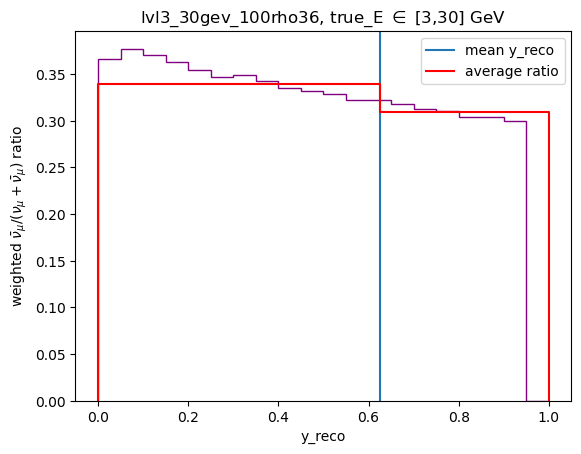

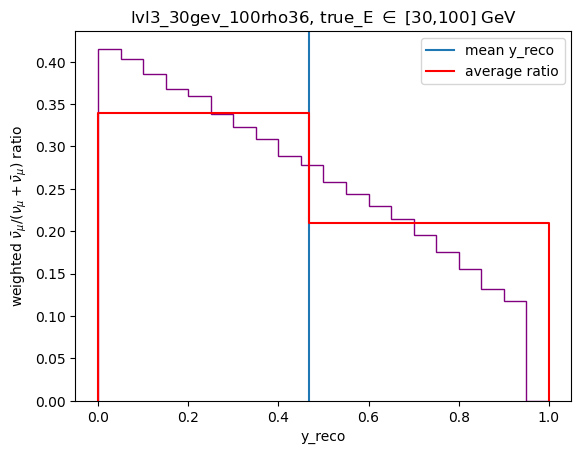

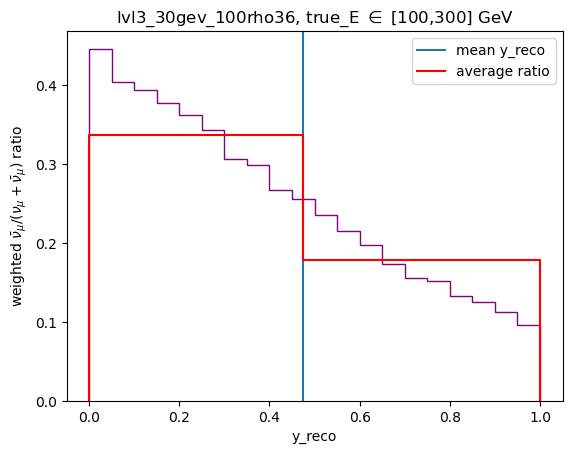

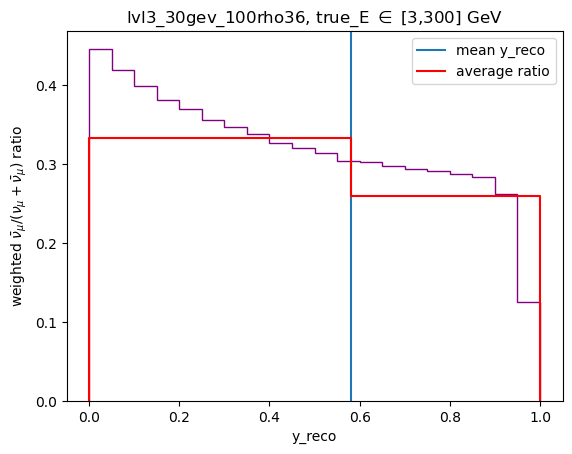

In [97]:
plotflag = True
    
if plotflag==True:
    low = is_cc*(yisnegative==False)*true_E_islow
    medium = is_cc*(yisnegative==False)*true_E_ismedium
    high = is_cc*(yisnegative==False)*true_E_ishigh
    
    weights = fluxweights_both
    sample = lvl3_30gev_100rho36
        
    nus,bins,_=plt.hist(sample[low*isnu],bins=yrange,weights=fluxweights_both[low*isnu]);
    nubars,bins,_=plt.hist(sample[low*isnubar],bins=yrange,weights=fluxweights_both[low*isnubar]);
    plt.close()
    plt.hist(yrange[:-1],bins=yrange,weights=weirdiv1d(nubars,nus+nubars),histtype='step',color='purple')
    plt.xlabel('y_reco')
    plt.axvline(x=np.mean(sample[is_cc*true_E_islow]),label='mean y_reco')
    plt.ylabel(r'weighted $\bar{\nu}_\mu/(\nu_\mu+\bar{\nu}_\mu)$ ratio')
    plt.title('lvl3_30gev_100rho36, true_E $\in$ [3,30] GeV')
    
    smaller = sample < np.mean(sample[is_cc*true_E_islow])
    bigger = sample >= np.mean(sample[is_cc*true_E_islow])
    weights_smaller_nu = np.sum(weights[low*isnu*smaller])
    weights_smaller_nubar = np.sum(weights[low*isnubar*smaller])
    weights_bigger_nu = np.sum(weights[low*isnu*bigger])
    weights_bigger_nubar = np.sum(weights[low*isnubar*bigger])
    smaller_ratio = weirddiv(weights_smaller_nubar,weights_smaller_nu+weights_smaller_nubar)
    bigger_ratio = weirddiv(weights_bigger_nubar,weights_bigger_nu+weights_bigger_nubar)
    plt.step([0,np.mean(sample[is_cc*true_E_islow]),1,1],
            [0,smaller_ratio,bigger_ratio,0],color='red',label='average ratio')
    plt.legend()
    plt.show()
    
    nus,bins,_=plt.hist(sample[medium*isnu],bins=yrange,weights=fluxweights_both[medium*isnu]);
    nubars,bins,_=plt.hist(sample[medium*isnubar],bins=yrange,weights=fluxweights_both[medium*isnubar]);
    plt.close()
    plt.hist(yrange[:-1],bins=yrange,weights=weirdiv1d(nubars,nus+nubars),histtype='step',color='purple')
    plt.xlabel('y_reco')
    plt.axvline(x=np.mean(sample[is_cc*true_E_ismedium]),label='mean y_reco')
    plt.ylabel(r'weighted $\bar{\nu}_\mu/(\nu_\mu+\bar{\nu}_\mu)$ ratio')
    plt.title('lvl3_30gev_100rho36, true_E $\in$ [30,100] GeV')
    
    smaller = sample < np.mean(sample[is_cc*true_E_ismedium])
    bigger = sample >= np.mean(sample[is_cc*true_E_ismedium])
    weights_smaller_nu = np.sum(weights[medium*isnu*smaller])
    weights_smaller_nubar = np.sum(weights[medium*isnubar*smaller])
    weights_bigger_nu = np.sum(weights[medium*isnu*bigger])
    weights_bigger_nubar = np.sum(weights[medium*isnubar*bigger])
    smaller_ratio = weirddiv(weights_smaller_nubar,weights_smaller_nu+weights_smaller_nubar)
    bigger_ratio = weirddiv(weights_bigger_nubar,weights_bigger_nu+weights_bigger_nubar)
    plt.step([0,np.mean(sample[is_cc*true_E_ismedium]),1,1],
            [0,smaller_ratio,bigger_ratio,0],color='red',label='average ratio')
    plt.legend()
    plt.show()
    
    nus,bins,_=plt.hist(sample[high*isnu],bins=yrange,weights=fluxweights_both[high*isnu]);
    nubars,bins,_=plt.hist(sample[high*isnubar],bins=yrange,weights=fluxweights_both[high*isnubar]);
    plt.close()
    plt.hist(yrange[:-1],bins=yrange,weights=weirdiv1d(nubars,nus+nubars),histtype='step',color='purple')
    plt.xlabel('y_reco')
    plt.axvline(x=np.mean(sample[is_cc*true_E_ishigh]),label='mean y_reco')
    plt.ylabel(r'weighted $\bar{\nu}_\mu/(\nu_\mu+\bar{\nu}_\mu)$ ratio')
    plt.title('lvl3_30gev_100rho36, true_E $\in$ [100,300] GeV')
    
    smaller = sample < np.mean(sample[is_cc*true_E_ishigh])
    bigger = sample >= np.mean(sample[is_cc*true_E_ishigh])
    weights_smaller_nu = np.sum(weights[high*isnu*smaller])
    weights_smaller_nubar = np.sum(weights[high*isnubar*smaller])
    weights_bigger_nu = np.sum(weights[high*isnu*bigger])
    weights_bigger_nubar = np.sum(weights[high*isnubar*bigger])
    smaller_ratio = weirddiv(weights_smaller_nubar,weights_smaller_nu+weights_smaller_nubar)
    bigger_ratio = weirddiv(weights_bigger_nubar,weights_bigger_nu+weights_bigger_nubar)
    plt.step([0,np.mean(sample[is_cc*true_E_ishigh]),1,1],
            [0,smaller_ratio,bigger_ratio,0],color='red',label='average ratio')
    plt.legend()
    plt.show()
    
    nus,bins,_=plt.hist(sample[(low+medium+high)*isnu],bins=yrange);
    nubars,bins,_=plt.hist(sample[(low+medium+high)*isnubar],bins=yrange);
    plt.close()
    plt.hist(yrange[:-1],bins=yrange,weights=weirdiv1d(nubars,nus+nubars),histtype='step',color='purple')
    plt.xlabel('y_reco')
    plt.axvline(x=np.mean(sample[is_cc]),label='mean y_reco')
    plt.ylabel(r'weighted $\bar{\nu}_\mu/(\nu_\mu+\bar{\nu}_\mu)$ ratio')
    plt.title('lvl3_30gev_100rho36, true_E $\in$ [3,300] GeV')
    
    smaller = sample < np.mean(sample[is_cc])
    bigger = sample >= np.mean(sample[is_cc])
    weights_smaller_nu = np.sum(weights[(low+medium+high)*isnu*smaller])
    weights_smaller_nubar = np.sum(weights[(low+medium+high)*isnubar*smaller])
    weights_bigger_nu = np.sum(weights[(low+medium+high)*isnu*bigger])
    weights_bigger_nubar = np.sum(weights[low*isnubar*bigger])
    smaller_ratio = weirddiv(weights_smaller_nubar,weights_smaller_nu+weights_smaller_nubar)
    bigger_ratio = weirddiv(weights_bigger_nubar,weights_bigger_nu+weights_bigger_nubar)
    plt.step([0,np.mean(sample[is_cc]),1,1],
            [0,smaller_ratio,bigger_ratio,0],color='red',label='average ratio')
    plt.legend()
    plt.show()

## y_reco vs E_reco and E_true (nu vs nubar)

In [98]:
np.mean(lvl3_5gev_100rho36),np.mean(lvl3_30gev_100rho36),np.mean(lvl6_5gev_200rho36),np.mean(lvl6_30gev_200rho36)

(0.3680568783394142,
 0.5936138790100408,
 0.3695091589469979,
 0.5641740085428404)

In [99]:
np.mean(lvl3_30gev_100rho36[is_cc*true_E_ismedium])

0.468146952541878

In [100]:
np.mean(lvl3_5gev_100rho36[is_cc*true_E_ishigh])

0.4528621255060025

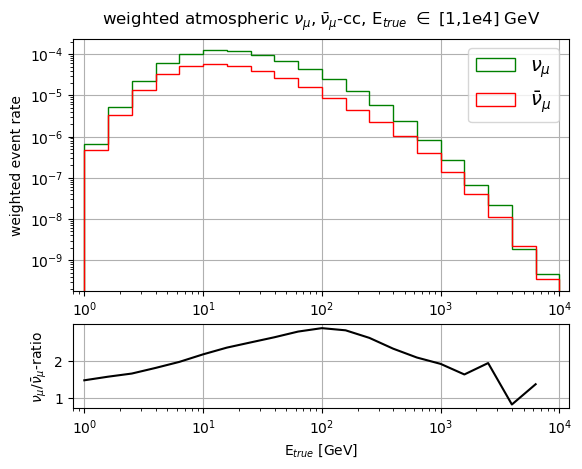

In [198]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
bins=np.geomspace(1,1e4,21)
nu,_,_=ax1.hist(true_E[(pdg_code>0)*is_cc*(yispos)],bins=bins,histtype='step',
                weights=fluxweights_both[(pdg_code>0)*is_cc*(yispos)],label=r'$\nu_\mu$',color='green')
nubar,b,_=ax1.hist(true_E[(pdg_code<0)*is_cc*(yispos)],bins=bins,histtype='step',
                   weights=fluxweights_both[(pdg_code<0)*is_cc*(yispos)],color='red',label=r'$\bar{\nu}_\mu$')
ax1.set_ylabel('weighted event rate')
ax1.set_xlim(0.8*1e0,1.2*1e4)
ax1.loglog()
ax1.set_title(r'weighted atmospheric $\nu_\mu,\bar{\nu}_\mu$-cc, E$_{true}$ $\in$ [1,1e4] GeV',pad=10)
ax1.legend(fontsize=14)
ax1.grid()
ax2.plot(b[:-1],nu/nubar,color='black')
ax2.set_xlim(0.8*1e0,1.2*1e4)
ax2.set_xlabel(r'E$_{true}$ [GeV]')
ax2.set_ylabel(r'$\nu_\mu/\bar{\nu}_\mu$-ratio')
ax2.set_xscale('log')
ax2.grid()

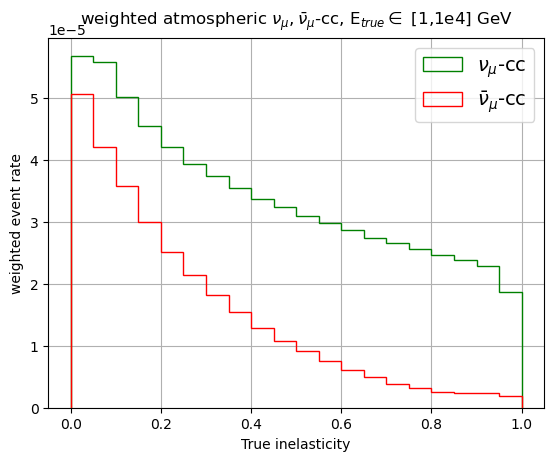

In [211]:
Ecutoff = 1e4
isE= true_E < Ecutoff

yt_nu=bjorken_y[is_cc*isnu*yispos*isE]
yt_nubar=bjorken_y[is_cc*isnubar*yispos*isE]
bins=np.linspace(0,1,21)
nu,_,_=plt.hist(yt_nu,bins=bins,histtype='step',
                weights=fluxweights_both[(pdg_code>0)*is_cc*(yispos)*isE],label=r'$\nu_\mu$-cc',color='green')
nubar,b,_=plt.hist(yt_nubar,bins=bins,histtype='step',
                   weights=fluxweights_both[(pdg_code<0)*is_cc*(yispos)*isE],color='red',label=r'$\bar{\nu}_\mu$-cc')
plt.ylabel('weighted event rate')
#plt.yscale('log')
plt.xlabel('True inelasticity')
plt.legend(fontsize=14)
plt.title(r'weighted atmospheric $\nu_\mu,\bar{\nu}_\mu$-cc, E$_{true} \in$ [1,1e4] GeV',pad=10)
plt.grid()